Group 15 Snippets

In [1]:
%conda install -c conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpt
import seaborn as sns
import string
import re
import unicodedata
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn import feature_extraction
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikkh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikkh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1. Initial Analysis

In [3]:
disaster_info=pd.read_csv('train.csv')

Lets print disaster info to see details about the data.

In [4]:
disaster_info.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Lets see how much entries we have in the data.

In [5]:
disaster_info.shape

(7613, 5)

Now lets see the type of data that we are using and their data types. And the missing data

In [6]:
disaster_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


As we can see there are 4 columns.
Two of the columns are integer and 2 are categorical types.
There are missing values in the keyword and the location columns.
The target is the dependeable variable and others are independent variables.


In [7]:
disaster_info.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Lets visualize how the training data is divided. We will observe if there is any imbalance between postive values(Not Real Disasters i.e 0) and negative values (Real Disasters i.e 1) in the data.

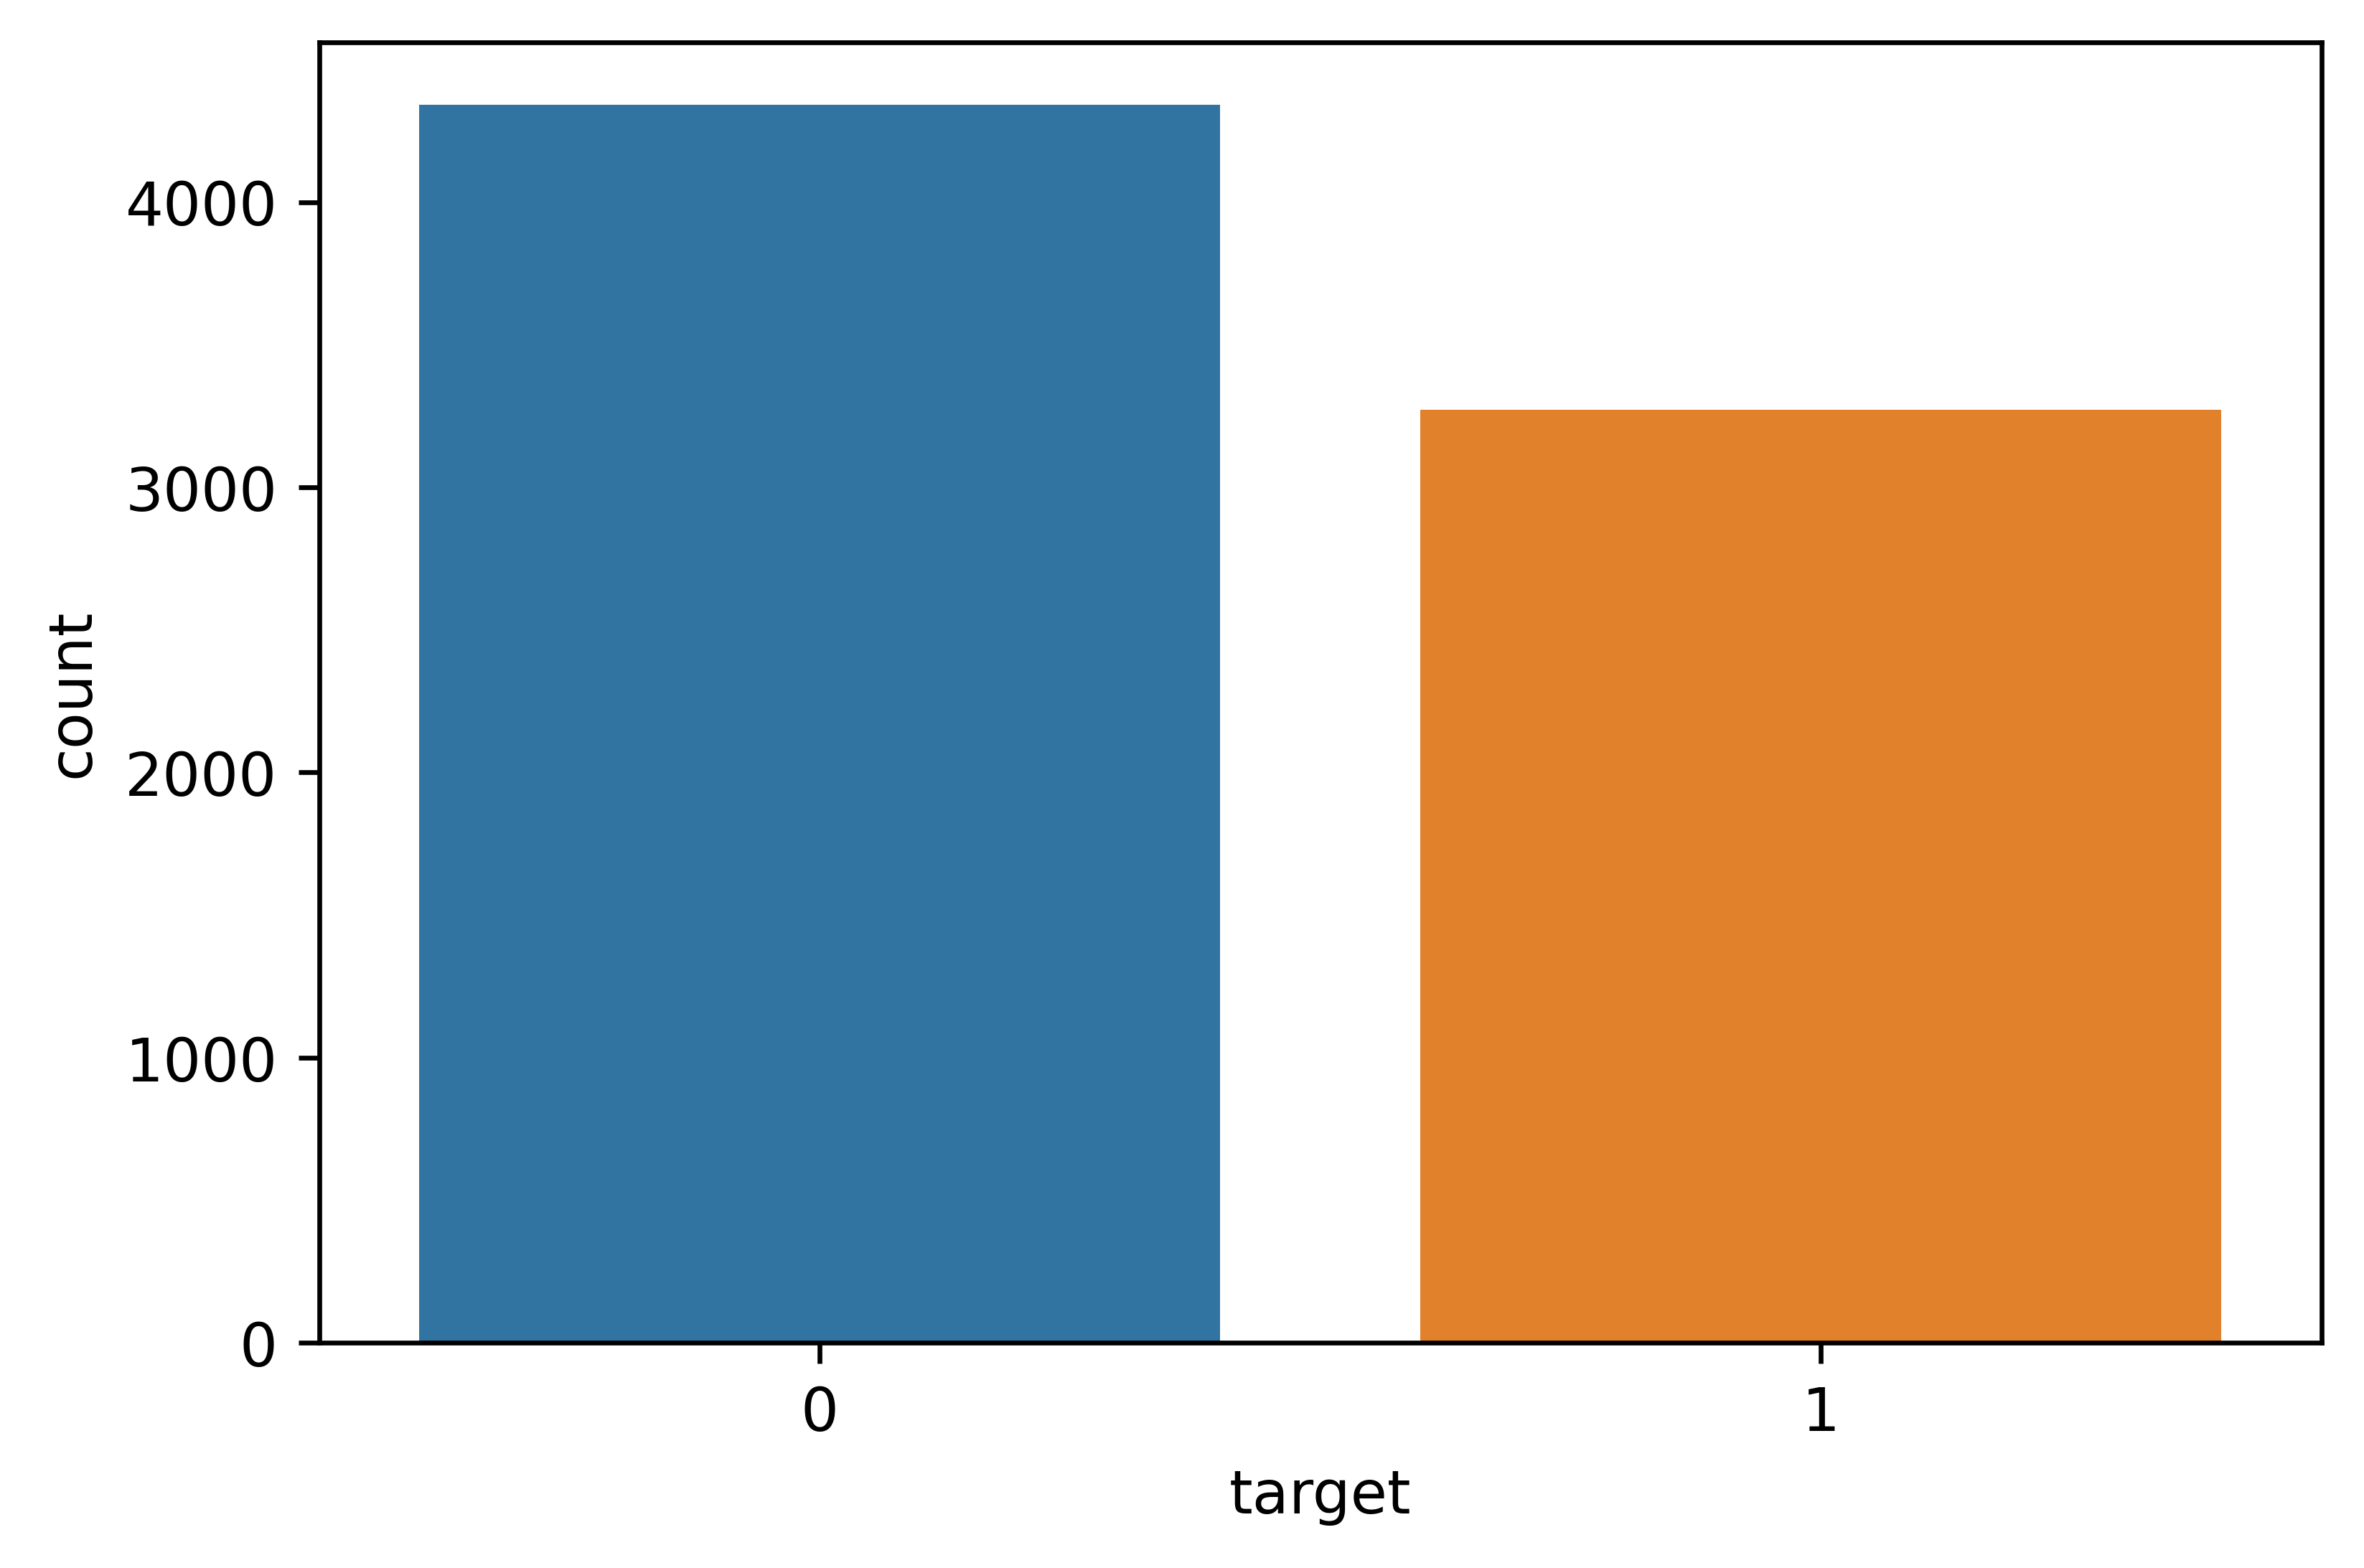

In [8]:
fig=plt.figure(dpi=600)
sns.countplot('target',data=disaster_info)



As we can see that there is an imbalance between both the postive values and negative values related to disaster analysis. We can observe that number of not real disasters are more than the number of real disasters. This can make our prediction model biased. So we trade variability of data to offset the bias and make use of the sampling technique to reduce the imbalance of the target variable. On of the steps that we will need to do is to perform sampling such that the data provided to the machine learning algorithm will have equal samples of both postive and negative cases.


Let see how many unique keywords we have in the keywords to understand what type of disasters are we seeing.

In [9]:
disaster_info['keyword'].dropna().unique().shape


(221,)

In [10]:
disaster_info['keyword'].dropna().unique()

array(['ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed

In [11]:
disaster_info.groupby(['keyword']).count()['id']

keyword
ablaze                 36
accident               35
aftershock             34
airplane%20accident    35
ambulance              38
                       ..
wounded                37
wounds                 33
wreck                  37
wreckage               39
wrecked                39
Name: id, Length: 221, dtype: int64

There are 221 unique keywords and we plotted the above unique keywords and their frequencies.
Lets plot this data.

In [12]:
groupedData=disaster_info.groupby(['keyword']).sum()
groupedData.reset_index(inplace=True)
groupedData.head()

,keyword,id,target
0,ablaze,2534,13
1,accident,4263,24
2,aftershock,5825,0
3,airplane%20accident,7705,30
4,ambulance,10224,20


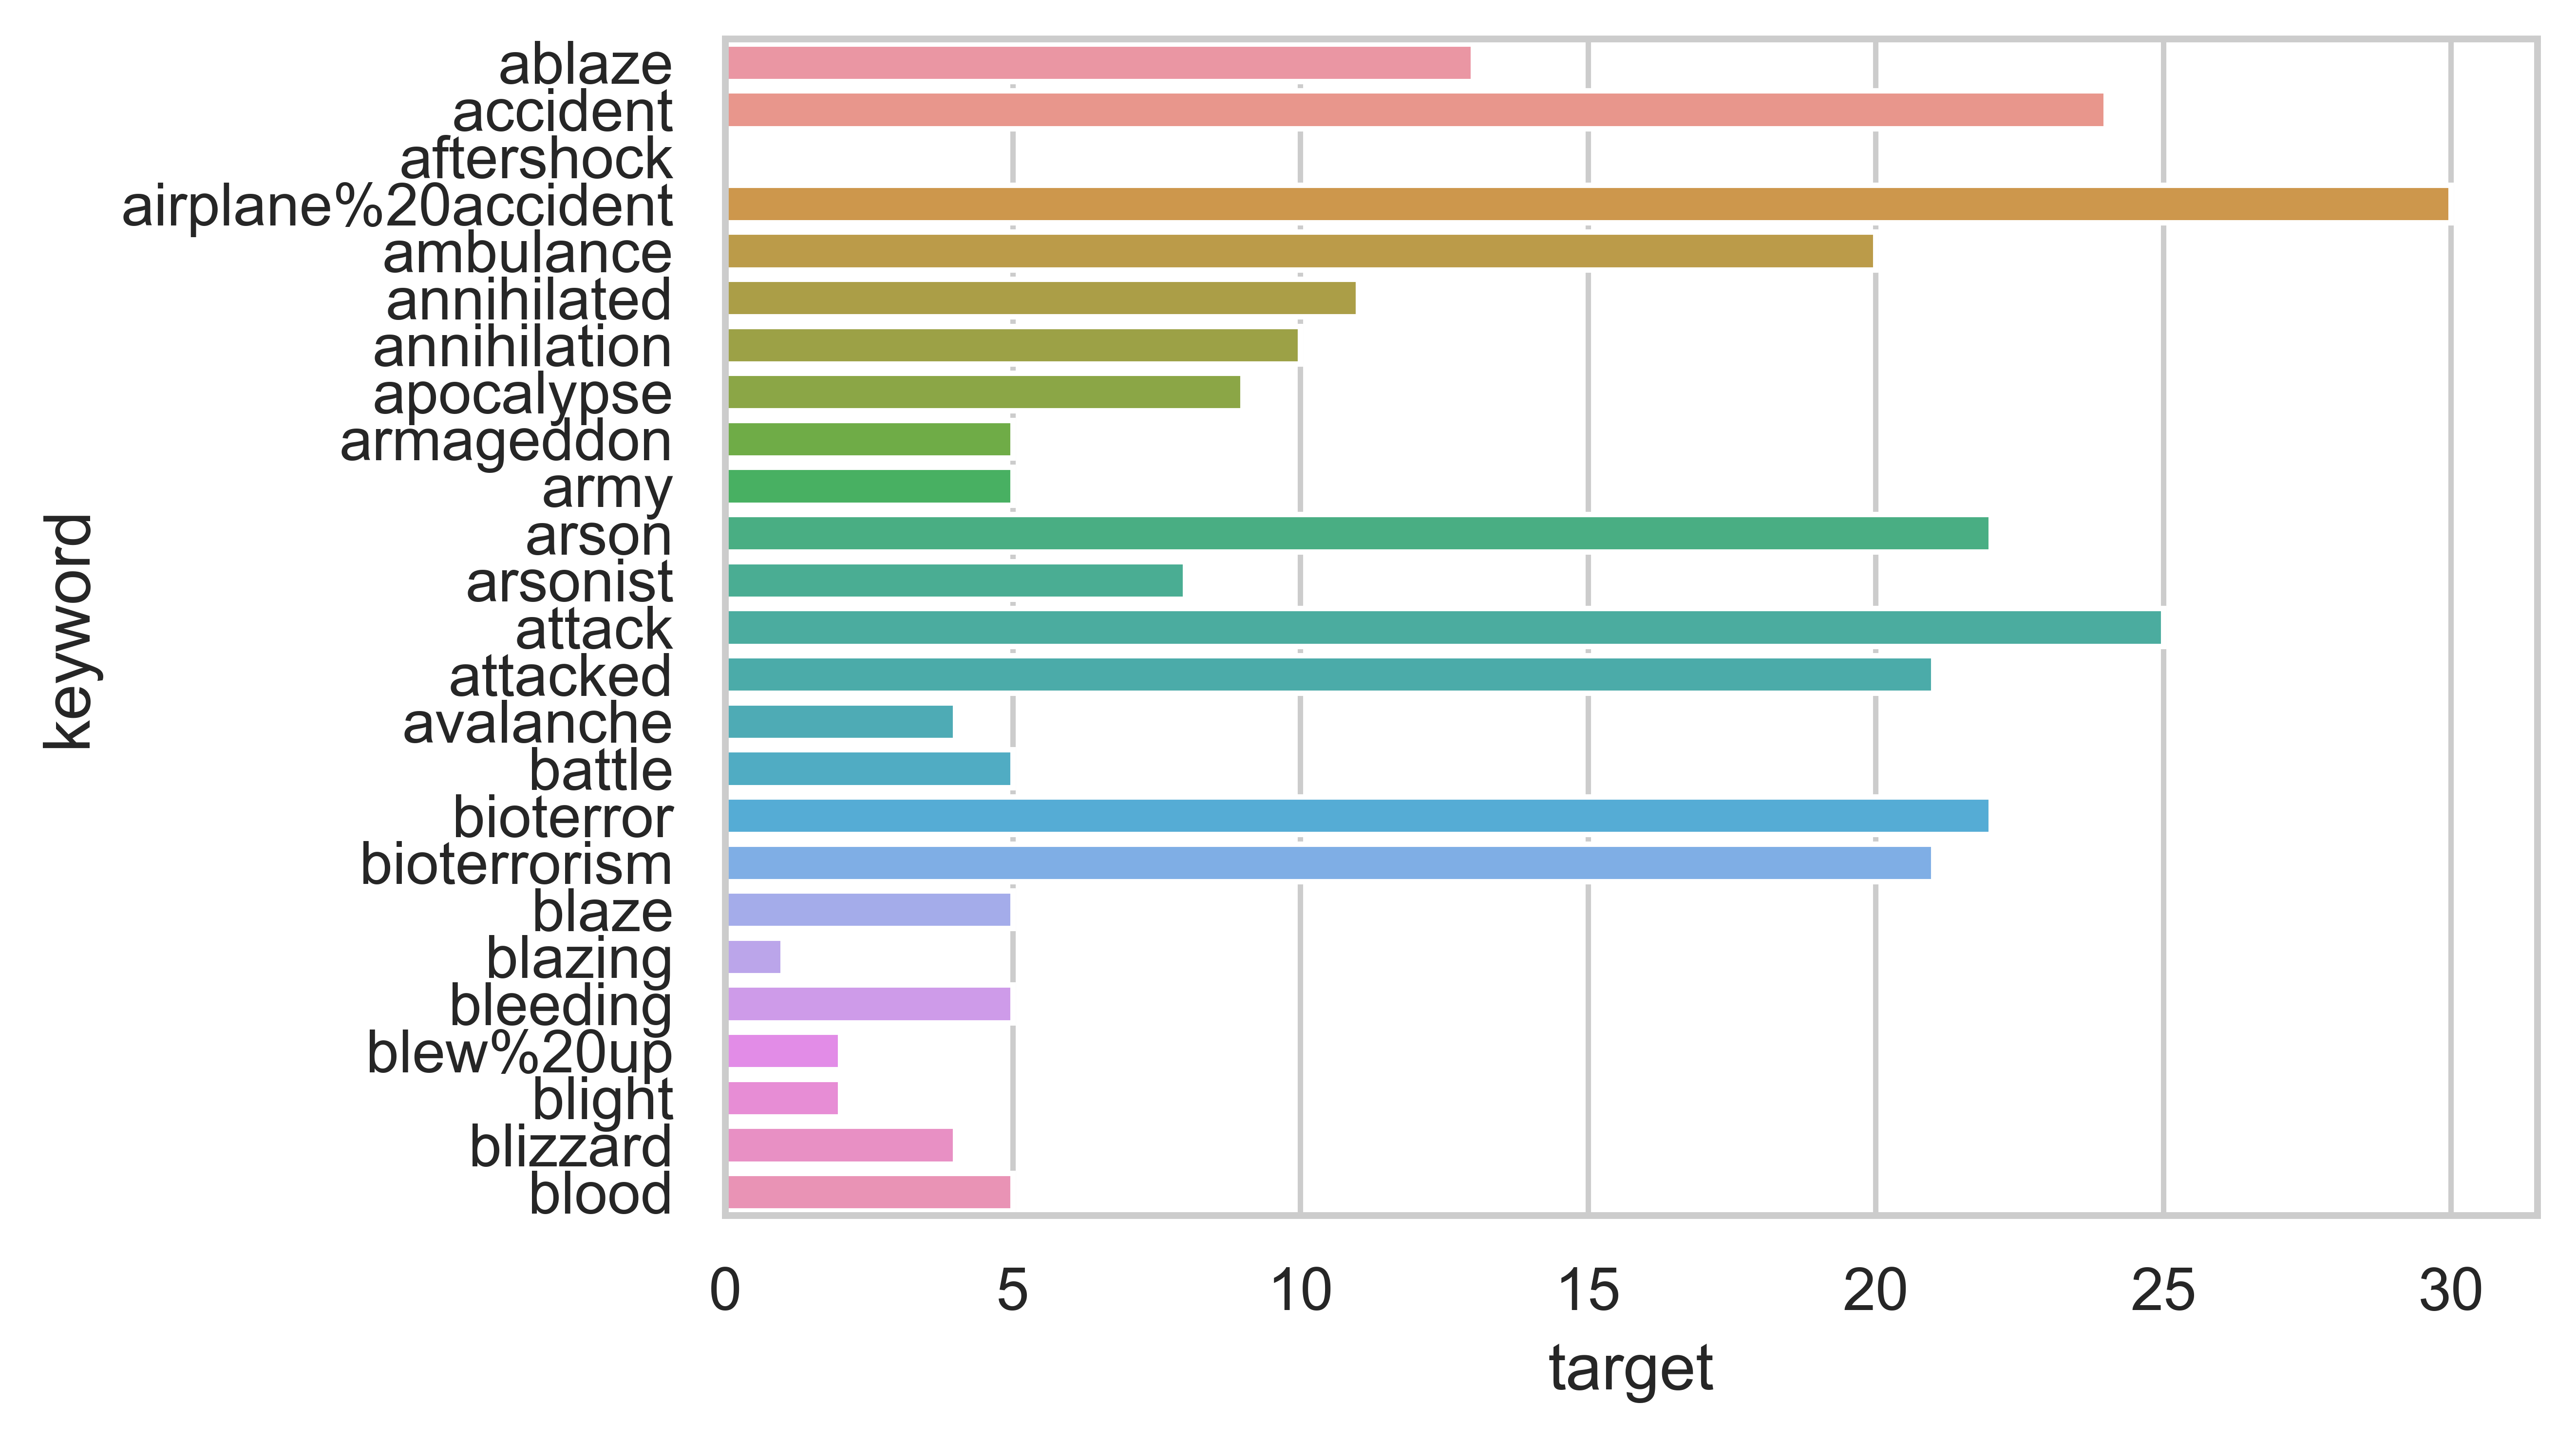

In [13]:
fig=plt.figure(dpi=800)
sns.set(style="whitegrid")
sns.barplot(x='target',y='keyword',data=groupedData.head(25))

This tell us that the keywords are also not equally distributed.




In [14]:
groupedData.loc[groupedData['target']==0].groupby('keyword').count()

,id,target
keyword,,
aftershock,1,1


Now lets find for which keyword there are more true disasters seen.

In [15]:
disaster_count_by_keywords=disaster_info.loc[disaster_info['target']==1].groupby('keyword').sum().sort_values(by=['target'],ascending=False)
disaster_count_by_keywords.reset_index(inplace=True)


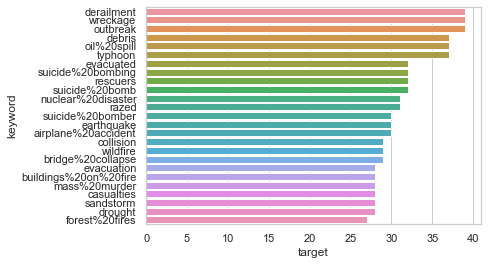

In [16]:
sns.set(style="whitegrid")

sns.barplot(x='target',y='keyword',data=disaster_count_by_keywords.head(25))

So we can see that the keywords with derailment, wreckage, outbreak, debris , oil spill have more number of disasters seen. 
This gives us a general idea about the keywords that are associated with actual disasters

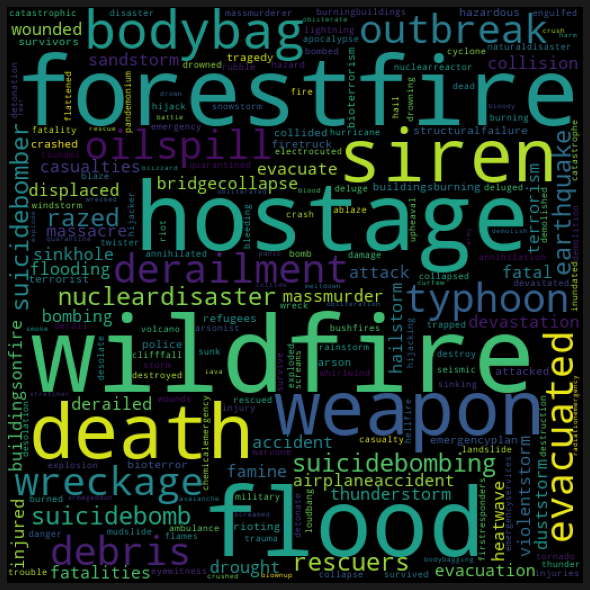

In [17]:
disaster_keywords = ' '.join(list(disaster_count_by_keywords['keyword']))
disaster_keywords=disaster_keywords.replace('%20','')
disaster_wc = WordCloud(width = 512,height = 512).generate(disaster_keywords)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(disaster_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

2. Preprocessing

The categorical type of data is present which is requires a lot of preprocessing before we can use the data for machine learning algorithms etc.

The following data preprocessing steps will be taken:
1. Remove HTML tags
2. Remove Usernames by @
3. Remove URLs
4. Remove accented characters
5. Make lowercase
6. Remove punctuations
7. Remove Extra space
8. Remove stop words
9. Remove special characters or any symbols
10. Remove numbers
11. Lemmatization


In [18]:
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import re, string 
import pandas as pd   
from collections import defaultdict
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from gensim.models import Word2Vec

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [19]:
from bs4 import BeautifulSoup
import spacy
import unidecode
from word2number import w2n
from pycontractions import Contractions
import gensim.downloader as api

#This will give us stop words
#en_default = en_core_web_md
nlp = spacy.load('en_default') 


# Choose model accordingly for contractions function
model = api.load("glove-twitter-25")

# model = api.load("glove-twitter-100")
# model = api.load("word2vec-google-news-300")

cont = Contractions(kv_model=model)
cont.load_models()


INFO - 16:51:07: loading projection weights from C:\Users\nikkh/gensim-data\glove-twitter-25\glove-twitter-25.gz
INFO - 16:51:40: loaded (1193514, 25) matrix from C:\Users\nikkh/gensim-data\glove-twitter-25\glove-twitter-25.gz


In [20]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [21]:

# exclude words from spacy stopwords list
deselect_stop_words = ['no', 'not']
for w in deselect_stop_words:
    nlp.vocab[w].is_stop = False


def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

def remove_punctuation_function(text):
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|,;'+string.punctuation+']')
    text = REPLACE_BY_SPACE_RE.sub('', text)
    return text


def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())


def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text


def expand_contractions(text):
    """expand shortened words, e.g. don't to do not"""
    text = list(cont.expand_texts([text], precise=True))[0]
    return text
def remove_user_name(text):
    """Remove the twitter usernames, e.g. @usatoday,@bbcmtd """
    text = re.sub('@[^\s]+', '', text)
    return text

def remove_urls(text):
    """Remove the urls, e.g. http://t.co/lHYXEOHY6C"""
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text)
    text = re.sub(r'http\S+', '', text)
    return text



def text_preprocessing(text, accented_chars=True, contractions=True, 
                       convert_num=True, extra_whitespace=True, 
                       lemmatization=True, lowercase=True, punctuations=True,
                       remove_html=True, remove_num=True, special_chars=True, 
                       stop_words=True,remove_punctuation=True,remove_user=True,remove_url=True):
    """preprocess text with default option set to true for all steps"""
    if remove_html == True: #remove html tags
        text = strip_html_tags(text)
    if remove_user == True:#remove twitter user names
        text=remove_user_name(text)
    if remove_url == True:#remove the urls from the tweets
        text=remove_urls(text)
    if accented_chars == True: #remove accented characters
        text = remove_accented_chars(text)
    if contractions == True: #expand contractions
        text = expand_contractions(text)
    if lowercase == True: #convert all characters to lowercase
        text = text.lower()
    if remove_punctuation == True: #remove punctuation
        text=remove_punctuation_function(text)
    if extra_whitespace == True: #remove extra whitespaces
        text = remove_whitespace(text)

    doc = nlp(text) #tokenise text

    clean_text = []
    #clean_string=""
    
    for token in doc:
        flag = True
        edit = token.text
        # remove stop words
        #if stop_words == True and token.is_stop and token.pos_ != 'NUM': 
        #   flag = False
        # remove punctuations
        if punctuations == True and token.pos_ == 'PUNCT' and flag == True:
            flag = False
        # remove special characters
        if special_chars == True and token.pos_ == 'SYM' and flag == True: 
            flag = False
        # remove numbers
        if remove_num == True and (token.pos_ == 'NUM' or token.text.isnumeric()) \
        and flag == True:
            flag = False
        # convert number words to numeric numbers
        if convert_num == True and token.pos_ == 'NUM' and flag == True:
            edit = w2n.word_to_num(token.text)
        # convert tokens to base form
        elif lemmatization == True and token.lemma_ != "-PRON-" and flag == True:
            edit = token.lemma_
        # append tokens edited and not removed to list 
        if edit != "" and flag == True:
            clean_text.append(edit)
            
    return clean_text
    #return clean_string

In [22]:
sentence="FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/c0p3SEsqWm via @usatoday"
print(text_preprocessing(sentence))

['fedex', 'no', 'longer', 'to', 'transport', 'bioterror', 'germ', 'in', 'wake', 'of', 'anthrax', 'lab', 'mishap', 'via']


In [23]:
words_list=[]
for line in disaster_info[['text']].values:
    cleaned=text_preprocessing(line[0])
    words_list.append(cleaned)

INFO - 16:51:41: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 16:51:41: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:41: built Dictionary(12 unique tokens: ['across', 'an', 'building', 'emergency', 'evacuation']...) from 2 documents (total 24 corpus positions)
INFO - 16:51:42: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 16:51:42: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:42: built Dictionary(12 unique tokens: ['across', 'an', 'building', 'emergency', 'evacuation']...) from 2 documents (total 24 corpus positions)
INFO - 16:51:42: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:51:42: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:42: built Dictionary(3 unique tokens: ['up', 'has', 'what']) from 2 documents (total 4 corpus positions)
INFO - 16:51:42: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:51:42: adding documen

INFO - 16:51:46: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:51:46: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:46: built Dictionary(18 unique tokens: ['a', 'annihilated', 'because', 'from', 'great']...) from 2 documents (total 34 corpus positions)
INFO - 16:51:46: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:51:46: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:46: built Dictionary(17 unique tokens: ['a', 'annihilated', 'because', 'from', 'great']...) from 2 documents (total 34 corpus positions)
INFO - 16:51:46: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:51:46: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:46: built Dictionary(13 unique tokens: ['after', 'and', 'books', 'current', 'died']...) from 2 documents (total 30 corpus positions)
INFO - 16:51:46: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:51:46: 

INFO - 16:51:47: Removed 5 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:51:47: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:47: built Dictionary(15 unique tokens: ['a', 'armageddon', 'bears', 'certainty', 'coat']...) from 2 documents (total 36 corpus positions)
INFO - 16:51:47: Removed 5 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:51:47: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:47: built Dictionary(15 unique tokens: ['a', 'armageddon', 'bears', 'certainty', 'coat']...) from 2 documents (total 36 corpus positions)
INFO - 16:51:48: Removed 4 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:51:48: At least one of the documents had no words that were in the vocabulary. Aborting (returning inf).
INFO - 16:51:48: Removed 4 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:51:48: At least one of the documents had no words that were in the vocabulary. Aborting (returning inf).
IN

INFO - 16:51:51: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:51: built Dictionary(13 unique tokens: ['am', 'and', 'blazing', 'can', 'do']...) from 2 documents (total 24 corpus positions)
INFO - 16:51:51: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:51:51: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:51: built Dictionary(11 unique tokens: ['a', 'and', 'at', 'chicken', 'lip']...) from 2 documents (total 20 corpus positions)
INFO - 16:51:51: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:51:51: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:51: built Dictionary(11 unique tokens: ['a', 'and', 'at', 'chicken', 'lip']...) from 2 documents (total 20 corpus positions)
INFO - 16:51:51: Removed 1 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:51:51: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:51: built Dictionary(11 unique tokens: ['and'

INFO - 16:51:52: Removed 2 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:51:52: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:52: built Dictionary(18 unique tokens: ['a', 'actually', 'arent', 'blight', 'dwarves']...) from 2 documents (total 41 corpus positions)
INFO - 16:51:52: Removed 2 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:51:52: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:52: built Dictionary(18 unique tokens: ['a', 'actually', 'are', 'blight', 'dwarves']...) from 2 documents (total 43 corpus positions)
INFO - 16:51:53: Removed 2 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:51:53: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:53: built Dictionary(18 unique tokens: ['a', 'actually', 'are', 'blight', 'dwarves']...) from 2 documents (total 43 corpus positions)
INFO - 16:51:53: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:51:53: add

INFO - 16:51:54: Removed 1 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:51:54: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:54: built Dictionary(15 unique tokens: ['a', 'and', 'big', 'blood', 'but']...) from 2 documents (total 35 corpus positions)
INFO - 16:51:54: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:51:54: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:54: built Dictionary(11 unique tokens: ['as', 'awful', 'bloody', 'from', 'have']...) from 2 documents (total 20 corpus positions)
INFO - 16:51:54: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:51:54: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:54: built Dictionary(11 unique tokens: ['as', 'awful', 'bloody', 'from', 'have']...) from 2 documents (total 20 corpus positions)
INFO - 16:51:54: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:51:54: adding document #0 to D

INFO - 16:51:56: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:56: built Dictionary(14 unique tokens: ['about', 'another', 'bagging', 'body', 'did']...) from 2 documents (total 30 corpus positions)
INFO - 16:51:56: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:51:56: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:56: built Dictionary(14 unique tokens: ['about', 'another', 'bagging', 'body', 'did']...) from 2 documents (total 30 corpus positions)
INFO - 16:51:56: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:51:56: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:56: built Dictionary(14 unique tokens: ['about', 'another', 'bagging', 'body', 'did']...) from 2 documents (total 30 corpus positions)
INFO - 16:51:56: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:51:56: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:56: built Dictio

INFO - 16:51:57: built Dictionary(15 unique tokens: ['been', 'bombing', 'let', 'of', 'one']...) from 2 documents (total 28 corpus positions)
INFO - 16:51:57: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:51:57: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:57: built Dictionary(15 unique tokens: ['been', 'bombing', 'let', 'of', 'one']...) from 2 documents (total 28 corpus positions)
INFO - 16:51:58: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:51:58: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:58: built Dictionary(18 unique tokens: ['babies', 'beat', 'boxer', 'buildings', 'burning']...) from 2 documents (total 36 corpus positions)
INFO - 16:51:58: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:51:58: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:58: built Dictionary(18 unique tokens: ['babies', 'beat', 'boxer', 'buildings', 'burning']...) f

INFO - 16:51:59: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:59: built Dictionary(16 unique tokens: ['because', 'burning', 'if', 'is', 'it']...) from 2 documents (total 36 corpus positions)
INFO - 16:51:59: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:51:59: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:59: built Dictionary(6 unique tokens: ['burning', 'except', 'idk', 'really', 'has']...) from 2 documents (total 10 corpus positions)
INFO - 16:51:59: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:51:59: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:51:59: built Dictionary(6 unique tokens: ['burning', 'except', 'idk', 'really', 'is']...) from 2 documents (total 10 corpus positions)
INFO - 16:52:00: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:52:00: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:00: built Dictionary(12 uni

INFO - 16:52:02: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:52:02: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:02: built Dictionary(20 unique tokens: ['a', 'baseball', 'best', 'catastrophic', 'grab']...) from 2 documents (total 38 corpus positions)
INFO - 16:52:02: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:52:02: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:02: built Dictionary(11 unique tokens: ['a', 'about', 'building', 'do', 'inside']...) from 2 documents (total 22 corpus positions)
INFO - 16:52:02: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:52:02: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:02: built Dictionary(11 unique tokens: ['a', 'about', 'building', 'do', 'inside']...) from 2 documents (total 22 corpus positions)
INFO - 16:52:02: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:52:02: adding 

INFO - 16:52:05: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:52:05: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:05: built Dictionary(11 unique tokens: ['a', 'crush', 'do', 'he', 'just']...) from 2 documents (total 32 corpus positions)
INFO - 16:52:05: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:52:05: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:05: built Dictionary(11 unique tokens: ['a', 'crush', 'do', 'he', 'just']...) from 2 documents (total 32 corpus positions)
INFO - 16:52:05: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:52:05: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:05: built Dictionary(11 unique tokens: ['a', 'crush', 'do', 'he', 'just']...) from 2 documents (total 32 corpus positions)
INFO - 16:52:05: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:52:05: adding document #0 to Dictionary(0 uni

INFO - 16:52:08: At least one of the documents had no words that were in the vocabulary. Aborting (returning inf).
INFO - 16:52:08: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:52:08: At least one of the documents had no words that were in the vocabulary. Aborting (returning inf).
INFO - 16:52:08: Removed 4 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:08: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:08: built Dictionary(13 unique tokens: ['a', 'and', 'chrissie', 'deaths', 'finn']...) from 2 documents (total 25 corpus positions)
INFO - 16:52:08: Removed 4 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:08: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:08: built Dictionary(13 unique tokens: ['a', 'and', 'chrissie', 'deaths', 'finn']...) from 2 documents (total 25 corpus positions)
INFO - 16:52:08: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:08:

INFO - 16:52:09: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:52:09: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:09: built Dictionary(20 unique tokens: ['and', 'are', 'colour', 'deluged', 'e']...) from 2 documents (total 42 corpus positions)
INFO - 16:52:09: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:52:09: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:09: built Dictionary(17 unique tokens: ['and', 'are', 'deluged', 'likely', 'of']...) from 2 documents (total 38 corpus positions)
INFO - 16:52:09: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:52:09: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:09: built Dictionary(17 unique tokens: ['and', 'are', 'deluged', 'likely', 'of']...) from 2 documents (total 38 corpus positions)
INFO - 16:52:09: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:52:09: adding document #0

INFO - 16:52:12: Removed 11 and 11 OOV words from document 1 and 2 (respectively).
INFO - 16:52:12: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:12: built Dictionary(7 unique tokens: ['-', ':', 'freak', 'freakiest', 'of']...) from 2 documents (total 13 corpus positions)
INFO - 16:52:12: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:52:12: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:12: built Dictionary(9 unique tokens: ['is', 'made', 'not', 'to', 'totally']...) from 2 documents (total 16 corpus positions)
INFO - 16:52:12: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:52:12: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:12: built Dictionary(8 unique tokens: ['is', 'made', 'not', 'to', 'totally']...) from 2 documents (total 16 corpus positions)
INFO - 16:52:12: Removed 11 and 11 OOV words from document 1 and 2 (respectively).
INFO - 16:52:12: adding document #0 to Dic

INFO - 16:52:13: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:52:13: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:13: built Dictionary(13 unique tokens: ['be', 'destroyed', 'every', 'got', 'have']...) from 2 documents (total 24 corpus positions)
INFO - 16:52:13: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:52:13: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:13: built Dictionary(13 unique tokens: ['be', 'destroyed', 'every', 'got', 'have']...) from 2 documents (total 24 corpus positions)
INFO - 16:52:14: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:52:14: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:14: built Dictionary(12 unique tokens: ['#bored', 'a', 'forsee', 'in', 'loose']...) from 2 documents (total 22 corpus positions)
INFO - 16:52:14: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:52:14: adding documen

INFO - 16:52:16: built Dictionary(12 unique tokens: ['but', 'different', 'for', 'hey', 'more']...) from 2 documents (total 22 corpus positions)
INFO - 16:52:16: Removed 2 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:52:16: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:16: built Dictionary(14 unique tokens: ['&', 'any', 'be', 'both', 'bud']...) from 2 documents (total 29 corpus positions)
INFO - 16:52:16: Removed 2 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:52:16: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:16: built Dictionary(14 unique tokens: ['&', 'any', 'be', 'both', 'bud']...) from 2 documents (total 29 corpus positions)
INFO - 16:52:16: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:52:16: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:16: built Dictionary(13 unique tokens: ['-', 'a', 'daily', 'desert', 'finding']...) from 2 documents (total 24 corpus

INFO - 16:52:17: built Dictionary(12 unique tokens: ['am', 'and', 'drowning', 'going', 'hw']...) from 2 documents (total 22 corpus positions)
INFO - 16:52:18: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:52:18: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:18: built Dictionary(12 unique tokens: ['am', 'and', 'drowning', 'going', 'hw']...) from 2 documents (total 22 corpus positions)
INFO - 16:52:18: Removed 7 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:52:18: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:18: built Dictionary(11 unique tokens: ['a', 'answer', 'blowing', 'friend', 'in']...) from 2 documents (total 23 corpus positions)
INFO - 16:52:18: Removed 7 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:52:18: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:18: built Dictionary(10 unique tokens: ['a', 'answer', 'blowing', 'friend', 'in']...) from 2 documents 

INFO - 16:52:19: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:19: built Dictionary(19 unique tokens: ['a', 'all', 'be', 'good', 'hairdryer']...) from 2 documents (total 39 corpus positions)
INFO - 16:52:19: Removed 6 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:19: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:19: built Dictionary(21 unique tokens: ['a', 'all', 'be', 'good', 'hairdryer']...) from 2 documents (total 44 corpus positions)
INFO - 16:52:19: Removed 6 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:19: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:19: built Dictionary(22 unique tokens: ['a', 'all', 'be', 'good', 'hairdryer']...) from 2 documents (total 44 corpus positions)
INFO - 16:52:19: Removed 6 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:19: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:19: built Dictionary(22 unique tokens

INFO - 16:52:22: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:52:22: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:22: built Dictionary(7 unique tokens: ['going', 'mess', 'to', 'up', 'you']...) from 2 documents (total 12 corpus positions)
INFO - 16:52:22: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:52:22: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:22: built Dictionary(13 unique tokens: ['atomic', 'day.', 'exploded', 'in', 'is']...) from 2 documents (total 24 corpus positions)
INFO - 16:52:22: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:52:22: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:22: built Dictionary(12 unique tokens: ['atomic', 'day.', 'exploded', 'in', 'is']...) from 2 documents (total 24 corpus positions)
INFO - 16:52:22: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:22: adding document #0 to

INFO - 16:52:25: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:52:25: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:25: built Dictionary(11 unique tokens: ['a', 'every', 'fatality', 'makes', 'me']...) from 2 documents (total 20 corpus positions)
INFO - 16:52:25: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:52:25: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:25: built Dictionary(11 unique tokens: ['a', 'every', 'fatality', 'makes', 'me']...) from 2 documents (total 20 corpus positions)
INFO - 16:52:25: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:52:25: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:25: built Dictionary(24 unique tokens: ['a', 'and', 'because', 'but', 'every']...) from 2 documents (total 56 corpus positions)
INFO - 16:52:25: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:52:25: adding document #0 

INFO - 16:52:26: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:26: built Dictionary(21 unique tokens: ['&', 'a', 'ambulances', 'at', 'fire']...) from 2 documents (total 46 corpus positions)
INFO - 16:52:26: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:52:26: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:26: built Dictionary(23 unique tokens: ['&', 'a', 'ambulances', 'at', 'fire']...) from 2 documents (total 52 corpus positions)
INFO - 16:52:26: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:52:26: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:26: built Dictionary(23 unique tokens: ['&', 'a', 'ambulances', 'at', 'fire']...) from 2 documents (total 52 corpus positions)
INFO - 16:52:27: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:52:27: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:27: built Dictionary(16 unique tokens: [

INFO - 16:52:28: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:52:28: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:28: built Dictionary(10 unique tokens: ['do', 'flood', 'his', 'in', 'not']...) from 2 documents (total 18 corpus positions)
INFO - 16:52:28: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:52:28: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:28: built Dictionary(10 unique tokens: ['do', 'flood', 'his', 'in', 'not']...) from 2 documents (total 18 corpus positions)
INFO - 16:52:29: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:29: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:29: built Dictionary(20 unique tokens: ['can', 'charging', 'come', 'dilute', 'flooding']...) from 2 documents (total 40 corpus positions)
INFO - 16:52:29: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:29: adding document #0 to

INFO - 16:52:31: built Dictionary(8 unique tokens: ['before', 'die', 'do', 'get', 'i']...) from 2 documents (total 14 corpus positions)
INFO - 16:52:31: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:52:31: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:31: built Dictionary(8 unique tokens: ['before', 'die', 'do', 'get', 'i']...) from 2 documents (total 14 corpus positions)
INFO - 16:52:31: Removed 9 and 9 OOV words from document 1 and 2 (respectively).
INFO - 16:52:31: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:31: built Dictionary(16 unique tokens: ['#mufc', 'back', 'better', 'dear', 'has']...) from 2 documents (total 31 corpus positions)
INFO - 16:52:31: Removed 9 and 9 OOV words from document 1 and 2 (respectively).
INFO - 16:52:31: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:31: built Dictionary(16 unique tokens: ['#mufc', 'back', 'better', 'dear', 'has']...) from 2 documents (total 31 co

INFO - 16:52:32: built Dictionary(11 unique tokens: ['cool', 'finally', 'heat', 'kind', 'kulli']...) from 2 documents (total 20 corpus positions)
INFO - 16:52:32: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:52:32: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:32: built Dictionary(9 unique tokens: ['hotter', 'than', 'the', 'there', 'this']...) from 2 documents (total 16 corpus positions)
INFO - 16:52:32: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:52:32: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:32: built Dictionary(9 unique tokens: ['hotter', 'than', 'the', 'there', 'this']...) from 2 documents (total 16 corpus positions)
INFO - 16:52:32: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:32: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:32: built Dictionary(17 unique tokens: ['bcuz', 'cooler', 'dances', 'feeling', 'for']...) from 2 do

INFO - 16:52:35: built Dictionary(8 unique tokens: ['every', 'injured', 'why', 'wonder', 'year']...) from 2 documents (total 14 corpus positions)
INFO - 16:52:35: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:35: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:35: built Dictionary(10 unique tokens: ['does', 'every', 'get', 'his', 'injured']...) from 2 documents (total 18 corpus positions)
INFO - 16:52:35: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:35: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:35: built Dictionary(10 unique tokens: ['does', 'every', 'get', 'his', 'injured']...) from 2 documents (total 18 corpus positions)
INFO - 16:52:35: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:52:35: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:35: built Dictionary(7 unique tokens: ['is', 'only', 'surprise', 'that', 'they']...) from 2 docum

INFO - 16:52:37: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:37: built Dictionary(22 unique tokens: ['about', 'articles', 'be', 'but', 'by']...) from 2 documents (total 44 corpus positions)
INFO - 16:52:37: Removed 4 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:37: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:37: built Dictionary(15 unique tokens: ['a', 'are', 'be', 'caught', 'for']...) from 2 documents (total 44 corpus positions)
INFO - 16:52:37: Removed 4 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:37: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:37: built Dictionary(16 unique tokens: ['a', 'are', 'be', 'caught', 'for']...) from 2 documents (total 44 corpus positions)
INFO - 16:52:37: Removed 4 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:37: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:37: built Dictionary(16 unique tokens: ['a',

INFO - 16:52:39: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:52:39: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:39: built Dictionary(18 unique tokens: ['a', 'become', 'daily', 'deal', 'dickheads']...) from 2 documents (total 40 corpus positions)
INFO - 16:52:39: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:52:39: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:39: built Dictionary(18 unique tokens: ['a', 'become', 'daily', 'deal', 'dickheads']...) from 2 documents (total 40 corpus positions)
INFO - 16:52:39: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:39: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:39: built Dictionary(21 unique tokens: ['a', 'and', 'aspect', 'btw', 'do']...) from 2 documents (total 40 corpus positions)
INFO - 16:52:39: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:39: adding document

INFO - 16:52:41: Removed 11 and 10 OOV words from document 1 and 2 (respectively).
INFO - 16:52:41: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:41: built Dictionary(15 unique tokens: ['a', 'and', 'between', 'dears', 'difference']...) from 2 documents (total 30 corpus positions)
INFO - 16:52:41: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 16:52:41: At least one of the documents had no words that were in the vocabulary. Aborting (returning inf).
INFO - 16:52:41: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 16:52:41: At least one of the documents had no words that were in the vocabulary. Aborting (returning inf).
INFO - 16:52:41: Removed 9 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:52:41: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:41: built Dictionary(10 unique tokens: ['a', 'am', 'chewing', 'like', 'on']...) from 2 documents (total 22 corpus positions)
INFO - 16:52:41:

INFO - 16:52:43: built Dictionary(17 unique tokens: ['and', 'far', 'fixing', 'govt', 'if']...) from 2 documents (total 36 corpus positions)
INFO - 16:52:43: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:43: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:43: built Dictionary(11 unique tokens: ['always', 'are', 'but', 'like', 'many']...) from 2 documents (total 22 corpus positions)
INFO - 16:52:43: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:43: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:43: built Dictionary(12 unique tokens: ['always', 'are', 'but', 'like', 'many']...) from 2 documents (total 22 corpus positions)
INFO - 16:52:43: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 16:52:43: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:43: built Dictionary(8 unique tokens: ['an', 'how', 'oil', 'respond', 'tell']...) from 2 documents (total 1

INFO - 16:52:45: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:52:45: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:45: built Dictionary(13 unique tokens: ['bad', 'been', 'haha.', 'have', 'not']...) from 2 documents (total 24 corpus positions)
INFO - 16:52:45: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:52:45: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:45: built Dictionary(13 unique tokens: ['bad', 'been', 'haha.', 'have', 'not']...) from 2 documents (total 24 corpus positions)
INFO - 16:52:45: Removed 4 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:52:45: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:45: built Dictionary(20 unique tokens: ['brothers', 'debbie', 'found', 'had', 'his']...) from 2 documents (total 42 corpus positions)
INFO - 16:52:45: Removed 4 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:52:45: adding document #

INFO - 16:52:48: Removed 3 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:52:48: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:48: built Dictionary(12 unique tokens: ['a', 'ass', 'big', 'jail', 'me']...) from 2 documents (total 23 corpus positions)
INFO - 16:52:48: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:52:48: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:48: built Dictionary(17 unique tokens: ['ally', 'an', 'because', 'cannot', 'did']...) from 2 documents (total 34 corpus positions)
INFO - 16:52:49: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:52:49: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:49: built Dictionary(17 unique tokens: ['ally', 'an', 'because', 'cannot', 'did']...) from 2 documents (total 34 corpus positions)
INFO - 16:52:49: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:49: adding document #0 to D

INFO - 16:52:50: At least one of the documents had no words that were in the vocabulary. Aborting (returning inf).
INFO - 16:52:51: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:52:51: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:51: built Dictionary(7 unique tokens: ['&', 'am', 'can', 'he', 'hot']...) from 2 documents (total 14 corpus positions)
INFO - 16:52:51: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:52:51: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:51: built Dictionary(7 unique tokens: ['&', 'am', 'can', 'he', 'hot']...) from 2 documents (total 14 corpus positions)
INFO - 16:52:51: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:52:51: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:51: built Dictionary(10 unique tokens: ['/', 'at', 'baby', 'fine', 'screaming']...) from 2 documents (total 18 corpus positions)
INFO - 16:52:51: Remove

INFO - 16:52:53: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:53: built Dictionary(13 unique tokens: ['a', 'been', 'everyday', 'for', 'it']...) from 2 documents (total 26 corpus positions)
INFO - 16:52:53: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:52:53: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:53: built Dictionary(13 unique tokens: ['a', 'been', 'everyday', 'for', 'it']...) from 2 documents (total 26 corpus positions)
INFO - 16:52:53: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:52:53: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:53: built Dictionary(20 unique tokens: ['a', 'announce', 'are', 'bc', 'dull']...) from 2 documents (total 44 corpus positions)
INFO - 16:52:53: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:52:53: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:53: built Dictionary(19 unique tokens: [

INFO - 16:52:55: built Dictionary(21 unique tokens: ['about', 'dance', 'for', 'hasil', 'in']...) from 2 documents (total 46 corpus positions)
INFO - 16:52:55: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:52:55: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:55: built Dictionary(20 unique tokens: ['about', 'dance', 'for', 'hasil', 'in']...) from 2 documents (total 46 corpus positions)
INFO - 16:52:55: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:55: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:55: built Dictionary(10 unique tokens: ['all', 'could', 'okay', 'storm', 'that']...) from 2 documents (total 22 corpus positions)
INFO - 16:52:55: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:55: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:55: built Dictionary(10 unique tokens: ['all', 'could', 'okay', 'storm', 'that']...) from 2 documents (t

INFO - 16:52:58: built Dictionary(10 unique tokens: ['.', 'but', 'final', 'have', 'is']...) from 2 documents (total 19 corpus positions)
INFO - 16:52:58: Removed 4 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:52:58: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:58: built Dictionary(10 unique tokens: ['.', 'but', 'final', 'have', 'is']...) from 2 documents (total 19 corpus positions)
INFO - 16:52:58: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:52:58: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:58: built Dictionary(23 unique tokens: ['&', 'a', 'been', 'can', 'going']...) from 2 documents (total 52 corpus positions)
INFO - 16:52:58: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:52:58: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:58: built Dictionary(23 unique tokens: ['&', 'a', 'been', 'can', 'going']...) from 2 documents (total 52 corpus positions

INFO - 16:52:59: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:52:59: built Dictionary(16 unique tokens: ['-->', 'already', 'and', 'biggest', 'for']...) from 2 documents (total 36 corpus positions)
INFO - 16:53:00: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:00: built Dictionary(12 unique tokens: ['a', 'dick', 'hes', 'like', 'never']...) from 2 documents (total 21 corpus positions)
INFO - 16:53:00: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:00: built Dictionary(12 unique tokens: ['a', 'dick', 'hes', 'like', 'never']...) from 2 documents (total 21 corpus positions)
INFO - 16:53:00: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:53:00: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:00: built Dictionary(13 unique tokens: ['and', 'its', 'lightning', 'missed', 'rly']...) from 2 documents (total 24 corpus positions)
INFO - 16:53:00: Removed 4 and 3 OOV words from document 1 and 2 (

INFO - 16:53:01: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:01: built Dictionary(16 unique tokens: ['and', 'but', 'cat', 'going', 'in']...) from 2 documents (total 32 corpus positions)
INFO - 16:53:01: Removed 5 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:53:01: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:01: built Dictionary(16 unique tokens: ['and', 'but', 'cat', 'going', 'in']...) from 2 documents (total 32 corpus positions)
INFO - 16:53:01: Removed 5 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:53:01: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:01: built Dictionary(15 unique tokens: ['and', 'but', 'cat', 'going', 'in']...) from 2 documents (total 32 corpus positions)
INFO - 16:53:02: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:53:02: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:02: built Dictionary(21 unique tokens: ['a', '

INFO - 16:53:03: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:53:03: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:03: built Dictionary(7 unique tokens: ['know', 'to', 'trouble', 'who', 'you']...) from 2 documents (total 12 corpus positions)
INFO - 16:53:03: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:53:03: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:03: built Dictionary(7 unique tokens: ['know', 'to', 'trouble', 'who', 'you']...) from 2 documents (total 12 corpus positions)
INFO - 16:53:03: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:53:03: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:03: built Dictionary(20 unique tokens: ['all', 'are', 'bats', 'defense', 'in']...) from 2 documents (total 40 corpus positions)
INFO - 16:53:03: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:53:03: adding document #0 to Dic

INFO - 16:53:05: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:05: built Dictionary(7 unique tokens: ['a', 'going', 'like', 'war', 'zone']...) from 2 documents (total 12 corpus positions)
INFO - 16:53:05: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 16:53:05: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:05: built Dictionary(19 unique tokens: ['a', 'ahead', 'as', 'best', 'go']...) from 2 documents (total 40 corpus positions)
INFO - 16:53:05: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 16:53:05: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:05: built Dictionary(19 unique tokens: ['a', 'ahead', 'as', 'best', 'go']...) from 2 documents (total 40 corpus positions)
INFO - 16:53:05: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 16:53:05: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:05: built Dictionary(19 unique tokens: ['a', 'ahea

INFO - 16:53:08: built Dictionary(21 unique tokens: ['a', 'at', 'could', 'go', 'has']...) from 2 documents (total 44 corpus positions)
INFO - 16:53:08: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:53:08: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:08: built Dictionary(21 unique tokens: ['a', 'at', 'could', 'go', 'has']...) from 2 documents (total 44 corpus positions)
INFO - 16:53:08: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:53:08: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:08: built Dictionary(12 unique tokens: ['and', 'either', 'helping', 'my', 'surgical']...) from 2 documents (total 22 corpus positions)
INFO - 16:53:08: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:53:08: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:08: built Dictionary(12 unique tokens: ['and', 'either', 'helping', 'my', 'surgical']...) from 2 documents (total

In [24]:
max_len=0
for item in words_list:
    if len(item)>max_len:
        max_len=len(item)

print(max_len)

31


In [25]:
with open('words_list.txt', 'w') as f:
    for item in words_list:
        f.write("%s\n" % item)
    f.close()

In [26]:

import gensim as gensim

In [27]:
# Word2Vec with skip gram model
skipGramModel = gensim.models.Word2Vec(words_list, size=300,window=5, min_count=1, workers=5, sg=1)
skipGramModel.save("disasterTweetsWord2Vec.model")

INFO - 16:53:10: collecting all words and their counts
INFO - 16:53:10: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:53:10: collected 13126 word types from a corpus of 103005 raw words and 7613 sentences
INFO - 16:53:10: Loading a fresh vocabulary
INFO - 16:53:10: effective_min_count=1 retains 13126 unique words (100% of original 13126, drops 0)
INFO - 16:53:10: effective_min_count=1 leaves 103005 word corpus (100% of original 103005, drops 0)
INFO - 16:53:10: deleting the raw counts dictionary of 13126 items
INFO - 16:53:10: sample=0.001 downsamples 37 most-common words
INFO - 16:53:10: downsampling leaves estimated 84578 word corpus (82.1% of prior 103005)
INFO - 16:53:10: estimated required memory for 13126 words and 300 dimensions: 38065400 bytes
INFO - 16:53:10: resetting layer weights
INFO - 16:53:10: training model with 5 workers on 13126 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=5
INFO - 16:53:10: worker thread fi

In [28]:
# Word2Vec with CBOW model
CBOWmodel = gensim.models.Word2Vec(words_list, size=300,window=5, min_count=1, workers=5)
CBOWmodel.save("disasterTweetsWord2VecCBOW.model")

INFO - 16:53:12: collecting all words and their counts
INFO - 16:53:12: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:53:12: collected 13126 word types from a corpus of 103005 raw words and 7613 sentences
INFO - 16:53:12: Loading a fresh vocabulary
INFO - 16:53:12: effective_min_count=1 retains 13126 unique words (100% of original 13126, drops 0)
INFO - 16:53:12: effective_min_count=1 leaves 103005 word corpus (100% of original 103005, drops 0)
INFO - 16:53:12: deleting the raw counts dictionary of 13126 items
INFO - 16:53:12: sample=0.001 downsamples 37 most-common words
INFO - 16:53:12: downsampling leaves estimated 84578 word corpus (82.1% of prior 103005)
INFO - 16:53:12: estimated required memory for 13126 words and 300 dimensions: 38065400 bytes
INFO - 16:53:12: resetting layer weights
INFO - 16:53:12: training model with 5 workers on 13126 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
INFO - 16:53:12: worker thread fi

In [29]:
#print the vocab of the skipgram model
skipGramModel.wv.vocab

{'our': <gensim.models.keyedvectors.Vocab at 0x1f9e290da48>,
 'deed': <gensim.models.keyedvectors.Vocab at 0x1f9e457ffc8>,
 'be': <gensim.models.keyedvectors.Vocab at 0x1f9e457fdc8>,
 'the': <gensim.models.keyedvectors.Vocab at 0x1f9e457fd88>,
 'reason': <gensim.models.keyedvectors.Vocab at 0x1f9e457ff48>,
 'of': <gensim.models.keyedvectors.Vocab at 0x1f9e457fe08>,
 'this': <gensim.models.keyedvectors.Vocab at 0x1f9e457ff88>,
 'earthquake': <gensim.models.keyedvectors.Vocab at 0x1f9e457f608>,
 'may': <gensim.models.keyedvectors.Vocab at 0x1f9e457fe88>,
 'allah': <gensim.models.keyedvectors.Vocab at 0x1f9e457f048>,
 'forgive': <gensim.models.keyedvectors.Vocab at 0x1f9e4573108>,
 'us': <gensim.models.keyedvectors.Vocab at 0x1f9e4573188>,
 'all': <gensim.models.keyedvectors.Vocab at 0x1f9e45731c8>,
 'forest': <gensim.models.keyedvectors.Vocab at 0x1f9e4573088>,
 'fire': <gensim.models.keyedvectors.Vocab at 0x1f9e4573208>,
 'near': <gensim.models.keyedvectors.Vocab at 0x1f9e45730c8>,
 'la

In [30]:
#print the vocab of the CBOW model
CBOWmodel.wv.vocab

{'our': <gensim.models.keyedvectors.Vocab at 0x1f9875e8d88>,
 'deed': <gensim.models.keyedvectors.Vocab at 0x1f9e484f488>,
 'be': <gensim.models.keyedvectors.Vocab at 0x1f9e484f648>,
 'the': <gensim.models.keyedvectors.Vocab at 0x1f9e471aac8>,
 'reason': <gensim.models.keyedvectors.Vocab at 0x1f9e66f2448>,
 'of': <gensim.models.keyedvectors.Vocab at 0x1f9e66f2648>,
 'this': <gensim.models.keyedvectors.Vocab at 0x1f9e66f2608>,
 'earthquake': <gensim.models.keyedvectors.Vocab at 0x1f9e66f2888>,
 'may': <gensim.models.keyedvectors.Vocab at 0x1f9e66f2808>,
 'allah': <gensim.models.keyedvectors.Vocab at 0x1f9e66f2548>,
 'forgive': <gensim.models.keyedvectors.Vocab at 0x1f9e66f2b08>,
 'us': <gensim.models.keyedvectors.Vocab at 0x1f9e66f2a48>,
 'all': <gensim.models.keyedvectors.Vocab at 0x1f9e66f2ac8>,
 'forest': <gensim.models.keyedvectors.Vocab at 0x1f9e66f2908>,
 'fire': <gensim.models.keyedvectors.Vocab at 0x1f9e66f2848>,
 'near': <gensim.models.keyedvectors.Vocab at 0x1f9e66f2188>,
 'la

In [31]:
# similar word to ablaze
CBOWmodel.similar_by_word('ablaze')

C:\Users\nikkh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  
INFO - 16:53:13: precomputing L2-norms of word weight vectors


[('injury', 0.9999406337738037),
 ('their', 0.9999402761459351),
 ('destroy', 0.9999396800994873),
 ('some', 0.9999363422393799),
 ('run', 0.9999361038208008),
 ('his', 0.9999358654022217),
 ('for', 0.9999358654022217),
 ('our', 0.999935507774353),
 ('w', 0.9999346733093262),
 ('man', 0.9999345541000366)]

In [34]:
#averaging function. 
def word_averaging(model, words):
    all_words, mean = set(), []
    #Here we precompute L2 normalized vector of the model. This step is to normalize the weights of the words in the model.
    model.wv.init_sims(replace=True)
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in model.wv.vocab:
            mean.append(model.wv.syn0norm[model.wv.vocab[word].index])
            all_words.add(model.wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        return np.zeros(model.wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(model, text_list):
    return np.vstack([word_averaging(model, post) for post in text_list ])

In [35]:
#Creating a train and test split
from sklearn.model_selection import train_test_split

train, test = train_test_split(disaster_info[['text','target']], test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: text_preprocessing(r['text']), axis=1).values
train_tokenized = train.apply(lambda r: text_preprocessing(r['text']), axis=1).values


INFO - 16:53:15: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:53:15: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:15: built Dictionary(11 unique tokens: ['a', 'be', 'did', 'for', 'glad']...) from 2 documents (total 22 corpus positions)
INFO - 16:53:15: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:53:15: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:15: built Dictionary(11 unique tokens: ['a', 'be', 'did', 'for', 'glad']...) from 2 documents (total 22 corpus positions)
INFO - 16:53:15: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 16:53:15: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:15: built Dictionary(8 unique tokens: ['an', 'how', 'oil', 'respond', 'tell']...) from 2 documents (total 14 corpus positions)
INFO - 16:53:15: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 16:53:15: adding document #0 to Dictionary(0 u

INFO - 16:53:17: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:17: built Dictionary(13 unique tokens: ['and', 'answer', 'attacked', 'being', 'calmly']...) from 2 documents (total 26 corpus positions)
INFO - 16:53:17: Removed 5 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:53:17: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:17: built Dictionary(17 unique tokens: ['and', 'do', 'exactly', 'fled', 'he']...) from 2 documents (total 37 corpus positions)
INFO - 16:53:17: Removed 5 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:53:17: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:17: built Dictionary(17 unique tokens: ['and', 'do', 'exactly', 'fled', 'he']...) from 2 documents (total 37 corpus positions)
INFO - 16:53:17: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 16:53:17: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:17: built Dictionary(9 unique 

INFO - 16:53:19: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:53:19: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:19: built Dictionary(15 unique tokens: ['about', 'comparing', 'emergency', 'haha', 'own']...) from 2 documents (total 28 corpus positions)
INFO - 16:53:19: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:53:19: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:19: built Dictionary(18 unique tokens: ['a', 'an', 'any', 'athlete', 'catastrophe']...) from 2 documents (total 38 corpus positions)
INFO - 16:53:19: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:53:19: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:19: built Dictionary(18 unique tokens: ['a', 'an', 'any', 'athlete', 'catastrophe']...) from 2 documents (total 38 corpus positions)
INFO - 16:53:19: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:53:19: ad

INFO - 16:53:21: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:21: built Dictionary(15 unique tokens: ['carry', 'duty', 'in', 'military', 'not']...) from 2 documents (total 28 corpus positions)
INFO - 16:53:21: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:53:21: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:21: built Dictionary(15 unique tokens: ['carry', 'duty', 'in', 'military', 'not']...) from 2 documents (total 28 corpus positions)
INFO - 16:53:21: Removed 10 and 9 OOV words from document 1 and 2 (respectively).
INFO - 16:53:21: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:21: built Dictionary(7 unique tokens: ['activity', 'by', 'casualties', 'the', 'to']...) from 2 documents (total 12 corpus positions)
INFO - 16:53:21: Removed 10 and 9 OOV words from document 1 and 2 (respectively).
INFO - 16:53:21: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:21: built Dictionary(7 u

INFO - 16:53:23: built Dictionary(11 unique tokens: ['been', 'given', 'guys', 'hear', 'that']...) from 2 documents (total 20 corpus positions)
INFO - 16:53:23: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:53:23: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:23: built Dictionary(11 unique tokens: ['been', 'given', 'guys', 'hear', 'that']...) from 2 documents (total 20 corpus positions)
INFO - 16:53:23: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:53:23: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:23: built Dictionary(4 unique tokens: ['getting', 'here', 'has', 'he']) from 2 documents (total 6 corpus positions)
INFO - 16:53:23: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:53:23: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:23: built Dictionary(4 unique tokens: ['getting', 'here', 'he', 'is']) from 2 documents (total 6 corpus positions)
I

INFO - 16:53:26: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:53:26: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:26: built Dictionary(10 unique tokens: ['an', 'and', 'does', 'end', 'imply']...) from 2 documents (total 26 corpus positions)
INFO - 16:53:26: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:53:26: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:26: built Dictionary(10 unique tokens: ['an', 'and', 'does', 'end', 'imply']...) from 2 documents (total 26 corpus positions)
INFO - 16:53:26: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:53:26: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:26: built Dictionary(11 unique tokens: ['already', 'and', 'are', 'be', 'drowning']...) from 2 documents (total 24 corpus positions)
INFO - 16:53:26: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:53:26: adding document #0 to D

INFO - 16:53:28: Removed 7 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:53:28: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:28: built Dictionary(11 unique tokens: ['a', 'answer', 'blowing', 'friend', 'in']...) from 2 documents (total 23 corpus positions)
INFO - 16:53:28: Removed 7 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:53:28: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:28: built Dictionary(10 unique tokens: ['a', 'answer', 'blowing', 'friend', 'in']...) from 2 documents (total 23 corpus positions)
INFO - 16:53:28: Removed 11 and 10 OOV words from document 1 and 2 (respectively).
INFO - 16:53:28: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:28: built Dictionary(15 unique tokens: ['a', 'and', 'between', 'dears', 'difference']...) from 2 documents (total 30 corpus positions)
INFO - 16:53:28: Removed 11 and 10 OOV words from document 1 and 2 (respectively).
INFO - 16:53:28: adding

INFO - 16:53:30: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:53:30: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:30: built Dictionary(13 unique tokens: ['after', 'and', 'books', 'current', 'died']...) from 2 documents (total 30 corpus positions)
INFO - 16:53:30: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:53:30: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:30: built Dictionary(13 unique tokens: ['after', 'and', 'books', 'current', 'died']...) from 2 documents (total 30 corpus positions)
INFO - 16:53:30: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 16:53:30: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:30: built Dictionary(12 unique tokens: ['across', 'an', 'building', 'emergency', 'evacuation']...) from 2 documents (total 24 corpus positions)
INFO - 16:53:30: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 16:53:3

INFO - 16:53:31: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:53:31: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:31: built Dictionary(10 unique tokens: ['does', 'every', 'get', 'his', 'injured']...) from 2 documents (total 18 corpus positions)
INFO - 16:53:31: Removed 4 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:53:31: At least one of the documents had no words that were in the vocabulary. Aborting (returning inf).
INFO - 16:53:31: Removed 4 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:53:31: At least one of the documents had no words that were in the vocabulary. Aborting (returning inf).
INFO - 16:53:32: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:53:32: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:32: built Dictionary(14 unique tokens: ['a', 'ball', 'by', 'foul', 'freak']...) from 2 documents (total 30 corpus positions)
INFO - 16:53:32: Remov

INFO - 16:53:34: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:53:34: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:34: built Dictionary(11 unique tokens: ['-', 'a', 'and', 'being', 'horrific']...) from 2 documents (total 34 corpus positions)
INFO - 16:53:34: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:53:34: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:34: built Dictionary(11 unique tokens: ['-', 'a', 'and', 'being', 'horrific']...) from 2 documents (total 34 corpus positions)
INFO - 16:53:34: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 16:53:34: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:34: built Dictionary(13 unique tokens: ['apocalypse', 'has', 'hot', 'kind', 'of']...) from 2 documents (total 26 corpus positions)
INFO - 16:53:34: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 16:53:34: adding document #0 to 

INFO - 16:53:36: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:36: built Dictionary(14 unique tokens: ['and', 'been', 'for', 'fruit', 'good']...) from 2 documents (total 26 corpus positions)
INFO - 16:53:36: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:53:36: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:36: built Dictionary(14 unique tokens: ['and', 'been', 'for', 'fruit', 'good']...) from 2 documents (total 26 corpus positions)
INFO - 16:53:36: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:53:36: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:36: built Dictionary(13 unique tokens: ['a', 'approval', 'blown', 'did', 'get']...) from 2 documents (total 26 corpus positions)
INFO - 16:53:36: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:53:36: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:36: built Dictionary(12 unique token

INFO - 16:53:37: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:53:37: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:37: built Dictionary(9 unique tokens: ['a', 'be', 'character', 'devastated', 'great']...) from 2 documents (total 16 corpus positions)
INFO - 16:53:38: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:53:38: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:38: built Dictionary(10 unique tokens: ['/', 'at', 'baby', 'fine', 'screaming']...) from 2 documents (total 18 corpus positions)
INFO - 16:53:38: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:53:38: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:38: built Dictionary(10 unique tokens: ['/', 'at', 'baby', 'fine', 'screaming']...) from 2 documents (total 18 corpus positions)
INFO - 16:53:38: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:53:38: adding documen

INFO - 16:53:39: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:39: built Dictionary(14 unique tokens: ['all', 'by', 'fantastic', 'for', 'now']...) from 2 documents (total 26 corpus positions)
INFO - 16:53:39: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:53:39: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:39: built Dictionary(9 unique tokens: ['crystals', 'dangling', 'hazardous', 'piercing', 'potentially']...) from 2 documents (total 16 corpus positions)
INFO - 16:53:39: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:53:39: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:39: built Dictionary(9 unique tokens: ['crystals', 'dangling', 'hazardous', 'piercing', 'potentially']...) from 2 documents (total 16 corpus positions)
INFO - 16:53:40: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:53:40: adding document #0 to Dictionary(0 unique tokens: [])
I

INFO - 16:53:42: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:42: built Dictionary(18 unique tokens: ['am', 'and', 'anything', 'battling', 'buildings']...) from 2 documents (total 43 corpus positions)
INFO - 16:53:42: Removed 6 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:53:42: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:42: built Dictionary(14 unique tokens: ['and', 'are', 'be', 'car', 'for']...) from 2 documents (total 29 corpus positions)
INFO - 16:53:42: Removed 6 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:53:42: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:42: built Dictionary(14 unique tokens: ['and', 'are', 'be', 'car', 'for']...) from 2 documents (total 29 corpus positions)
INFO - 16:53:42: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:53:42: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:42: built Dictionary(15 unique token

INFO - 16:53:44: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:44: built Dictionary(14 unique tokens: ['a', 'been', 'desolate', 'down', 'flight']...) from 2 documents (total 26 corpus positions)
INFO - 16:53:44: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:53:44: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:44: built Dictionary(15 unique tokens: ['a', 'before', 'blew', 'clicks', 'could']...) from 2 documents (total 30 corpus positions)
INFO - 16:53:44: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:53:44: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:44: built Dictionary(15 unique tokens: ['a', 'before', 'blew', 'clicks', 'could']...) from 2 documents (total 30 corpus positions)
INFO - 16:53:44: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:53:44: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:44: built Dictionary(12 uni

INFO - 16:53:46: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:46: built Dictionary(13 unique tokens: ['click', 'hashtag', 'hijack', 'lots', 'of']...) from 2 documents (total 26 corpus positions)
INFO - 16:53:46: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:53:46: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:46: built Dictionary(19 unique tokens: ['and', 'been', 'demolition', 'derby', 'down']...) from 2 documents (total 40 corpus positions)
INFO - 16:53:46: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:53:46: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:46: built Dictionary(20 unique tokens: ['and', 'been', 'demolition', 'derby', 'down']...) from 2 documents (total 40 corpus positions)
INFO - 16:53:47: Removed 5 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:53:47: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:47: built Dictiona

INFO - 16:53:49: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:49: built Dictionary(7 unique tokens: ['going', 'mess', 'to', 'up', 'you']...) from 2 documents (total 12 corpus positions)
INFO - 16:53:49: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:53:49: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:49: built Dictionary(24 unique tokens: ['a', 'and', 'be', 'blown', 'but']...) from 2 documents (total 48 corpus positions)
INFO - 16:53:49: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:53:49: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:49: built Dictionary(24 unique tokens: ['a', 'and', 'be', 'blown', 'but']...) from 2 documents (total 48 corpus positions)
INFO - 16:53:49: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:53:49: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:49: built Dictionary(11 unique tokens: ['a', 'about

INFO - 16:53:51: built Dictionary(20 unique tokens: ['at', 'every', 'for', 'get', 'have']...) from 2 documents (total 42 corpus positions)
INFO - 16:53:51: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 16:53:51: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:51: built Dictionary(20 unique tokens: ['attack', 'for', 'governments', 'it', 'just']...) from 2 documents (total 40 corpus positions)
INFO - 16:53:51: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 16:53:51: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:51: built Dictionary(20 unique tokens: ['attack', 'for', 'governments', 'it', 'just']...) from 2 documents (total 40 corpus positions)
INFO - 16:53:51: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:53:51: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:51: built Dictionary(17 unique tokens: ['am', 'an', 'answer', 'call', 'emergency']...) from 2 do

INFO - 16:53:53: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:53: built Dictionary(20 unique tokens: ['am', 'around', 'away', 'can', 'do']...) from 2 documents (total 40 corpus positions)
INFO - 16:53:53: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:53:53: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:53: built Dictionary(10 unique tokens: ['audience', 'because', 'lone', 'my', 'of']...) from 2 documents (total 20 corpus positions)
INFO - 16:53:53: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:53:53: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:53: built Dictionary(10 unique tokens: ['audience', 'because', 'lone', 'my', 'of']...) from 2 documents (total 20 corpus positions)
INFO - 16:53:53: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:53:53: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:53: built Dictionary(12 unique 

INFO - 16:53:56: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:56: built Dictionary(16 unique tokens: ['a', 'beautiful', 'degrees', 'derailed', 'in']...) from 2 documents (total 30 corpus positions)
INFO - 16:53:56: Removed 6 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:53:56: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:56: built Dictionary(16 unique tokens: ['a', 'beautiful', 'degrees', 'derailed', 'in']...) from 2 documents (total 30 corpus positions)
INFO - 16:53:56: Removed 6 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:53:56: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:56: built Dictionary(15 unique tokens: ['a', 'beautiful', 'degrees', 'derailed', 'in']...) from 2 documents (total 30 corpus positions)
INFO - 16:53:56: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:53:56: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:56: built Dic

INFO - 16:53:57: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:57: built Dictionary(13 unique tokens: ['a', 'be', 'bloody', 'but', 'day']...) from 2 documents (total 26 corpus positions)
INFO - 16:53:57: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:53:57: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:57: built Dictionary(13 unique tokens: ['a', 'be', 'bloody', 'but', 'day']...) from 2 documents (total 26 corpus positions)
INFO - 16:53:57: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:53:57: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:57: built Dictionary(21 unique tokens: ['a', 'and', 'battleship', 'but', 'cross']...) from 2 documents (total 42 corpus positions)
INFO - 16:53:57: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:53:57: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:53:57: built Dictionary(21 unique tokens: ['a

INFO - 16:54:00: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:54:00: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:00: built Dictionary(13 unique tokens: ['ankles', 'both', 'but', 'had', 'injuries']...) from 2 documents (total 24 corpus positions)
INFO - 16:54:00: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:54:00: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:00: built Dictionary(16 unique tokens: ['a', 'at', 'babes', 'ball', 'be']...) from 2 documents (total 30 corpus positions)
INFO - 16:54:00: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:54:00: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:00: built Dictionary(16 unique tokens: ['a', 'at', 'babes', 'ball', 'be']...) from 2 documents (total 30 corpus positions)
INFO - 16:54:00: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:54:00: adding document #0 to Dictio

INFO - 16:54:02: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:54:02: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:02: built Dictionary(11 unique tokens: ['a', 'bleeding', 'cams', 'cute', 'date']...) from 2 documents (total 20 corpus positions)
INFO - 16:54:02: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:54:02: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:02: built Dictionary(16 unique tokens: ['across', 'fire', 'hi', 'in', 'me']...) from 2 documents (total 32 corpus positions)
INFO - 16:54:03: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:54:03: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:03: built Dictionary(16 unique tokens: ['across', 'fire', 'hi', 'in', 'me']...) from 2 documents (total 32 corpus positions)
INFO - 16:54:03: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:54:03: adding document #0 to Dicti

INFO - 16:54:05: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:05: built Dictionary(13 unique tokens: ['a', 'can', 'crazy', 'damage', 'do']...) from 2 documents (total 26 corpus positions)
INFO - 16:54:05: Removed 2 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:54:05: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:05: built Dictionary(18 unique tokens: ['a', 'actually', 'arent', 'blight', 'dwarves']...) from 2 documents (total 41 corpus positions)
INFO - 16:54:05: Removed 2 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:54:05: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:05: built Dictionary(18 unique tokens: ['a', 'actually', 'arent', 'blight', 'dwarves']...) from 2 documents (total 41 corpus positions)
INFO - 16:54:05: Removed 2 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:54:05: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:05: built Dictionary(18

INFO - 16:54:07: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:54:07: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:07: built Dictionary(15 unique tokens: ['been', 'bombing', 'let', 'of', 'one']...) from 2 documents (total 28 corpus positions)
INFO - 16:54:07: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:54:07: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:07: built Dictionary(19 unique tokens: ['a', 'absolutely', 'but', 'disaster', 'has']...) from 2 documents (total 42 corpus positions)
INFO - 16:54:07: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:54:07: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:07: built Dictionary(20 unique tokens: ['a', 'absolutely', 'but', 'disaster', 'has']...) from 2 documents (total 42 corpus positions)
INFO - 16:54:07: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:54:07: adding docu

INFO - 16:54:09: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:54:09: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:09: built Dictionary(13 unique tokens: ['ass', 'electrocute', 'fucking', 'hell', 'lol']...) from 2 documents (total 26 corpus positions)
INFO - 16:54:09: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:54:09: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:09: built Dictionary(13 unique tokens: ['ass', 'electrocute', 'fucking', 'hell', 'lol']...) from 2 documents (total 26 corpus positions)
INFO - 16:54:09: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:54:09: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:09: built Dictionary(13 unique tokens: ['ass', 'electrocute', 'fucking', 'hell', 'lol']...) from 2 documents (total 26 corpus positions)
INFO - 16:54:09: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:54:

INFO - 16:54:11: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 16:54:11: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:11: built Dictionary(15 unique tokens: ['as', 'be', 'come', 'down', 'market']...) from 2 documents (total 30 corpus positions)
INFO - 16:54:11: Removed 9 and 8 OOV words from document 1 and 2 (respectively).
INFO - 16:54:11: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:11: built Dictionary(15 unique tokens: ['as', 'be', 'come', 'down', 'market']...) from 2 documents (total 30 corpus positions)
INFO - 16:54:11: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:54:11: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:11: built Dictionary(19 unique tokens: ['actually', 'annoyed', 'are', 'by', 'hung']...) from 2 documents (total 40 corpus positions)
INFO - 16:54:11: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:54:11: adding document #0 t

INFO - 16:54:13: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:54:13: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:13: built Dictionary(7 unique tokens: ['a', 'going', 'like', 'war', 'zone']...) from 2 documents (total 12 corpus positions)
INFO - 16:54:13: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:54:13: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:13: built Dictionary(22 unique tokens: ['a', 'bomb', 'but', 'choice', 'choices']...) from 2 documents (total 48 corpus positions)
INFO - 16:54:13: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:54:13: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:13: built Dictionary(23 unique tokens: ['a', 'bomb', 'but', 'choice', 'choices']...) from 2 documents (total 48 corpus positions)
INFO - 16:54:13: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:54:13: adding document #0 to 

INFO - 16:54:15: Removed 9 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:54:15: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:15: built Dictionary(10 unique tokens: ['a', 'am', 'day', 'glad', 'lonely']...) from 2 documents (total 24 corpus positions)
INFO - 16:54:15: Removed 10 and 9 OOV words from document 1 and 2 (respectively).
INFO - 16:54:15: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:15: built Dictionary(3 unique tokens: ['to', 'shall', 'you']) from 2 documents (total 4 corpus positions)
INFO - 16:54:15: Removed 10 and 9 OOV words from document 1 and 2 (respectively).
INFO - 16:54:15: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:15: built Dictionary(3 unique tokens: ['to', 'will', 'you']) from 2 documents (total 4 corpus positions)
INFO - 16:54:15: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:54:15: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:15

INFO - 16:54:16: Removed 6 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:54:16: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:16: built Dictionary(21 unique tokens: ['&', 'a', 'ambulances', 'at', 'fire']...) from 2 documents (total 46 corpus positions)
INFO - 16:54:17: Removed 6 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:54:17: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:17: built Dictionary(22 unique tokens: ['&', 'a', 'ambulances', 'at', 'fire']...) from 2 documents (total 46 corpus positions)
INFO - 16:54:17: Removed 6 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:54:17: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:17: built Dictionary(22 unique tokens: ['&', 'a', 'ambulances', 'at', 'fire']...) from 2 documents (total 46 corpus positions)
INFO - 16:54:17: Removed 6 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:54:17: adding document #0 to Dict

INFO - 16:54:19: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:19: built Dictionary(7 unique tokens: ['-', ':', 'freak', 'freakiest', 'of']...) from 2 documents (total 13 corpus positions)
INFO - 16:54:19: Removed 11 and 11 OOV words from document 1 and 2 (respectively).
INFO - 16:54:19: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:19: built Dictionary(7 unique tokens: ['-', ':', 'freak', 'freakiest', 'of']...) from 2 documents (total 13 corpus positions)
INFO - 16:54:19: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:54:19: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:19: built Dictionary(20 unique tokens: ['a', 'about', 'also', 'and', 'broken']...) from 2 documents (total 40 corpus positions)
INFO - 16:54:19: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:54:19: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:19: built Dictionary(20 unique tokens: 

INFO - 16:54:21: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:21: built Dictionary(21 unique tokens: ['a', 'and', 'aspect', 'btw', 'do']...) from 2 documents (total 40 corpus positions)
INFO - 16:54:21: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:54:21: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:21: built Dictionary(21 unique tokens: ['a', 'and', 'aspect', 'btw', 'do']...) from 2 documents (total 40 corpus positions)
INFO - 16:54:21: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:54:21: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:21: built Dictionary(13 unique tokens: ['but', 'get', 'hard', 'is', 'means']...) from 2 documents (total 26 corpus positions)
INFO - 16:54:21: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:54:21: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:21: built Dictionary(12 unique tokens: ['but', 

INFO - 16:54:23: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:23: built Dictionary(10 unique tokens: ['do', 'electrocute', 'help', 'himself', 'let']...) from 2 documents (total 18 corpus positions)
INFO - 16:54:23: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:54:23: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:23: built Dictionary(9 unique tokens: ['a', 'happens', 'meets', 'tornado', 'volcano']...) from 2 documents (total 18 corpus positions)
INFO - 16:54:23: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:54:23: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:23: built Dictionary(9 unique tokens: ['a', 'happens', 'meets', 'tornado', 'volcano']...) from 2 documents (total 18 corpus positions)
INFO - 16:54:23: Removed 1 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:54:23: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:23: built Dicti

INFO - 16:54:25: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:25: built Dictionary(22 unique tokens: ['=', 'a', 'although', 'and', 'car']...) from 2 documents (total 44 corpus positions)
INFO - 16:54:25: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:54:25: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:25: built Dictionary(21 unique tokens: ['a', 'already', 'by', 'deal', 'done']...) from 2 documents (total 44 corpus positions)
INFO - 16:54:25: Removed 4 and 3 OOV words from document 1 and 2 (respectively).
INFO - 16:54:25: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:25: built Dictionary(21 unique tokens: ['a', 'already', 'by', 'deal', 'done']...) from 2 documents (total 44 corpus positions)
INFO - 16:54:26: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:54:26: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:26: built Dictionary(4 unique tokens: ['bl

INFO - 16:54:28: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:28: built Dictionary(12 unique tokens: ['a', 'had', 'have', 'heat', 'it']...) from 2 documents (total 25 corpus positions)
INFO - 16:54:28: Removed 10 and 9 OOV words from document 1 and 2 (respectively).
INFO - 16:54:28: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:28: built Dictionary(14 unique tokens: ['a', 'had', 'have', 'heat', 'it']...) from 2 documents (total 28 corpus positions)
INFO - 16:54:28: Removed 10 and 9 OOV words from document 1 and 2 (respectively).
INFO - 16:54:28: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:28: built Dictionary(14 unique tokens: ['a', 'had', 'have', 'heat', 'it']...) from 2 documents (total 28 corpus positions)
INFO - 16:54:28: Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO - 16:54:28: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:28: built Dictionary(15 unique tokens: ['a', 'acte

INFO - 16:54:30: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:54:30: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:30: built Dictionary(11 unique tokens: ['a', 'and', 'at', 'chicken', 'lip']...) from 2 documents (total 20 corpus positions)
INFO - 16:54:30: Removed 3 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:54:30: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:30: built Dictionary(11 unique tokens: ['a', 'and', 'at', 'chicken', 'lip']...) from 2 documents (total 20 corpus positions)
INFO - 16:54:30: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:54:30: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:30: built Dictionary(8 unique tokens: ['before', 'die', 'do', 'get', 'i']...) from 2 documents (total 14 corpus positions)
INFO - 16:54:30: Removed 8 and 7 OOV words from document 1 and 2 (respectively).
INFO - 16:54:30: adding document #0 to Dictionary(0

INFO - 16:54:31: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:31: built Dictionary(15 unique tokens: ['and', 'but', 'cat', 'going', 'in']...) from 2 documents (total 32 corpus positions)
INFO - 16:54:32: Removed 5 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:54:32: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:32: built Dictionary(16 unique tokens: ['and', 'but', 'cat', 'going', 'in']...) from 2 documents (total 32 corpus positions)
INFO - 16:54:32: Removed 5 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:54:32: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:32: built Dictionary(16 unique tokens: ['and', 'but', 'cat', 'going', 'in']...) from 2 documents (total 32 corpus positions)
INFO - 16:54:32: Removed 5 and 2 OOV words from document 1 and 2 (respectively).
INFO - 16:54:32: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:32: built Dictionary(16 unique tokens: ['and',

INFO - 16:54:33: built Dictionary(15 unique tokens: ['a', 'be', 'but', 'demonstration', 'how']...) from 2 documents (total 28 corpus positions)
INFO - 16:54:33: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:54:33: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:33: built Dictionary(15 unique tokens: ['a', 'be', 'but', 'demonstration', 'how']...) from 2 documents (total 28 corpus positions)
INFO - 16:54:34: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:54:34: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:34: built Dictionary(9 unique tokens: ['hotter', 'than', 'the', 'there', 'this']...) from 2 documents (total 16 corpus positions)
INFO - 16:54:34: Removed 7 and 6 OOV words from document 1 and 2 (respectively).
INFO - 16:54:34: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:34: built Dictionary(9 unique tokens: ['hotter', 'than', 'the', 'there', 'this']...) from 2 document

INFO - 16:54:36: built Dictionary(12 unique tokens: ['a', 'and', 'are', 'ask', 'do']...) from 2 documents (total 22 corpus positions)
INFO - 16:54:36: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:54:36: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:36: built Dictionary(13 unique tokens: ['am', 'and', 'blazing', 'can', 'do']...) from 2 documents (total 24 corpus positions)
INFO - 16:54:36: Removed 2 and 1 OOV words from document 1 and 2 (respectively).
INFO - 16:54:36: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:36: built Dictionary(13 unique tokens: ['am', 'and', 'blazing', 'can', 'do']...) from 2 documents (total 24 corpus positions)
INFO - 16:54:36: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:54:36: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:36: built Dictionary(13 unique tokens: ['been', 'for', 'going', 'it', 'on']...) from 2 documents (total 26 corpus posit

INFO - 16:54:37: built Dictionary(20 unique tokens: ['but', 'do', 'friends', 'give', 'guy']...) from 2 documents (total 45 corpus positions)
INFO - 16:54:37: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:54:37: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:37: built Dictionary(8 unique tokens: ['-', 'and', 'booze', 'friends', 'need']...) from 2 documents (total 14 corpus positions)
INFO - 16:54:37: Removed 5 and 4 OOV words from document 1 and 2 (respectively).
INFO - 16:54:37: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:37: built Dictionary(8 unique tokens: ['-', 'and', 'booze', 'friends', 'need']...) from 2 documents (total 14 corpus positions)
INFO - 16:54:38: Removed 6 and 5 OOV words from document 1 and 2 (respectively).
INFO - 16:54:38: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:54:38: built Dictionary(18 unique tokens: ['+', 'a', 'accident', 'airplane', 'bit']...) from 2 documents (total

In [36]:
#Taking means of the word vectors for Skip Gram
X_train_word_average = word_averaging_list(skipGramModel,train_tokenized)
X_test_word_average = word_averaging_list(skipGramModel,test_tokenized)

INFO - 16:54:39: precomputing L2-norms of word weight vectors
C:\Users\nikkh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  # Remove the CWD from sys.path while we load stuff.
INFO - 16:54:39: precomputing L2-norms of word weight vectors
INFO - 16:54:39: precomputing L2-norms of word weight vectors
INFO - 16:54:39: precomputing L2-norms of word weight vectors
INFO - 16:54:39: precomputing L2-norms of word weight vectors
INFO - 16:54:39: precomputing L2-norms of word weight vectors
INFO - 16:54:39: precomputing L2-norms of word weight vectors
INFO - 16:54:39: precomputing L2-norms of word weight vectors
INFO - 16:54:39: precomputing L2-norms of word weight vectors
INFO - 16:54:39: precomputing L2-norms of word weight vectors
INFO - 16:54:39: precomputing L2-norms of word weight vectors
INFO - 16:54:39: precomputing L2-norms of word weight vectors
INFO - 16:54:3

INFO - 16:54:41: precomputing L2-norms of word weight vectors
INFO - 16:54:41: precomputing L2-norms of word weight vectors
INFO - 16:54:41: precomputing L2-norms of word weight vectors
INFO - 16:54:41: precomputing L2-norms of word weight vectors
INFO - 16:54:41: precomputing L2-norms of word weight vectors
INFO - 16:54:41: precomputing L2-norms of word weight vectors
INFO - 16:54:41: precomputing L2-norms of word weight vectors
INFO - 16:54:41: precomputing L2-norms of word weight vectors
INFO - 16:54:41: precomputing L2-norms of word weight vectors
INFO - 16:54:41: precomputing L2-norms of word weight vectors
INFO - 16:54:41: precomputing L2-norms of word weight vectors
INFO - 16:54:41: precomputing L2-norms of word weight vectors
INFO - 16:54:41: precomputing L2-norms of word weight vectors
INFO - 16:54:41: precomputing L2-norms of word weight vectors
INFO - 16:54:41: precomputing L2-norms of word weight vectors
INFO - 16:54:41: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:54:42: precomputing L2-norms of word weight vectors
INFO - 16:54:42: precomputing L2-norms of word weight vectors
INFO - 16:54:42: precomputing L2-norms of word weight vectors
INFO - 16:54:42: precomputing L2-norms of word weight vectors
INFO - 16:54:42: precomputing L2-norms of word weight vectors
INFO - 16:54:42: precomputing L2-norms of word weight vectors
INFO - 16:54:42: precomputing L2-norms of word weight vectors
INFO - 16:54:42: precomputing L2-norms of word weight vectors
INFO - 16:54:42: precomputing L2-norms of word weight vectors
INFO - 16:54:42: precomputing L2-norms of word weight vectors
INFO - 16:54:42: precomputing L2-norms of word weight vectors
INFO - 16:54:42: precomputing L2-norms of word weight vectors
INFO - 16:54:42: precomputing L2-norms of word weight vectors
INFO - 16:54:42: precomputing L2-norms of word weight vectors
INFO - 16:54:42: precomputing L2-norms of word weight vectors
INFO - 16:54:42: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:54:44: precomputing L2-norms of word weight vectors
INFO - 16:54:44: precomputing L2-norms of word weight vectors
INFO - 16:54:44: precomputing L2-norms of word weight vectors
INFO - 16:54:44: precomputing L2-norms of word weight vectors
INFO - 16:54:44: precomputing L2-norms of word weight vectors
INFO - 16:54:44: precomputing L2-norms of word weight vectors
INFO - 16:54:44: precomputing L2-norms of word weight vectors
INFO - 16:54:44: precomputing L2-norms of word weight vectors
INFO - 16:54:44: precomputing L2-norms of word weight vectors
INFO - 16:54:44: precomputing L2-norms of word weight vectors
INFO - 16:54:44: precomputing L2-norms of word weight vectors
INFO - 16:54:44: precomputing L2-norms of word weight vectors
INFO - 16:54:44: precomputing L2-norms of word weight vectors
INFO - 16:54:44: precomputing L2-norms of word weight vectors
INFO - 16:54:44: precomputing L2-norms of word weight vectors
INFO - 16:54:44: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:54:46: precomputing L2-norms of word weight vectors
INFO - 16:54:46: precomputing L2-norms of word weight vectors
INFO - 16:54:46: precomputing L2-norms of word weight vectors
INFO - 16:54:46: precomputing L2-norms of word weight vectors
INFO - 16:54:46: precomputing L2-norms of word weight vectors
INFO - 16:54:46: precomputing L2-norms of word weight vectors
INFO - 16:54:46: precomputing L2-norms of word weight vectors
INFO - 16:54:46: precomputing L2-norms of word weight vectors
INFO - 16:54:46: precomputing L2-norms of word weight vectors
INFO - 16:54:46: precomputing L2-norms of word weight vectors
INFO - 16:54:46: precomputing L2-norms of word weight vectors
INFO - 16:54:46: precomputing L2-norms of word weight vectors
INFO - 16:54:46: precomputing L2-norms of word weight vectors
INFO - 16:54:46: precomputing L2-norms of word weight vectors
INFO - 16:54:46: precomputing L2-norms of word weight vectors
INFO - 16:54:46: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:54:47: precomputing L2-norms of word weight vectors
INFO - 16:54:47: precomputing L2-norms of word weight vectors
INFO - 16:54:47: precomputing L2-norms of word weight vectors
INFO - 16:54:47: precomputing L2-norms of word weight vectors
INFO - 16:54:47: precomputing L2-norms of word weight vectors
INFO - 16:54:47: precomputing L2-norms of word weight vectors
INFO - 16:54:47: precomputing L2-norms of word weight vectors
INFO - 16:54:47: precomputing L2-norms of word weight vectors
INFO - 16:54:47: precomputing L2-norms of word weight vectors
INFO - 16:54:47: precomputing L2-norms of word weight vectors
INFO - 16:54:47: precomputing L2-norms of word weight vectors
INFO - 16:54:47: precomputing L2-norms of word weight vectors
INFO - 16:54:47: precomputing L2-norms of word weight vectors
INFO - 16:54:47: precomputing L2-norms of word weight vectors
INFO - 16:54:47: precomputing L2-norms of word weight vectors
INFO - 16:54:47: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:54:49: precomputing L2-norms of word weight vectors
INFO - 16:54:49: precomputing L2-norms of word weight vectors
INFO - 16:54:49: precomputing L2-norms of word weight vectors
INFO - 16:54:49: precomputing L2-norms of word weight vectors
INFO - 16:54:49: precomputing L2-norms of word weight vectors
INFO - 16:54:49: precomputing L2-norms of word weight vectors
INFO - 16:54:49: precomputing L2-norms of word weight vectors
INFO - 16:54:49: precomputing L2-norms of word weight vectors
INFO - 16:54:49: precomputing L2-norms of word weight vectors
INFO - 16:54:49: precomputing L2-norms of word weight vectors
INFO - 16:54:49: precomputing L2-norms of word weight vectors
INFO - 16:54:49: precomputing L2-norms of word weight vectors
INFO - 16:54:49: precomputing L2-norms of word weight vectors
INFO - 16:54:49: precomputing L2-norms of word weight vectors
INFO - 16:54:49: precomputing L2-norms of word weight vectors
INFO - 16:54:49: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:54:50: precomputing L2-norms of word weight vectors
INFO - 16:54:50: precomputing L2-norms of word weight vectors
INFO - 16:54:50: precomputing L2-norms of word weight vectors
INFO - 16:54:50: precomputing L2-norms of word weight vectors
INFO - 16:54:50: precomputing L2-norms of word weight vectors
INFO - 16:54:50: precomputing L2-norms of word weight vectors
INFO - 16:54:50: precomputing L2-norms of word weight vectors
INFO - 16:54:50: precomputing L2-norms of word weight vectors
INFO - 16:54:50: precomputing L2-norms of word weight vectors
INFO - 16:54:50: precomputing L2-norms of word weight vectors
INFO - 16:54:50: precomputing L2-norms of word weight vectors
INFO - 16:54:50: precomputing L2-norms of word weight vectors
INFO - 16:54:51: precomputing L2-norms of word weight vectors
INFO - 16:54:51: precomputing L2-norms of word weight vectors
INFO - 16:54:51: precomputing L2-norms of word weight vectors
INFO - 16:54:51: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:54:52: precomputing L2-norms of word weight vectors
INFO - 16:54:52: precomputing L2-norms of word weight vectors
INFO - 16:54:52: precomputing L2-norms of word weight vectors
INFO - 16:54:52: precomputing L2-norms of word weight vectors
INFO - 16:54:52: precomputing L2-norms of word weight vectors
INFO - 16:54:52: precomputing L2-norms of word weight vectors
INFO - 16:54:52: precomputing L2-norms of word weight vectors
INFO - 16:54:52: precomputing L2-norms of word weight vectors
INFO - 16:54:52: precomputing L2-norms of word weight vectors
INFO - 16:54:52: precomputing L2-norms of word weight vectors
INFO - 16:54:52: precomputing L2-norms of word weight vectors
INFO - 16:54:52: precomputing L2-norms of word weight vectors
INFO - 16:54:52: precomputing L2-norms of word weight vectors
INFO - 16:54:52: precomputing L2-norms of word weight vectors
INFO - 16:54:52: precomputing L2-norms of word weight vectors
INFO - 16:54:52: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:54:54: precomputing L2-norms of word weight vectors
INFO - 16:54:54: precomputing L2-norms of word weight vectors
INFO - 16:54:54: precomputing L2-norms of word weight vectors
INFO - 16:54:54: precomputing L2-norms of word weight vectors
INFO - 16:54:54: precomputing L2-norms of word weight vectors
INFO - 16:54:54: precomputing L2-norms of word weight vectors
INFO - 16:54:54: precomputing L2-norms of word weight vectors
INFO - 16:54:54: precomputing L2-norms of word weight vectors
INFO - 16:54:54: precomputing L2-norms of word weight vectors
INFO - 16:54:54: precomputing L2-norms of word weight vectors
INFO - 16:54:54: precomputing L2-norms of word weight vectors
INFO - 16:54:54: precomputing L2-norms of word weight vectors
INFO - 16:54:54: precomputing L2-norms of word weight vectors
INFO - 16:54:54: precomputing L2-norms of word weight vectors
INFO - 16:54:54: precomputing L2-norms of word weight vectors
INFO - 16:54:54: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:54:55: precomputing L2-norms of word weight vectors
INFO - 16:54:55: precomputing L2-norms of word weight vectors
INFO - 16:54:55: precomputing L2-norms of word weight vectors
INFO - 16:54:55: precomputing L2-norms of word weight vectors
INFO - 16:54:55: precomputing L2-norms of word weight vectors
INFO - 16:54:55: precomputing L2-norms of word weight vectors
INFO - 16:54:55: precomputing L2-norms of word weight vectors
INFO - 16:54:55: precomputing L2-norms of word weight vectors
INFO - 16:54:55: precomputing L2-norms of word weight vectors
INFO - 16:54:55: precomputing L2-norms of word weight vectors
INFO - 16:54:55: precomputing L2-norms of word weight vectors
INFO - 16:54:55: precomputing L2-norms of word weight vectors
INFO - 16:54:55: precomputing L2-norms of word weight vectors
INFO - 16:54:55: precomputing L2-norms of word weight vectors
INFO - 16:54:55: precomputing L2-norms of word weight vectors
INFO - 16:54:55: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:54:57: precomputing L2-norms of word weight vectors
INFO - 16:54:57: precomputing L2-norms of word weight vectors
INFO - 16:54:57: precomputing L2-norms of word weight vectors
INFO - 16:54:57: precomputing L2-norms of word weight vectors
INFO - 16:54:57: precomputing L2-norms of word weight vectors
INFO - 16:54:57: precomputing L2-norms of word weight vectors
INFO - 16:54:57: precomputing L2-norms of word weight vectors
INFO - 16:54:57: precomputing L2-norms of word weight vectors
INFO - 16:54:57: precomputing L2-norms of word weight vectors
INFO - 16:54:57: precomputing L2-norms of word weight vectors
INFO - 16:54:57: precomputing L2-norms of word weight vectors
INFO - 16:54:57: precomputing L2-norms of word weight vectors
INFO - 16:54:57: precomputing L2-norms of word weight vectors
INFO - 16:54:57: precomputing L2-norms of word weight vectors
INFO - 16:54:57: precomputing L2-norms of word weight vectors
INFO - 16:54:57: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:54:59: precomputing L2-norms of word weight vectors
INFO - 16:54:59: precomputing L2-norms of word weight vectors
INFO - 16:54:59: precomputing L2-norms of word weight vectors
INFO - 16:54:59: precomputing L2-norms of word weight vectors
INFO - 16:54:59: precomputing L2-norms of word weight vectors
INFO - 16:54:59: precomputing L2-norms of word weight vectors
INFO - 16:54:59: precomputing L2-norms of word weight vectors
INFO - 16:54:59: precomputing L2-norms of word weight vectors
INFO - 16:54:59: precomputing L2-norms of word weight vectors
INFO - 16:54:59: precomputing L2-norms of word weight vectors
INFO - 16:54:59: precomputing L2-norms of word weight vectors
INFO - 16:54:59: precomputing L2-norms of word weight vectors
INFO - 16:54:59: precomputing L2-norms of word weight vectors
INFO - 16:54:59: precomputing L2-norms of word weight vectors
INFO - 16:54:59: precomputing L2-norms of word weight vectors
INFO - 16:54:59: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:00: precomputing L2-norms of word weight vectors
INFO - 16:55:00: precomputing L2-norms of word weight vectors
INFO - 16:55:00: precomputing L2-norms of word weight vectors
INFO - 16:55:00: precomputing L2-norms of word weight vectors
INFO - 16:55:00: precomputing L2-norms of word weight vectors
INFO - 16:55:00: precomputing L2-norms of word weight vectors
INFO - 16:55:00: precomputing L2-norms of word weight vectors
INFO - 16:55:00: precomputing L2-norms of word weight vectors
INFO - 16:55:00: precomputing L2-norms of word weight vectors
INFO - 16:55:00: precomputing L2-norms of word weight vectors
INFO - 16:55:00: precomputing L2-norms of word weight vectors
INFO - 16:55:00: precomputing L2-norms of word weight vectors
INFO - 16:55:00: precomputing L2-norms of word weight vectors
INFO - 16:55:00: precomputing L2-norms of word weight vectors
INFO - 16:55:00: precomputing L2-norms of word weight vectors
INFO - 16:55:00: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:02: precomputing L2-norms of word weight vectors
INFO - 16:55:02: precomputing L2-norms of word weight vectors
INFO - 16:55:02: precomputing L2-norms of word weight vectors
INFO - 16:55:02: precomputing L2-norms of word weight vectors
INFO - 16:55:02: precomputing L2-norms of word weight vectors
INFO - 16:55:02: precomputing L2-norms of word weight vectors
INFO - 16:55:02: precomputing L2-norms of word weight vectors
INFO - 16:55:02: precomputing L2-norms of word weight vectors
INFO - 16:55:02: precomputing L2-norms of word weight vectors
INFO - 16:55:02: precomputing L2-norms of word weight vectors
INFO - 16:55:02: precomputing L2-norms of word weight vectors
INFO - 16:55:02: precomputing L2-norms of word weight vectors
INFO - 16:55:02: precomputing L2-norms of word weight vectors
INFO - 16:55:02: precomputing L2-norms of word weight vectors
INFO - 16:55:02: precomputing L2-norms of word weight vectors
INFO - 16:55:02: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:04: precomputing L2-norms of word weight vectors
INFO - 16:55:04: precomputing L2-norms of word weight vectors
INFO - 16:55:04: precomputing L2-norms of word weight vectors
INFO - 16:55:04: precomputing L2-norms of word weight vectors
INFO - 16:55:04: precomputing L2-norms of word weight vectors
INFO - 16:55:04: precomputing L2-norms of word weight vectors
INFO - 16:55:04: precomputing L2-norms of word weight vectors
INFO - 16:55:04: precomputing L2-norms of word weight vectors
INFO - 16:55:04: precomputing L2-norms of word weight vectors
INFO - 16:55:04: precomputing L2-norms of word weight vectors
INFO - 16:55:04: precomputing L2-norms of word weight vectors
INFO - 16:55:04: precomputing L2-norms of word weight vectors
INFO - 16:55:04: precomputing L2-norms of word weight vectors
INFO - 16:55:04: precomputing L2-norms of word weight vectors
INFO - 16:55:04: precomputing L2-norms of word weight vectors
INFO - 16:55:04: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:05: precomputing L2-norms of word weight vectors
INFO - 16:55:05: precomputing L2-norms of word weight vectors
INFO - 16:55:05: precomputing L2-norms of word weight vectors
INFO - 16:55:05: precomputing L2-norms of word weight vectors
INFO - 16:55:05: precomputing L2-norms of word weight vectors
INFO - 16:55:05: precomputing L2-norms of word weight vectors
INFO - 16:55:05: precomputing L2-norms of word weight vectors
INFO - 16:55:05: precomputing L2-norms of word weight vectors
INFO - 16:55:05: precomputing L2-norms of word weight vectors
INFO - 16:55:05: precomputing L2-norms of word weight vectors
INFO - 16:55:05: precomputing L2-norms of word weight vectors
INFO - 16:55:05: precomputing L2-norms of word weight vectors
INFO - 16:55:05: precomputing L2-norms of word weight vectors
INFO - 16:55:05: precomputing L2-norms of word weight vectors
INFO - 16:55:05: precomputing L2-norms of word weight vectors
INFO - 16:55:05: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:07: precomputing L2-norms of word weight vectors
INFO - 16:55:07: precomputing L2-norms of word weight vectors
INFO - 16:55:07: precomputing L2-norms of word weight vectors
INFO - 16:55:07: precomputing L2-norms of word weight vectors
INFO - 16:55:07: precomputing L2-norms of word weight vectors
INFO - 16:55:07: precomputing L2-norms of word weight vectors
INFO - 16:55:07: precomputing L2-norms of word weight vectors
INFO - 16:55:07: precomputing L2-norms of word weight vectors
INFO - 16:55:07: precomputing L2-norms of word weight vectors
INFO - 16:55:07: precomputing L2-norms of word weight vectors
INFO - 16:55:07: precomputing L2-norms of word weight vectors
INFO - 16:55:07: precomputing L2-norms of word weight vectors
INFO - 16:55:07: precomputing L2-norms of word weight vectors
INFO - 16:55:07: precomputing L2-norms of word weight vectors
INFO - 16:55:07: precomputing L2-norms of word weight vectors
INFO - 16:55:07: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:08: precomputing L2-norms of word weight vectors
INFO - 16:55:08: precomputing L2-norms of word weight vectors
INFO - 16:55:08: precomputing L2-norms of word weight vectors
INFO - 16:55:08: precomputing L2-norms of word weight vectors
INFO - 16:55:09: precomputing L2-norms of word weight vectors
INFO - 16:55:09: precomputing L2-norms of word weight vectors
INFO - 16:55:09: precomputing L2-norms of word weight vectors
INFO - 16:55:09: precomputing L2-norms of word weight vectors
INFO - 16:55:09: precomputing L2-norms of word weight vectors
INFO - 16:55:09: precomputing L2-norms of word weight vectors
INFO - 16:55:09: precomputing L2-norms of word weight vectors
INFO - 16:55:09: precomputing L2-norms of word weight vectors
INFO - 16:55:09: precomputing L2-norms of word weight vectors
INFO - 16:55:09: precomputing L2-norms of word weight vectors
INFO - 16:55:09: precomputing L2-norms of word weight vectors
INFO - 16:55:09: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:10: precomputing L2-norms of word weight vectors
INFO - 16:55:10: precomputing L2-norms of word weight vectors
INFO - 16:55:10: precomputing L2-norms of word weight vectors
INFO - 16:55:10: precomputing L2-norms of word weight vectors
INFO - 16:55:10: precomputing L2-norms of word weight vectors
INFO - 16:55:10: precomputing L2-norms of word weight vectors
INFO - 16:55:10: precomputing L2-norms of word weight vectors
INFO - 16:55:10: precomputing L2-norms of word weight vectors
INFO - 16:55:10: precomputing L2-norms of word weight vectors
INFO - 16:55:10: precomputing L2-norms of word weight vectors
INFO - 16:55:10: precomputing L2-norms of word weight vectors
INFO - 16:55:10: precomputing L2-norms of word weight vectors
INFO - 16:55:10: precomputing L2-norms of word weight vectors
INFO - 16:55:10: precomputing L2-norms of word weight vectors
INFO - 16:55:10: precomputing L2-norms of word weight vectors
INFO - 16:55:10: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:12: precomputing L2-norms of word weight vectors
INFO - 16:55:12: precomputing L2-norms of word weight vectors
INFO - 16:55:12: precomputing L2-norms of word weight vectors
INFO - 16:55:12: precomputing L2-norms of word weight vectors
INFO - 16:55:12: precomputing L2-norms of word weight vectors
INFO - 16:55:12: precomputing L2-norms of word weight vectors
INFO - 16:55:12: precomputing L2-norms of word weight vectors
INFO - 16:55:12: precomputing L2-norms of word weight vectors
INFO - 16:55:12: precomputing L2-norms of word weight vectors
INFO - 16:55:12: precomputing L2-norms of word weight vectors
INFO - 16:55:12: precomputing L2-norms of word weight vectors
INFO - 16:55:12: precomputing L2-norms of word weight vectors
INFO - 16:55:12: precomputing L2-norms of word weight vectors
INFO - 16:55:12: precomputing L2-norms of word weight vectors
INFO - 16:55:12: precomputing L2-norms of word weight vectors
INFO - 16:55:12: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:13: precomputing L2-norms of word weight vectors
INFO - 16:55:13: precomputing L2-norms of word weight vectors
INFO - 16:55:13: precomputing L2-norms of word weight vectors
INFO - 16:55:13: precomputing L2-norms of word weight vectors
INFO - 16:55:13: precomputing L2-norms of word weight vectors
INFO - 16:55:13: precomputing L2-norms of word weight vectors
INFO - 16:55:13: precomputing L2-norms of word weight vectors
INFO - 16:55:13: precomputing L2-norms of word weight vectors
INFO - 16:55:13: precomputing L2-norms of word weight vectors
INFO - 16:55:13: precomputing L2-norms of word weight vectors
INFO - 16:55:13: precomputing L2-norms of word weight vectors
INFO - 16:55:13: precomputing L2-norms of word weight vectors
INFO - 16:55:13: precomputing L2-norms of word weight vectors
INFO - 16:55:13: precomputing L2-norms of word weight vectors
INFO - 16:55:14: precomputing L2-norms of word weight vectors
INFO - 16:55:14: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:15: precomputing L2-norms of word weight vectors
INFO - 16:55:15: precomputing L2-norms of word weight vectors
INFO - 16:55:15: precomputing L2-norms of word weight vectors
INFO - 16:55:15: precomputing L2-norms of word weight vectors
INFO - 16:55:15: precomputing L2-norms of word weight vectors
INFO - 16:55:15: precomputing L2-norms of word weight vectors
INFO - 16:55:15: precomputing L2-norms of word weight vectors
INFO - 16:55:15: precomputing L2-norms of word weight vectors
INFO - 16:55:15: precomputing L2-norms of word weight vectors
INFO - 16:55:15: precomputing L2-norms of word weight vectors
INFO - 16:55:15: precomputing L2-norms of word weight vectors
INFO - 16:55:15: precomputing L2-norms of word weight vectors
INFO - 16:55:15: precomputing L2-norms of word weight vectors
INFO - 16:55:15: precomputing L2-norms of word weight vectors
INFO - 16:55:15: precomputing L2-norms of word weight vectors
INFO - 16:55:15: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:17: precomputing L2-norms of word weight vectors
INFO - 16:55:17: precomputing L2-norms of word weight vectors
INFO - 16:55:17: precomputing L2-norms of word weight vectors
INFO - 16:55:17: precomputing L2-norms of word weight vectors
INFO - 16:55:17: precomputing L2-norms of word weight vectors
INFO - 16:55:17: precomputing L2-norms of word weight vectors
INFO - 16:55:17: precomputing L2-norms of word weight vectors
INFO - 16:55:17: precomputing L2-norms of word weight vectors
INFO - 16:55:17: precomputing L2-norms of word weight vectors
INFO - 16:55:17: precomputing L2-norms of word weight vectors
INFO - 16:55:17: precomputing L2-norms of word weight vectors
INFO - 16:55:17: precomputing L2-norms of word weight vectors
INFO - 16:55:17: precomputing L2-norms of word weight vectors
INFO - 16:55:17: precomputing L2-norms of word weight vectors
INFO - 16:55:17: precomputing L2-norms of word weight vectors
INFO - 16:55:17: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:18: precomputing L2-norms of word weight vectors
INFO - 16:55:18: precomputing L2-norms of word weight vectors
INFO - 16:55:18: precomputing L2-norms of word weight vectors
INFO - 16:55:18: precomputing L2-norms of word weight vectors
INFO - 16:55:18: precomputing L2-norms of word weight vectors
INFO - 16:55:18: precomputing L2-norms of word weight vectors
INFO - 16:55:18: precomputing L2-norms of word weight vectors
INFO - 16:55:18: precomputing L2-norms of word weight vectors
INFO - 16:55:18: precomputing L2-norms of word weight vectors
INFO - 16:55:18: precomputing L2-norms of word weight vectors
INFO - 16:55:18: precomputing L2-norms of word weight vectors
INFO - 16:55:18: precomputing L2-norms of word weight vectors
INFO - 16:55:18: precomputing L2-norms of word weight vectors
INFO - 16:55:18: precomputing L2-norms of word weight vectors
INFO - 16:55:18: precomputing L2-norms of word weight vectors
INFO - 16:55:18: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:20: precomputing L2-norms of word weight vectors
INFO - 16:55:20: precomputing L2-norms of word weight vectors
INFO - 16:55:20: precomputing L2-norms of word weight vectors
INFO - 16:55:20: precomputing L2-norms of word weight vectors
INFO - 16:55:20: precomputing L2-norms of word weight vectors
INFO - 16:55:20: precomputing L2-norms of word weight vectors
INFO - 16:55:20: precomputing L2-norms of word weight vectors
INFO - 16:55:20: precomputing L2-norms of word weight vectors
INFO - 16:55:20: precomputing L2-norms of word weight vectors
INFO - 16:55:20: precomputing L2-norms of word weight vectors
INFO - 16:55:20: precomputing L2-norms of word weight vectors
INFO - 16:55:20: precomputing L2-norms of word weight vectors
INFO - 16:55:20: precomputing L2-norms of word weight vectors
INFO - 16:55:20: precomputing L2-norms of word weight vectors
INFO - 16:55:20: precomputing L2-norms of word weight vectors
INFO - 16:55:20: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:21: precomputing L2-norms of word weight vectors
INFO - 16:55:21: precomputing L2-norms of word weight vectors
INFO - 16:55:21: precomputing L2-norms of word weight vectors
INFO - 16:55:21: precomputing L2-norms of word weight vectors
INFO - 16:55:21: precomputing L2-norms of word weight vectors
INFO - 16:55:21: precomputing L2-norms of word weight vectors
INFO - 16:55:21: precomputing L2-norms of word weight vectors
INFO - 16:55:22: precomputing L2-norms of word weight vectors
INFO - 16:55:22: precomputing L2-norms of word weight vectors
INFO - 16:55:22: precomputing L2-norms of word weight vectors
INFO - 16:55:22: precomputing L2-norms of word weight vectors
INFO - 16:55:22: precomputing L2-norms of word weight vectors
INFO - 16:55:22: precomputing L2-norms of word weight vectors
INFO - 16:55:22: precomputing L2-norms of word weight vectors
INFO - 16:55:22: precomputing L2-norms of word weight vectors
INFO - 16:55:22: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:23: precomputing L2-norms of word weight vectors
INFO - 16:55:23: precomputing L2-norms of word weight vectors
INFO - 16:55:23: precomputing L2-norms of word weight vectors
INFO - 16:55:23: precomputing L2-norms of word weight vectors
INFO - 16:55:23: precomputing L2-norms of word weight vectors
INFO - 16:55:23: precomputing L2-norms of word weight vectors
INFO - 16:55:23: precomputing L2-norms of word weight vectors
INFO - 16:55:23: precomputing L2-norms of word weight vectors
INFO - 16:55:23: precomputing L2-norms of word weight vectors
INFO - 16:55:23: precomputing L2-norms of word weight vectors
INFO - 16:55:23: precomputing L2-norms of word weight vectors
INFO - 16:55:23: precomputing L2-norms of word weight vectors
INFO - 16:55:23: precomputing L2-norms of word weight vectors
INFO - 16:55:23: precomputing L2-norms of word weight vectors
INFO - 16:55:23: precomputing L2-norms of word weight vectors
INFO - 16:55:23: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:25: precomputing L2-norms of word weight vectors
INFO - 16:55:25: precomputing L2-norms of word weight vectors
INFO - 16:55:25: precomputing L2-norms of word weight vectors
INFO - 16:55:25: precomputing L2-norms of word weight vectors
INFO - 16:55:25: precomputing L2-norms of word weight vectors
INFO - 16:55:25: precomputing L2-norms of word weight vectors
INFO - 16:55:25: precomputing L2-norms of word weight vectors
INFO - 16:55:25: precomputing L2-norms of word weight vectors
INFO - 16:55:25: precomputing L2-norms of word weight vectors
INFO - 16:55:25: precomputing L2-norms of word weight vectors
INFO - 16:55:25: precomputing L2-norms of word weight vectors
INFO - 16:55:25: precomputing L2-norms of word weight vectors
INFO - 16:55:25: precomputing L2-norms of word weight vectors
INFO - 16:55:25: precomputing L2-norms of word weight vectors
INFO - 16:55:25: precomputing L2-norms of word weight vectors
INFO - 16:55:25: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:26: precomputing L2-norms of word weight vectors
INFO - 16:55:26: precomputing L2-norms of word weight vectors
INFO - 16:55:26: precomputing L2-norms of word weight vectors
INFO - 16:55:26: precomputing L2-norms of word weight vectors
INFO - 16:55:26: precomputing L2-norms of word weight vectors
INFO - 16:55:27: precomputing L2-norms of word weight vectors
INFO - 16:55:27: precomputing L2-norms of word weight vectors
INFO - 16:55:27: precomputing L2-norms of word weight vectors
INFO - 16:55:27: precomputing L2-norms of word weight vectors
INFO - 16:55:27: precomputing L2-norms of word weight vectors
INFO - 16:55:27: precomputing L2-norms of word weight vectors
INFO - 16:55:27: precomputing L2-norms of word weight vectors
INFO - 16:55:27: precomputing L2-norms of word weight vectors
INFO - 16:55:27: precomputing L2-norms of word weight vectors
INFO - 16:55:27: precomputing L2-norms of word weight vectors
INFO - 16:55:27: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:28: precomputing L2-norms of word weight vectors
INFO - 16:55:28: precomputing L2-norms of word weight vectors
INFO - 16:55:28: precomputing L2-norms of word weight vectors
INFO - 16:55:28: precomputing L2-norms of word weight vectors
INFO - 16:55:28: precomputing L2-norms of word weight vectors
INFO - 16:55:28: precomputing L2-norms of word weight vectors
INFO - 16:55:28: precomputing L2-norms of word weight vectors
INFO - 16:55:28: precomputing L2-norms of word weight vectors
INFO - 16:55:28: precomputing L2-norms of word weight vectors
INFO - 16:55:28: precomputing L2-norms of word weight vectors
INFO - 16:55:28: precomputing L2-norms of word weight vectors
INFO - 16:55:28: precomputing L2-norms of word weight vectors
INFO - 16:55:28: precomputing L2-norms of word weight vectors
INFO - 16:55:28: precomputing L2-norms of word weight vectors
INFO - 16:55:28: precomputing L2-norms of word weight vectors
INFO - 16:55:28: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:30: precomputing L2-norms of word weight vectors
INFO - 16:55:30: precomputing L2-norms of word weight vectors
INFO - 16:55:30: precomputing L2-norms of word weight vectors
INFO - 16:55:30: precomputing L2-norms of word weight vectors
INFO - 16:55:30: precomputing L2-norms of word weight vectors
INFO - 16:55:30: precomputing L2-norms of word weight vectors
INFO - 16:55:30: precomputing L2-norms of word weight vectors
INFO - 16:55:30: precomputing L2-norms of word weight vectors
INFO - 16:55:30: precomputing L2-norms of word weight vectors
INFO - 16:55:30: precomputing L2-norms of word weight vectors
INFO - 16:55:30: precomputing L2-norms of word weight vectors
INFO - 16:55:30: precomputing L2-norms of word weight vectors
INFO - 16:55:30: precomputing L2-norms of word weight vectors
INFO - 16:55:30: precomputing L2-norms of word weight vectors
INFO - 16:55:30: precomputing L2-norms of word weight vectors
INFO - 16:55:30: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:31: precomputing L2-norms of word weight vectors
INFO - 16:55:31: precomputing L2-norms of word weight vectors
INFO - 16:55:31: precomputing L2-norms of word weight vectors
INFO - 16:55:31: precomputing L2-norms of word weight vectors
INFO - 16:55:31: precomputing L2-norms of word weight vectors
INFO - 16:55:31: precomputing L2-norms of word weight vectors
INFO - 16:55:31: precomputing L2-norms of word weight vectors
INFO - 16:55:31: precomputing L2-norms of word weight vectors
INFO - 16:55:31: precomputing L2-norms of word weight vectors
INFO - 16:55:31: precomputing L2-norms of word weight vectors
INFO - 16:55:31: precomputing L2-norms of word weight vectors
INFO - 16:55:31: precomputing L2-norms of word weight vectors
INFO - 16:55:31: precomputing L2-norms of word weight vectors
INFO - 16:55:31: precomputing L2-norms of word weight vectors
INFO - 16:55:31: precomputing L2-norms of word weight vectors
INFO - 16:55:31: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:33: precomputing L2-norms of word weight vectors
INFO - 16:55:33: precomputing L2-norms of word weight vectors
INFO - 16:55:33: precomputing L2-norms of word weight vectors
INFO - 16:55:33: precomputing L2-norms of word weight vectors
INFO - 16:55:33: precomputing L2-norms of word weight vectors
INFO - 16:55:33: precomputing L2-norms of word weight vectors
INFO - 16:55:33: precomputing L2-norms of word weight vectors
INFO - 16:55:33: precomputing L2-norms of word weight vectors
INFO - 16:55:33: precomputing L2-norms of word weight vectors
INFO - 16:55:33: precomputing L2-norms of word weight vectors
INFO - 16:55:33: precomputing L2-norms of word weight vectors
INFO - 16:55:33: precomputing L2-norms of word weight vectors
INFO - 16:55:33: precomputing L2-norms of word weight vectors
INFO - 16:55:33: precomputing L2-norms of word weight vectors
INFO - 16:55:33: precomputing L2-norms of word weight vectors
INFO - 16:55:33: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:35: precomputing L2-norms of word weight vectors
INFO - 16:55:35: precomputing L2-norms of word weight vectors
INFO - 16:55:35: precomputing L2-norms of word weight vectors
INFO - 16:55:35: precomputing L2-norms of word weight vectors
INFO - 16:55:35: precomputing L2-norms of word weight vectors
INFO - 16:55:35: precomputing L2-norms of word weight vectors
INFO - 16:55:35: precomputing L2-norms of word weight vectors
INFO - 16:55:35: precomputing L2-norms of word weight vectors
INFO - 16:55:35: precomputing L2-norms of word weight vectors
INFO - 16:55:35: precomputing L2-norms of word weight vectors
INFO - 16:55:35: precomputing L2-norms of word weight vectors
INFO - 16:55:35: precomputing L2-norms of word weight vectors
INFO - 16:55:35: precomputing L2-norms of word weight vectors
INFO - 16:55:35: precomputing L2-norms of word weight vectors
INFO - 16:55:35: precomputing L2-norms of word weight vectors
INFO - 16:55:35: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:36: precomputing L2-norms of word weight vectors
INFO - 16:55:36: precomputing L2-norms of word weight vectors
INFO - 16:55:36: precomputing L2-norms of word weight vectors
INFO - 16:55:36: precomputing L2-norms of word weight vectors
INFO - 16:55:36: precomputing L2-norms of word weight vectors
INFO - 16:55:36: precomputing L2-norms of word weight vectors
INFO - 16:55:36: precomputing L2-norms of word weight vectors
INFO - 16:55:36: precomputing L2-norms of word weight vectors
INFO - 16:55:36: precomputing L2-norms of word weight vectors
INFO - 16:55:36: precomputing L2-norms of word weight vectors
INFO - 16:55:36: precomputing L2-norms of word weight vectors
INFO - 16:55:36: precomputing L2-norms of word weight vectors
INFO - 16:55:36: precomputing L2-norms of word weight vectors
INFO - 16:55:36: precomputing L2-norms of word weight vectors
INFO - 16:55:36: precomputing L2-norms of word weight vectors
INFO - 16:55:36: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:38: precomputing L2-norms of word weight vectors
INFO - 16:55:38: precomputing L2-norms of word weight vectors
INFO - 16:55:38: precomputing L2-norms of word weight vectors
INFO - 16:55:38: precomputing L2-norms of word weight vectors
INFO - 16:55:38: precomputing L2-norms of word weight vectors
INFO - 16:55:38: precomputing L2-norms of word weight vectors
INFO - 16:55:38: precomputing L2-norms of word weight vectors
INFO - 16:55:38: precomputing L2-norms of word weight vectors
INFO - 16:55:38: precomputing L2-norms of word weight vectors
INFO - 16:55:38: precomputing L2-norms of word weight vectors
INFO - 16:55:38: precomputing L2-norms of word weight vectors
INFO - 16:55:38: precomputing L2-norms of word weight vectors
INFO - 16:55:38: precomputing L2-norms of word weight vectors
INFO - 16:55:38: precomputing L2-norms of word weight vectors
INFO - 16:55:38: precomputing L2-norms of word weight vectors
INFO - 16:55:38: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:39: precomputing L2-norms of word weight vectors
INFO - 16:55:39: precomputing L2-norms of word weight vectors
INFO - 16:55:39: precomputing L2-norms of word weight vectors
INFO - 16:55:39: precomputing L2-norms of word weight vectors
INFO - 16:55:39: precomputing L2-norms of word weight vectors
INFO - 16:55:39: precomputing L2-norms of word weight vectors
INFO - 16:55:39: precomputing L2-norms of word weight vectors
INFO - 16:55:39: precomputing L2-norms of word weight vectors
INFO - 16:55:40: precomputing L2-norms of word weight vectors
INFO - 16:55:40: precomputing L2-norms of word weight vectors
INFO - 16:55:40: precomputing L2-norms of word weight vectors
INFO - 16:55:40: precomputing L2-norms of word weight vectors
INFO - 16:55:40: precomputing L2-norms of word weight vectors
INFO - 16:55:40: precomputing L2-norms of word weight vectors
INFO - 16:55:40: precomputing L2-norms of word weight vectors
INFO - 16:55:40: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:41: precomputing L2-norms of word weight vectors
INFO - 16:55:41: precomputing L2-norms of word weight vectors
INFO - 16:55:41: precomputing L2-norms of word weight vectors
INFO - 16:55:41: precomputing L2-norms of word weight vectors
INFO - 16:55:41: precomputing L2-norms of word weight vectors
INFO - 16:55:41: precomputing L2-norms of word weight vectors
INFO - 16:55:41: precomputing L2-norms of word weight vectors
INFO - 16:55:41: precomputing L2-norms of word weight vectors
INFO - 16:55:41: precomputing L2-norms of word weight vectors
INFO - 16:55:41: precomputing L2-norms of word weight vectors
INFO - 16:55:41: precomputing L2-norms of word weight vectors
INFO - 16:55:41: precomputing L2-norms of word weight vectors
INFO - 16:55:41: precomputing L2-norms of word weight vectors
INFO - 16:55:41: precomputing L2-norms of word weight vectors
INFO - 16:55:41: precomputing L2-norms of word weight vectors
INFO - 16:55:41: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:43: precomputing L2-norms of word weight vectors
INFO - 16:55:43: precomputing L2-norms of word weight vectors
INFO - 16:55:43: precomputing L2-norms of word weight vectors
INFO - 16:55:43: precomputing L2-norms of word weight vectors
INFO - 16:55:43: precomputing L2-norms of word weight vectors
INFO - 16:55:43: precomputing L2-norms of word weight vectors
INFO - 16:55:43: precomputing L2-norms of word weight vectors
INFO - 16:55:43: precomputing L2-norms of word weight vectors
INFO - 16:55:43: precomputing L2-norms of word weight vectors
INFO - 16:55:43: precomputing L2-norms of word weight vectors
INFO - 16:55:43: precomputing L2-norms of word weight vectors
INFO - 16:55:43: precomputing L2-norms of word weight vectors
INFO - 16:55:43: precomputing L2-norms of word weight vectors
INFO - 16:55:43: precomputing L2-norms of word weight vectors
INFO - 16:55:43: precomputing L2-norms of word weight vectors
INFO - 16:55:43: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:44: precomputing L2-norms of word weight vectors
INFO - 16:55:44: precomputing L2-norms of word weight vectors
INFO - 16:55:44: precomputing L2-norms of word weight vectors
INFO - 16:55:44: precomputing L2-norms of word weight vectors
INFO - 16:55:44: precomputing L2-norms of word weight vectors
INFO - 16:55:44: precomputing L2-norms of word weight vectors
INFO - 16:55:44: precomputing L2-norms of word weight vectors
INFO - 16:55:44: precomputing L2-norms of word weight vectors
INFO - 16:55:44: precomputing L2-norms of word weight vectors
INFO - 16:55:44: precomputing L2-norms of word weight vectors
INFO - 16:55:44: precomputing L2-norms of word weight vectors
INFO - 16:55:44: precomputing L2-norms of word weight vectors
INFO - 16:55:44: precomputing L2-norms of word weight vectors
INFO - 16:55:44: precomputing L2-norms of word weight vectors
INFO - 16:55:44: precomputing L2-norms of word weight vectors
INFO - 16:55:44: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:46: precomputing L2-norms of word weight vectors
INFO - 16:55:46: precomputing L2-norms of word weight vectors
INFO - 16:55:46: precomputing L2-norms of word weight vectors
INFO - 16:55:46: precomputing L2-norms of word weight vectors
INFO - 16:55:46: precomputing L2-norms of word weight vectors
INFO - 16:55:46: precomputing L2-norms of word weight vectors
INFO - 16:55:46: precomputing L2-norms of word weight vectors
INFO - 16:55:46: precomputing L2-norms of word weight vectors
INFO - 16:55:46: precomputing L2-norms of word weight vectors
INFO - 16:55:46: precomputing L2-norms of word weight vectors
INFO - 16:55:46: precomputing L2-norms of word weight vectors
INFO - 16:55:46: precomputing L2-norms of word weight vectors
INFO - 16:55:46: precomputing L2-norms of word weight vectors
INFO - 16:55:46: precomputing L2-norms of word weight vectors
INFO - 16:55:46: precomputing L2-norms of word weight vectors
INFO - 16:55:46: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:48: precomputing L2-norms of word weight vectors
INFO - 16:55:48: precomputing L2-norms of word weight vectors
INFO - 16:55:48: precomputing L2-norms of word weight vectors
INFO - 16:55:48: precomputing L2-norms of word weight vectors
INFO - 16:55:48: precomputing L2-norms of word weight vectors
INFO - 16:55:48: precomputing L2-norms of word weight vectors
INFO - 16:55:48: precomputing L2-norms of word weight vectors
INFO - 16:55:48: precomputing L2-norms of word weight vectors
INFO - 16:55:48: precomputing L2-norms of word weight vectors
INFO - 16:55:48: precomputing L2-norms of word weight vectors
INFO - 16:55:48: precomputing L2-norms of word weight vectors
INFO - 16:55:48: precomputing L2-norms of word weight vectors
INFO - 16:55:48: precomputing L2-norms of word weight vectors
INFO - 16:55:48: precomputing L2-norms of word weight vectors
INFO - 16:55:48: precomputing L2-norms of word weight vectors
INFO - 16:55:48: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:49: precomputing L2-norms of word weight vectors
INFO - 16:55:49: precomputing L2-norms of word weight vectors
INFO - 16:55:49: precomputing L2-norms of word weight vectors
INFO - 16:55:49: precomputing L2-norms of word weight vectors
INFO - 16:55:49: precomputing L2-norms of word weight vectors
INFO - 16:55:49: precomputing L2-norms of word weight vectors
INFO - 16:55:49: precomputing L2-norms of word weight vectors
INFO - 16:55:49: precomputing L2-norms of word weight vectors
INFO - 16:55:49: precomputing L2-norms of word weight vectors
INFO - 16:55:49: precomputing L2-norms of word weight vectors
INFO - 16:55:49: precomputing L2-norms of word weight vectors
INFO - 16:55:49: precomputing L2-norms of word weight vectors
INFO - 16:55:49: precomputing L2-norms of word weight vectors
INFO - 16:55:49: precomputing L2-norms of word weight vectors
INFO - 16:55:49: precomputing L2-norms of word weight vectors
INFO - 16:55:49: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:51: precomputing L2-norms of word weight vectors
INFO - 16:55:51: precomputing L2-norms of word weight vectors
INFO - 16:55:51: precomputing L2-norms of word weight vectors
INFO - 16:55:51: precomputing L2-norms of word weight vectors
INFO - 16:55:51: precomputing L2-norms of word weight vectors
INFO - 16:55:51: precomputing L2-norms of word weight vectors
INFO - 16:55:51: precomputing L2-norms of word weight vectors
INFO - 16:55:51: precomputing L2-norms of word weight vectors
INFO - 16:55:51: precomputing L2-norms of word weight vectors
INFO - 16:55:51: precomputing L2-norms of word weight vectors
INFO - 16:55:51: precomputing L2-norms of word weight vectors
INFO - 16:55:51: precomputing L2-norms of word weight vectors
INFO - 16:55:51: precomputing L2-norms of word weight vectors
INFO - 16:55:51: precomputing L2-norms of word weight vectors
INFO - 16:55:51: precomputing L2-norms of word weight vectors
INFO - 16:55:51: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:52: precomputing L2-norms of word weight vectors
INFO - 16:55:52: precomputing L2-norms of word weight vectors
INFO - 16:55:52: precomputing L2-norms of word weight vectors
INFO - 16:55:52: precomputing L2-norms of word weight vectors
INFO - 16:55:52: precomputing L2-norms of word weight vectors
INFO - 16:55:52: precomputing L2-norms of word weight vectors
INFO - 16:55:52: precomputing L2-norms of word weight vectors
INFO - 16:55:52: precomputing L2-norms of word weight vectors
INFO - 16:55:52: precomputing L2-norms of word weight vectors
INFO - 16:55:52: precomputing L2-norms of word weight vectors
INFO - 16:55:52: precomputing L2-norms of word weight vectors
INFO - 16:55:53: precomputing L2-norms of word weight vectors
INFO - 16:55:53: precomputing L2-norms of word weight vectors
INFO - 16:55:53: precomputing L2-norms of word weight vectors
INFO - 16:55:53: precomputing L2-norms of word weight vectors
INFO - 16:55:53: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:54: precomputing L2-norms of word weight vectors
INFO - 16:55:54: precomputing L2-norms of word weight vectors
INFO - 16:55:54: precomputing L2-norms of word weight vectors
INFO - 16:55:54: precomputing L2-norms of word weight vectors
INFO - 16:55:54: precomputing L2-norms of word weight vectors
INFO - 16:55:54: precomputing L2-norms of word weight vectors
INFO - 16:55:54: precomputing L2-norms of word weight vectors
INFO - 16:55:54: precomputing L2-norms of word weight vectors
INFO - 16:55:54: precomputing L2-norms of word weight vectors
INFO - 16:55:54: precomputing L2-norms of word weight vectors
INFO - 16:55:54: precomputing L2-norms of word weight vectors
INFO - 16:55:54: precomputing L2-norms of word weight vectors
INFO - 16:55:54: precomputing L2-norms of word weight vectors
INFO - 16:55:54: precomputing L2-norms of word weight vectors
INFO - 16:55:54: precomputing L2-norms of word weight vectors
INFO - 16:55:54: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:56: precomputing L2-norms of word weight vectors
INFO - 16:55:56: precomputing L2-norms of word weight vectors
INFO - 16:55:56: precomputing L2-norms of word weight vectors
INFO - 16:55:56: precomputing L2-norms of word weight vectors
INFO - 16:55:56: precomputing L2-norms of word weight vectors
INFO - 16:55:56: precomputing L2-norms of word weight vectors
INFO - 16:55:56: precomputing L2-norms of word weight vectors
INFO - 16:55:56: precomputing L2-norms of word weight vectors
INFO - 16:55:56: precomputing L2-norms of word weight vectors
INFO - 16:55:56: precomputing L2-norms of word weight vectors
INFO - 16:55:56: precomputing L2-norms of word weight vectors
INFO - 16:55:56: precomputing L2-norms of word weight vectors
INFO - 16:55:56: precomputing L2-norms of word weight vectors
INFO - 16:55:56: precomputing L2-norms of word weight vectors
INFO - 16:55:56: precomputing L2-norms of word weight vectors
INFO - 16:55:56: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:57: precomputing L2-norms of word weight vectors
INFO - 16:55:57: precomputing L2-norms of word weight vectors
INFO - 16:55:57: precomputing L2-norms of word weight vectors
INFO - 16:55:57: precomputing L2-norms of word weight vectors
INFO - 16:55:57: precomputing L2-norms of word weight vectors
INFO - 16:55:57: precomputing L2-norms of word weight vectors
INFO - 16:55:57: precomputing L2-norms of word weight vectors
INFO - 16:55:57: precomputing L2-norms of word weight vectors
INFO - 16:55:57: precomputing L2-norms of word weight vectors
INFO - 16:55:57: precomputing L2-norms of word weight vectors
INFO - 16:55:57: precomputing L2-norms of word weight vectors
INFO - 16:55:57: precomputing L2-norms of word weight vectors
INFO - 16:55:57: precomputing L2-norms of word weight vectors
INFO - 16:55:57: precomputing L2-norms of word weight vectors
INFO - 16:55:57: precomputing L2-norms of word weight vectors
INFO - 16:55:57: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:55:59: precomputing L2-norms of word weight vectors
INFO - 16:55:59: precomputing L2-norms of word weight vectors
INFO - 16:55:59: precomputing L2-norms of word weight vectors
INFO - 16:55:59: precomputing L2-norms of word weight vectors
INFO - 16:55:59: precomputing L2-norms of word weight vectors
INFO - 16:55:59: precomputing L2-norms of word weight vectors
INFO - 16:55:59: precomputing L2-norms of word weight vectors
INFO - 16:55:59: precomputing L2-norms of word weight vectors
INFO - 16:55:59: precomputing L2-norms of word weight vectors
INFO - 16:55:59: precomputing L2-norms of word weight vectors
INFO - 16:55:59: precomputing L2-norms of word weight vectors
INFO - 16:55:59: precomputing L2-norms of word weight vectors
INFO - 16:55:59: precomputing L2-norms of word weight vectors
INFO - 16:55:59: precomputing L2-norms of word weight vectors
INFO - 16:55:59: precomputing L2-norms of word weight vectors
INFO - 16:55:59: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:00: precomputing L2-norms of word weight vectors
INFO - 16:56:01: precomputing L2-norms of word weight vectors
INFO - 16:56:01: precomputing L2-norms of word weight vectors
INFO - 16:56:01: precomputing L2-norms of word weight vectors
INFO - 16:56:01: precomputing L2-norms of word weight vectors
INFO - 16:56:01: precomputing L2-norms of word weight vectors
INFO - 16:56:01: precomputing L2-norms of word weight vectors
INFO - 16:56:01: precomputing L2-norms of word weight vectors
INFO - 16:56:01: precomputing L2-norms of word weight vectors
INFO - 16:56:01: precomputing L2-norms of word weight vectors
INFO - 16:56:01: precomputing L2-norms of word weight vectors
INFO - 16:56:01: precomputing L2-norms of word weight vectors
INFO - 16:56:01: precomputing L2-norms of word weight vectors
INFO - 16:56:01: precomputing L2-norms of word weight vectors
INFO - 16:56:01: precomputing L2-norms of word weight vectors
INFO - 16:56:01: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:02: precomputing L2-norms of word weight vectors
INFO - 16:56:02: precomputing L2-norms of word weight vectors
INFO - 16:56:02: precomputing L2-norms of word weight vectors
INFO - 16:56:02: precomputing L2-norms of word weight vectors
INFO - 16:56:02: precomputing L2-norms of word weight vectors
INFO - 16:56:02: precomputing L2-norms of word weight vectors
INFO - 16:56:02: precomputing L2-norms of word weight vectors
INFO - 16:56:02: precomputing L2-norms of word weight vectors
INFO - 16:56:02: precomputing L2-norms of word weight vectors
INFO - 16:56:02: precomputing L2-norms of word weight vectors
INFO - 16:56:02: precomputing L2-norms of word weight vectors
INFO - 16:56:02: precomputing L2-norms of word weight vectors
INFO - 16:56:02: precomputing L2-norms of word weight vectors
INFO - 16:56:02: precomputing L2-norms of word weight vectors
INFO - 16:56:02: precomputing L2-norms of word weight vectors
INFO - 16:56:02: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:04: precomputing L2-norms of word weight vectors
INFO - 16:56:04: precomputing L2-norms of word weight vectors
INFO - 16:56:04: precomputing L2-norms of word weight vectors
INFO - 16:56:04: precomputing L2-norms of word weight vectors
INFO - 16:56:04: precomputing L2-norms of word weight vectors
INFO - 16:56:04: precomputing L2-norms of word weight vectors
INFO - 16:56:04: precomputing L2-norms of word weight vectors
INFO - 16:56:04: precomputing L2-norms of word weight vectors
INFO - 16:56:04: precomputing L2-norms of word weight vectors
INFO - 16:56:04: precomputing L2-norms of word weight vectors
INFO - 16:56:04: precomputing L2-norms of word weight vectors
INFO - 16:56:04: precomputing L2-norms of word weight vectors
INFO - 16:56:04: precomputing L2-norms of word weight vectors
INFO - 16:56:04: precomputing L2-norms of word weight vectors
INFO - 16:56:04: precomputing L2-norms of word weight vectors
INFO - 16:56:04: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:05: precomputing L2-norms of word weight vectors
INFO - 16:56:05: precomputing L2-norms of word weight vectors
INFO - 16:56:05: precomputing L2-norms of word weight vectors
INFO - 16:56:05: precomputing L2-norms of word weight vectors
INFO - 16:56:05: precomputing L2-norms of word weight vectors
INFO - 16:56:05: precomputing L2-norms of word weight vectors
INFO - 16:56:05: precomputing L2-norms of word weight vectors
INFO - 16:56:05: precomputing L2-norms of word weight vectors
INFO - 16:56:05: precomputing L2-norms of word weight vectors
INFO - 16:56:05: precomputing L2-norms of word weight vectors
INFO - 16:56:05: precomputing L2-norms of word weight vectors
INFO - 16:56:05: precomputing L2-norms of word weight vectors
INFO - 16:56:05: precomputing L2-norms of word weight vectors
INFO - 16:56:06: precomputing L2-norms of word weight vectors
INFO - 16:56:06: precomputing L2-norms of word weight vectors
INFO - 16:56:06: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:07: precomputing L2-norms of word weight vectors
INFO - 16:56:07: precomputing L2-norms of word weight vectors
INFO - 16:56:07: precomputing L2-norms of word weight vectors
INFO - 16:56:07: precomputing L2-norms of word weight vectors
INFO - 16:56:07: precomputing L2-norms of word weight vectors
INFO - 16:56:07: precomputing L2-norms of word weight vectors
INFO - 16:56:07: precomputing L2-norms of word weight vectors
INFO - 16:56:07: precomputing L2-norms of word weight vectors
INFO - 16:56:07: precomputing L2-norms of word weight vectors
INFO - 16:56:07: precomputing L2-norms of word weight vectors
INFO - 16:56:07: precomputing L2-norms of word weight vectors
INFO - 16:56:07: precomputing L2-norms of word weight vectors
INFO - 16:56:07: precomputing L2-norms of word weight vectors
INFO - 16:56:07: precomputing L2-norms of word weight vectors
INFO - 16:56:07: precomputing L2-norms of word weight vectors
INFO - 16:56:07: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:09: precomputing L2-norms of word weight vectors
INFO - 16:56:09: precomputing L2-norms of word weight vectors
INFO - 16:56:09: precomputing L2-norms of word weight vectors
INFO - 16:56:09: precomputing L2-norms of word weight vectors
INFO - 16:56:09: precomputing L2-norms of word weight vectors
INFO - 16:56:09: precomputing L2-norms of word weight vectors
INFO - 16:56:09: precomputing L2-norms of word weight vectors
INFO - 16:56:09: precomputing L2-norms of word weight vectors
INFO - 16:56:09: precomputing L2-norms of word weight vectors
INFO - 16:56:09: precomputing L2-norms of word weight vectors
INFO - 16:56:09: precomputing L2-norms of word weight vectors
INFO - 16:56:09: precomputing L2-norms of word weight vectors
INFO - 16:56:09: precomputing L2-norms of word weight vectors
INFO - 16:56:09: precomputing L2-norms of word weight vectors
INFO - 16:56:09: precomputing L2-norms of word weight vectors
INFO - 16:56:09: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:10: precomputing L2-norms of word weight vectors
INFO - 16:56:10: precomputing L2-norms of word weight vectors
INFO - 16:56:10: precomputing L2-norms of word weight vectors
INFO - 16:56:10: precomputing L2-norms of word weight vectors
INFO - 16:56:10: precomputing L2-norms of word weight vectors
INFO - 16:56:10: precomputing L2-norms of word weight vectors
INFO - 16:56:10: precomputing L2-norms of word weight vectors
INFO - 16:56:10: precomputing L2-norms of word weight vectors
INFO - 16:56:10: precomputing L2-norms of word weight vectors
INFO - 16:56:10: precomputing L2-norms of word weight vectors
INFO - 16:56:10: precomputing L2-norms of word weight vectors
INFO - 16:56:10: precomputing L2-norms of word weight vectors
INFO - 16:56:10: precomputing L2-norms of word weight vectors
INFO - 16:56:10: precomputing L2-norms of word weight vectors
INFO - 16:56:10: precomputing L2-norms of word weight vectors
INFO - 16:56:10: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:12: precomputing L2-norms of word weight vectors
INFO - 16:56:12: precomputing L2-norms of word weight vectors
INFO - 16:56:12: precomputing L2-norms of word weight vectors
INFO - 16:56:12: precomputing L2-norms of word weight vectors
INFO - 16:56:12: precomputing L2-norms of word weight vectors
INFO - 16:56:12: precomputing L2-norms of word weight vectors
INFO - 16:56:12: precomputing L2-norms of word weight vectors
INFO - 16:56:12: precomputing L2-norms of word weight vectors
INFO - 16:56:12: precomputing L2-norms of word weight vectors
INFO - 16:56:12: precomputing L2-norms of word weight vectors
INFO - 16:56:12: precomputing L2-norms of word weight vectors
INFO - 16:56:12: precomputing L2-norms of word weight vectors
INFO - 16:56:12: precomputing L2-norms of word weight vectors
INFO - 16:56:12: precomputing L2-norms of word weight vectors
INFO - 16:56:12: precomputing L2-norms of word weight vectors
INFO - 16:56:12: precomputing L2-norms of word weight vectors
INFO - 1

In [37]:
X_train_word_average

array([[-0.0293769 ,  0.0476362 ,  0.04989867, ..., -0.03002036,
         0.06690701,  0.07262747],
       [-0.03158485,  0.04390138,  0.05158613, ..., -0.0379644 ,
         0.07188061,  0.0726134 ],
       [-0.02876973,  0.05735409,  0.0303843 , ..., -0.0026113 ,
         0.05333714,  0.07481778],
       ...,
       [-0.03163589,  0.04763605,  0.04397899, ..., -0.02735247,
         0.06575402,  0.07428612],
       [-0.02752185,  0.04959426,  0.05042991, ..., -0.0311202 ,
         0.06499229,  0.07440145],
       [-0.02326399,  0.03588158,  0.06654122, ..., -0.0559371 ,
         0.07410672,  0.06538159]], dtype=float32)

In [38]:
my_tags=['0','1']

In [40]:
#Taking means of the word vectors for CBOW model
X_train_word_average_CBOW = word_averaging_list(CBOWmodel,train_tokenized)
X_test_word_average_CBOW = word_averaging_list(CBOWmodel,test_tokenized)

INFO - 16:56:15: precomputing L2-norms of word weight vectors
C:\Users\nikkh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  # Remove the CWD from sys.path while we load stuff.
INFO - 16:56:15: precomputing L2-norms of word weight vectors
INFO - 16:56:15: precomputing L2-norms of word weight vectors
INFO - 16:56:15: precomputing L2-norms of word weight vectors
INFO - 16:56:15: precomputing L2-norms of word weight vectors
INFO - 16:56:15: precomputing L2-norms of word weight vectors
INFO - 16:56:15: precomputing L2-norms of word weight vectors
INFO - 16:56:15: precomputing L2-norms of word weight vectors
INFO - 16:56:15: precomputing L2-norms of word weight vectors
INFO - 16:56:15: precomputing L2-norms of word weight vectors
INFO - 16:56:15: precomputing L2-norms of word weight vectors
INFO - 16:56:15: precomputing L2-norms of word weight vectors
INFO - 16:56:1

INFO - 16:56:17: precomputing L2-norms of word weight vectors
INFO - 16:56:17: precomputing L2-norms of word weight vectors
INFO - 16:56:17: precomputing L2-norms of word weight vectors
INFO - 16:56:17: precomputing L2-norms of word weight vectors
INFO - 16:56:17: precomputing L2-norms of word weight vectors
INFO - 16:56:17: precomputing L2-norms of word weight vectors
INFO - 16:56:17: precomputing L2-norms of word weight vectors
INFO - 16:56:17: precomputing L2-norms of word weight vectors
INFO - 16:56:17: precomputing L2-norms of word weight vectors
INFO - 16:56:17: precomputing L2-norms of word weight vectors
INFO - 16:56:17: precomputing L2-norms of word weight vectors
INFO - 16:56:17: precomputing L2-norms of word weight vectors
INFO - 16:56:17: precomputing L2-norms of word weight vectors
INFO - 16:56:17: precomputing L2-norms of word weight vectors
INFO - 16:56:17: precomputing L2-norms of word weight vectors
INFO - 16:56:17: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:18: precomputing L2-norms of word weight vectors
INFO - 16:56:18: precomputing L2-norms of word weight vectors
INFO - 16:56:18: precomputing L2-norms of word weight vectors
INFO - 16:56:18: precomputing L2-norms of word weight vectors
INFO - 16:56:19: precomputing L2-norms of word weight vectors
INFO - 16:56:19: precomputing L2-norms of word weight vectors
INFO - 16:56:19: precomputing L2-norms of word weight vectors
INFO - 16:56:19: precomputing L2-norms of word weight vectors
INFO - 16:56:19: precomputing L2-norms of word weight vectors
INFO - 16:56:19: precomputing L2-norms of word weight vectors
INFO - 16:56:19: precomputing L2-norms of word weight vectors
INFO - 16:56:19: precomputing L2-norms of word weight vectors
INFO - 16:56:19: precomputing L2-norms of word weight vectors
INFO - 16:56:19: precomputing L2-norms of word weight vectors
INFO - 16:56:19: precomputing L2-norms of word weight vectors
INFO - 16:56:19: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:20: precomputing L2-norms of word weight vectors
INFO - 16:56:20: precomputing L2-norms of word weight vectors
INFO - 16:56:20: precomputing L2-norms of word weight vectors
INFO - 16:56:20: precomputing L2-norms of word weight vectors
INFO - 16:56:20: precomputing L2-norms of word weight vectors
INFO - 16:56:20: precomputing L2-norms of word weight vectors
INFO - 16:56:20: precomputing L2-norms of word weight vectors
INFO - 16:56:20: precomputing L2-norms of word weight vectors
INFO - 16:56:20: precomputing L2-norms of word weight vectors
INFO - 16:56:20: precomputing L2-norms of word weight vectors
INFO - 16:56:20: precomputing L2-norms of word weight vectors
INFO - 16:56:20: precomputing L2-norms of word weight vectors
INFO - 16:56:20: precomputing L2-norms of word weight vectors
INFO - 16:56:20: precomputing L2-norms of word weight vectors
INFO - 16:56:20: precomputing L2-norms of word weight vectors
INFO - 16:56:20: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:22: precomputing L2-norms of word weight vectors
INFO - 16:56:22: precomputing L2-norms of word weight vectors
INFO - 16:56:22: precomputing L2-norms of word weight vectors
INFO - 16:56:22: precomputing L2-norms of word weight vectors
INFO - 16:56:22: precomputing L2-norms of word weight vectors
INFO - 16:56:22: precomputing L2-norms of word weight vectors
INFO - 16:56:22: precomputing L2-norms of word weight vectors
INFO - 16:56:22: precomputing L2-norms of word weight vectors
INFO - 16:56:22: precomputing L2-norms of word weight vectors
INFO - 16:56:22: precomputing L2-norms of word weight vectors
INFO - 16:56:22: precomputing L2-norms of word weight vectors
INFO - 16:56:22: precomputing L2-norms of word weight vectors
INFO - 16:56:22: precomputing L2-norms of word weight vectors
INFO - 16:56:22: precomputing L2-norms of word weight vectors
INFO - 16:56:22: precomputing L2-norms of word weight vectors
INFO - 16:56:22: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:23: precomputing L2-norms of word weight vectors
INFO - 16:56:23: precomputing L2-norms of word weight vectors
INFO - 16:56:23: precomputing L2-norms of word weight vectors
INFO - 16:56:23: precomputing L2-norms of word weight vectors
INFO - 16:56:23: precomputing L2-norms of word weight vectors
INFO - 16:56:23: precomputing L2-norms of word weight vectors
INFO - 16:56:23: precomputing L2-norms of word weight vectors
INFO - 16:56:23: precomputing L2-norms of word weight vectors
INFO - 16:56:23: precomputing L2-norms of word weight vectors
INFO - 16:56:23: precomputing L2-norms of word weight vectors
INFO - 16:56:23: precomputing L2-norms of word weight vectors
INFO - 16:56:23: precomputing L2-norms of word weight vectors
INFO - 16:56:23: precomputing L2-norms of word weight vectors
INFO - 16:56:23: precomputing L2-norms of word weight vectors
INFO - 16:56:24: precomputing L2-norms of word weight vectors
INFO - 16:56:24: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:25: precomputing L2-norms of word weight vectors
INFO - 16:56:25: precomputing L2-norms of word weight vectors
INFO - 16:56:25: precomputing L2-norms of word weight vectors
INFO - 16:56:25: precomputing L2-norms of word weight vectors
INFO - 16:56:25: precomputing L2-norms of word weight vectors
INFO - 16:56:25: precomputing L2-norms of word weight vectors
INFO - 16:56:25: precomputing L2-norms of word weight vectors
INFO - 16:56:25: precomputing L2-norms of word weight vectors
INFO - 16:56:25: precomputing L2-norms of word weight vectors
INFO - 16:56:25: precomputing L2-norms of word weight vectors
INFO - 16:56:25: precomputing L2-norms of word weight vectors
INFO - 16:56:25: precomputing L2-norms of word weight vectors
INFO - 16:56:25: precomputing L2-norms of word weight vectors
INFO - 16:56:25: precomputing L2-norms of word weight vectors
INFO - 16:56:25: precomputing L2-norms of word weight vectors
INFO - 16:56:25: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:27: precomputing L2-norms of word weight vectors
INFO - 16:56:27: precomputing L2-norms of word weight vectors
INFO - 16:56:27: precomputing L2-norms of word weight vectors
INFO - 16:56:27: precomputing L2-norms of word weight vectors
INFO - 16:56:27: precomputing L2-norms of word weight vectors
INFO - 16:56:27: precomputing L2-norms of word weight vectors
INFO - 16:56:27: precomputing L2-norms of word weight vectors
INFO - 16:56:27: precomputing L2-norms of word weight vectors
INFO - 16:56:27: precomputing L2-norms of word weight vectors
INFO - 16:56:27: precomputing L2-norms of word weight vectors
INFO - 16:56:27: precomputing L2-norms of word weight vectors
INFO - 16:56:27: precomputing L2-norms of word weight vectors
INFO - 16:56:27: precomputing L2-norms of word weight vectors
INFO - 16:56:27: precomputing L2-norms of word weight vectors
INFO - 16:56:27: precomputing L2-norms of word weight vectors
INFO - 16:56:27: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:28: precomputing L2-norms of word weight vectors
INFO - 16:56:28: precomputing L2-norms of word weight vectors
INFO - 16:56:28: precomputing L2-norms of word weight vectors
INFO - 16:56:28: precomputing L2-norms of word weight vectors
INFO - 16:56:28: precomputing L2-norms of word weight vectors
INFO - 16:56:28: precomputing L2-norms of word weight vectors
INFO - 16:56:28: precomputing L2-norms of word weight vectors
INFO - 16:56:28: precomputing L2-norms of word weight vectors
INFO - 16:56:28: precomputing L2-norms of word weight vectors
INFO - 16:56:28: precomputing L2-norms of word weight vectors
INFO - 16:56:28: precomputing L2-norms of word weight vectors
INFO - 16:56:28: precomputing L2-norms of word weight vectors
INFO - 16:56:28: precomputing L2-norms of word weight vectors
INFO - 16:56:28: precomputing L2-norms of word weight vectors
INFO - 16:56:28: precomputing L2-norms of word weight vectors
INFO - 16:56:28: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:30: precomputing L2-norms of word weight vectors
INFO - 16:56:30: precomputing L2-norms of word weight vectors
INFO - 16:56:30: precomputing L2-norms of word weight vectors
INFO - 16:56:30: precomputing L2-norms of word weight vectors
INFO - 16:56:30: precomputing L2-norms of word weight vectors
INFO - 16:56:30: precomputing L2-norms of word weight vectors
INFO - 16:56:30: precomputing L2-norms of word weight vectors
INFO - 16:56:30: precomputing L2-norms of word weight vectors
INFO - 16:56:30: precomputing L2-norms of word weight vectors
INFO - 16:56:30: precomputing L2-norms of word weight vectors
INFO - 16:56:30: precomputing L2-norms of word weight vectors
INFO - 16:56:30: precomputing L2-norms of word weight vectors
INFO - 16:56:30: precomputing L2-norms of word weight vectors
INFO - 16:56:30: precomputing L2-norms of word weight vectors
INFO - 16:56:30: precomputing L2-norms of word weight vectors
INFO - 16:56:30: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:31: precomputing L2-norms of word weight vectors
INFO - 16:56:31: precomputing L2-norms of word weight vectors
INFO - 16:56:31: precomputing L2-norms of word weight vectors
INFO - 16:56:32: precomputing L2-norms of word weight vectors
INFO - 16:56:32: precomputing L2-norms of word weight vectors
INFO - 16:56:32: precomputing L2-norms of word weight vectors
INFO - 16:56:32: precomputing L2-norms of word weight vectors
INFO - 16:56:32: precomputing L2-norms of word weight vectors
INFO - 16:56:32: precomputing L2-norms of word weight vectors
INFO - 16:56:32: precomputing L2-norms of word weight vectors
INFO - 16:56:32: precomputing L2-norms of word weight vectors
INFO - 16:56:32: precomputing L2-norms of word weight vectors
INFO - 16:56:32: precomputing L2-norms of word weight vectors
INFO - 16:56:32: precomputing L2-norms of word weight vectors
INFO - 16:56:32: precomputing L2-norms of word weight vectors
INFO - 16:56:32: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:33: precomputing L2-norms of word weight vectors
INFO - 16:56:33: precomputing L2-norms of word weight vectors
INFO - 16:56:33: precomputing L2-norms of word weight vectors
INFO - 16:56:33: precomputing L2-norms of word weight vectors
INFO - 16:56:33: precomputing L2-norms of word weight vectors
INFO - 16:56:33: precomputing L2-norms of word weight vectors
INFO - 16:56:33: precomputing L2-norms of word weight vectors
INFO - 16:56:33: precomputing L2-norms of word weight vectors
INFO - 16:56:33: precomputing L2-norms of word weight vectors
INFO - 16:56:33: precomputing L2-norms of word weight vectors
INFO - 16:56:33: precomputing L2-norms of word weight vectors
INFO - 16:56:33: precomputing L2-norms of word weight vectors
INFO - 16:56:33: precomputing L2-norms of word weight vectors
INFO - 16:56:33: precomputing L2-norms of word weight vectors
INFO - 16:56:33: precomputing L2-norms of word weight vectors
INFO - 16:56:33: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:35: precomputing L2-norms of word weight vectors
INFO - 16:56:35: precomputing L2-norms of word weight vectors
INFO - 16:56:35: precomputing L2-norms of word weight vectors
INFO - 16:56:35: precomputing L2-norms of word weight vectors
INFO - 16:56:35: precomputing L2-norms of word weight vectors
INFO - 16:56:35: precomputing L2-norms of word weight vectors
INFO - 16:56:35: precomputing L2-norms of word weight vectors
INFO - 16:56:35: precomputing L2-norms of word weight vectors
INFO - 16:56:35: precomputing L2-norms of word weight vectors
INFO - 16:56:35: precomputing L2-norms of word weight vectors
INFO - 16:56:35: precomputing L2-norms of word weight vectors
INFO - 16:56:35: precomputing L2-norms of word weight vectors
INFO - 16:56:35: precomputing L2-norms of word weight vectors
INFO - 16:56:35: precomputing L2-norms of word weight vectors
INFO - 16:56:35: precomputing L2-norms of word weight vectors
INFO - 16:56:35: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:36: precomputing L2-norms of word weight vectors
INFO - 16:56:36: precomputing L2-norms of word weight vectors
INFO - 16:56:36: precomputing L2-norms of word weight vectors
INFO - 16:56:36: precomputing L2-norms of word weight vectors
INFO - 16:56:36: precomputing L2-norms of word weight vectors
INFO - 16:56:36: precomputing L2-norms of word weight vectors
INFO - 16:56:36: precomputing L2-norms of word weight vectors
INFO - 16:56:36: precomputing L2-norms of word weight vectors
INFO - 16:56:36: precomputing L2-norms of word weight vectors
INFO - 16:56:36: precomputing L2-norms of word weight vectors
INFO - 16:56:36: precomputing L2-norms of word weight vectors
INFO - 16:56:36: precomputing L2-norms of word weight vectors
INFO - 16:56:36: precomputing L2-norms of word weight vectors
INFO - 16:56:37: precomputing L2-norms of word weight vectors
INFO - 16:56:37: precomputing L2-norms of word weight vectors
INFO - 16:56:37: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:38: precomputing L2-norms of word weight vectors
INFO - 16:56:38: precomputing L2-norms of word weight vectors
INFO - 16:56:38: precomputing L2-norms of word weight vectors
INFO - 16:56:38: precomputing L2-norms of word weight vectors
INFO - 16:56:38: precomputing L2-norms of word weight vectors
INFO - 16:56:38: precomputing L2-norms of word weight vectors
INFO - 16:56:38: precomputing L2-norms of word weight vectors
INFO - 16:56:38: precomputing L2-norms of word weight vectors
INFO - 16:56:38: precomputing L2-norms of word weight vectors
INFO - 16:56:38: precomputing L2-norms of word weight vectors
INFO - 16:56:38: precomputing L2-norms of word weight vectors
INFO - 16:56:38: precomputing L2-norms of word weight vectors
INFO - 16:56:38: precomputing L2-norms of word weight vectors
INFO - 16:56:38: precomputing L2-norms of word weight vectors
INFO - 16:56:38: precomputing L2-norms of word weight vectors
INFO - 16:56:38: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:40: precomputing L2-norms of word weight vectors
INFO - 16:56:40: precomputing L2-norms of word weight vectors
INFO - 16:56:40: precomputing L2-norms of word weight vectors
INFO - 16:56:40: precomputing L2-norms of word weight vectors
INFO - 16:56:40: precomputing L2-norms of word weight vectors
INFO - 16:56:40: precomputing L2-norms of word weight vectors
INFO - 16:56:40: precomputing L2-norms of word weight vectors
INFO - 16:56:40: precomputing L2-norms of word weight vectors
INFO - 16:56:40: precomputing L2-norms of word weight vectors
INFO - 16:56:40: precomputing L2-norms of word weight vectors
INFO - 16:56:40: precomputing L2-norms of word weight vectors
INFO - 16:56:40: precomputing L2-norms of word weight vectors
INFO - 16:56:40: precomputing L2-norms of word weight vectors
INFO - 16:56:40: precomputing L2-norms of word weight vectors
INFO - 16:56:40: precomputing L2-norms of word weight vectors
INFO - 16:56:40: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:41: precomputing L2-norms of word weight vectors
INFO - 16:56:41: precomputing L2-norms of word weight vectors
INFO - 16:56:41: precomputing L2-norms of word weight vectors
INFO - 16:56:41: precomputing L2-norms of word weight vectors
INFO - 16:56:41: precomputing L2-norms of word weight vectors
INFO - 16:56:41: precomputing L2-norms of word weight vectors
INFO - 16:56:41: precomputing L2-norms of word weight vectors
INFO - 16:56:41: precomputing L2-norms of word weight vectors
INFO - 16:56:41: precomputing L2-norms of word weight vectors
INFO - 16:56:41: precomputing L2-norms of word weight vectors
INFO - 16:56:41: precomputing L2-norms of word weight vectors
INFO - 16:56:41: precomputing L2-norms of word weight vectors
INFO - 16:56:41: precomputing L2-norms of word weight vectors
INFO - 16:56:41: precomputing L2-norms of word weight vectors
INFO - 16:56:41: precomputing L2-norms of word weight vectors
INFO - 16:56:41: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:43: precomputing L2-norms of word weight vectors
INFO - 16:56:43: precomputing L2-norms of word weight vectors
INFO - 16:56:43: precomputing L2-norms of word weight vectors
INFO - 16:56:43: precomputing L2-norms of word weight vectors
INFO - 16:56:43: precomputing L2-norms of word weight vectors
INFO - 16:56:43: precomputing L2-norms of word weight vectors
INFO - 16:56:43: precomputing L2-norms of word weight vectors
INFO - 16:56:43: precomputing L2-norms of word weight vectors
INFO - 16:56:43: precomputing L2-norms of word weight vectors
INFO - 16:56:43: precomputing L2-norms of word weight vectors
INFO - 16:56:43: precomputing L2-norms of word weight vectors
INFO - 16:56:43: precomputing L2-norms of word weight vectors
INFO - 16:56:43: precomputing L2-norms of word weight vectors
INFO - 16:56:43: precomputing L2-norms of word weight vectors
INFO - 16:56:43: precomputing L2-norms of word weight vectors
INFO - 16:56:43: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:44: precomputing L2-norms of word weight vectors
INFO - 16:56:45: precomputing L2-norms of word weight vectors
INFO - 16:56:45: precomputing L2-norms of word weight vectors
INFO - 16:56:45: precomputing L2-norms of word weight vectors
INFO - 16:56:45: precomputing L2-norms of word weight vectors
INFO - 16:56:45: precomputing L2-norms of word weight vectors
INFO - 16:56:45: precomputing L2-norms of word weight vectors
INFO - 16:56:45: precomputing L2-norms of word weight vectors
INFO - 16:56:45: precomputing L2-norms of word weight vectors
INFO - 16:56:45: precomputing L2-norms of word weight vectors
INFO - 16:56:45: precomputing L2-norms of word weight vectors
INFO - 16:56:45: precomputing L2-norms of word weight vectors
INFO - 16:56:45: precomputing L2-norms of word weight vectors
INFO - 16:56:45: precomputing L2-norms of word weight vectors
INFO - 16:56:45: precomputing L2-norms of word weight vectors
INFO - 16:56:45: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:46: precomputing L2-norms of word weight vectors
INFO - 16:56:46: precomputing L2-norms of word weight vectors
INFO - 16:56:46: precomputing L2-norms of word weight vectors
INFO - 16:56:46: precomputing L2-norms of word weight vectors
INFO - 16:56:46: precomputing L2-norms of word weight vectors
INFO - 16:56:46: precomputing L2-norms of word weight vectors
INFO - 16:56:46: precomputing L2-norms of word weight vectors
INFO - 16:56:46: precomputing L2-norms of word weight vectors
INFO - 16:56:46: precomputing L2-norms of word weight vectors
INFO - 16:56:46: precomputing L2-norms of word weight vectors
INFO - 16:56:46: precomputing L2-norms of word weight vectors
INFO - 16:56:46: precomputing L2-norms of word weight vectors
INFO - 16:56:46: precomputing L2-norms of word weight vectors
INFO - 16:56:46: precomputing L2-norms of word weight vectors
INFO - 16:56:46: precomputing L2-norms of word weight vectors
INFO - 16:56:46: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:48: precomputing L2-norms of word weight vectors
INFO - 16:56:48: precomputing L2-norms of word weight vectors
INFO - 16:56:48: precomputing L2-norms of word weight vectors
INFO - 16:56:48: precomputing L2-norms of word weight vectors
INFO - 16:56:48: precomputing L2-norms of word weight vectors
INFO - 16:56:48: precomputing L2-norms of word weight vectors
INFO - 16:56:48: precomputing L2-norms of word weight vectors
INFO - 16:56:48: precomputing L2-norms of word weight vectors
INFO - 16:56:48: precomputing L2-norms of word weight vectors
INFO - 16:56:48: precomputing L2-norms of word weight vectors
INFO - 16:56:48: precomputing L2-norms of word weight vectors
INFO - 16:56:48: precomputing L2-norms of word weight vectors
INFO - 16:56:48: precomputing L2-norms of word weight vectors
INFO - 16:56:48: precomputing L2-norms of word weight vectors
INFO - 16:56:48: precomputing L2-norms of word weight vectors
INFO - 16:56:48: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:49: precomputing L2-norms of word weight vectors
INFO - 16:56:49: precomputing L2-norms of word weight vectors
INFO - 16:56:49: precomputing L2-norms of word weight vectors
INFO - 16:56:49: precomputing L2-norms of word weight vectors
INFO - 16:56:49: precomputing L2-norms of word weight vectors
INFO - 16:56:49: precomputing L2-norms of word weight vectors
INFO - 16:56:49: precomputing L2-norms of word weight vectors
INFO - 16:56:49: precomputing L2-norms of word weight vectors
INFO - 16:56:49: precomputing L2-norms of word weight vectors
INFO - 16:56:49: precomputing L2-norms of word weight vectors
INFO - 16:56:49: precomputing L2-norms of word weight vectors
INFO - 16:56:49: precomputing L2-norms of word weight vectors
INFO - 16:56:50: precomputing L2-norms of word weight vectors
INFO - 16:56:50: precomputing L2-norms of word weight vectors
INFO - 16:56:50: precomputing L2-norms of word weight vectors
INFO - 16:56:50: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:51: precomputing L2-norms of word weight vectors
INFO - 16:56:51: precomputing L2-norms of word weight vectors
INFO - 16:56:51: precomputing L2-norms of word weight vectors
INFO - 16:56:51: precomputing L2-norms of word weight vectors
INFO - 16:56:51: precomputing L2-norms of word weight vectors
INFO - 16:56:51: precomputing L2-norms of word weight vectors
INFO - 16:56:51: precomputing L2-norms of word weight vectors
INFO - 16:56:51: precomputing L2-norms of word weight vectors
INFO - 16:56:51: precomputing L2-norms of word weight vectors
INFO - 16:56:51: precomputing L2-norms of word weight vectors
INFO - 16:56:51: precomputing L2-norms of word weight vectors
INFO - 16:56:51: precomputing L2-norms of word weight vectors
INFO - 16:56:51: precomputing L2-norms of word weight vectors
INFO - 16:56:51: precomputing L2-norms of word weight vectors
INFO - 16:56:51: precomputing L2-norms of word weight vectors
INFO - 16:56:51: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:53: precomputing L2-norms of word weight vectors
INFO - 16:56:53: precomputing L2-norms of word weight vectors
INFO - 16:56:53: precomputing L2-norms of word weight vectors
INFO - 16:56:53: precomputing L2-norms of word weight vectors
INFO - 16:56:53: precomputing L2-norms of word weight vectors
INFO - 16:56:53: precomputing L2-norms of word weight vectors
INFO - 16:56:53: precomputing L2-norms of word weight vectors
INFO - 16:56:53: precomputing L2-norms of word weight vectors
INFO - 16:56:53: precomputing L2-norms of word weight vectors
INFO - 16:56:53: precomputing L2-norms of word weight vectors
INFO - 16:56:53: precomputing L2-norms of word weight vectors
INFO - 16:56:53: precomputing L2-norms of word weight vectors
INFO - 16:56:53: precomputing L2-norms of word weight vectors
INFO - 16:56:53: precomputing L2-norms of word weight vectors
INFO - 16:56:53: precomputing L2-norms of word weight vectors
INFO - 16:56:53: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:54: precomputing L2-norms of word weight vectors
INFO - 16:56:54: precomputing L2-norms of word weight vectors
INFO - 16:56:54: precomputing L2-norms of word weight vectors
INFO - 16:56:54: precomputing L2-norms of word weight vectors
INFO - 16:56:54: precomputing L2-norms of word weight vectors
INFO - 16:56:54: precomputing L2-norms of word weight vectors
INFO - 16:56:54: precomputing L2-norms of word weight vectors
INFO - 16:56:54: precomputing L2-norms of word weight vectors
INFO - 16:56:54: precomputing L2-norms of word weight vectors
INFO - 16:56:54: precomputing L2-norms of word weight vectors
INFO - 16:56:54: precomputing L2-norms of word weight vectors
INFO - 16:56:54: precomputing L2-norms of word weight vectors
INFO - 16:56:54: precomputing L2-norms of word weight vectors
INFO - 16:56:54: precomputing L2-norms of word weight vectors
INFO - 16:56:54: precomputing L2-norms of word weight vectors
INFO - 16:56:54: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:56: precomputing L2-norms of word weight vectors
INFO - 16:56:56: precomputing L2-norms of word weight vectors
INFO - 16:56:56: precomputing L2-norms of word weight vectors
INFO - 16:56:56: precomputing L2-norms of word weight vectors
INFO - 16:56:56: precomputing L2-norms of word weight vectors
INFO - 16:56:56: precomputing L2-norms of word weight vectors
INFO - 16:56:56: precomputing L2-norms of word weight vectors
INFO - 16:56:56: precomputing L2-norms of word weight vectors
INFO - 16:56:56: precomputing L2-norms of word weight vectors
INFO - 16:56:56: precomputing L2-norms of word weight vectors
INFO - 16:56:56: precomputing L2-norms of word weight vectors
INFO - 16:56:56: precomputing L2-norms of word weight vectors
INFO - 16:56:56: precomputing L2-norms of word weight vectors
INFO - 16:56:56: precomputing L2-norms of word weight vectors
INFO - 16:56:56: precomputing L2-norms of word weight vectors
INFO - 16:56:56: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:57: precomputing L2-norms of word weight vectors
INFO - 16:56:57: precomputing L2-norms of word weight vectors
INFO - 16:56:57: precomputing L2-norms of word weight vectors
INFO - 16:56:57: precomputing L2-norms of word weight vectors
INFO - 16:56:58: precomputing L2-norms of word weight vectors
INFO - 16:56:58: precomputing L2-norms of word weight vectors
INFO - 16:56:58: precomputing L2-norms of word weight vectors
INFO - 16:56:58: precomputing L2-norms of word weight vectors
INFO - 16:56:58: precomputing L2-norms of word weight vectors
INFO - 16:56:58: precomputing L2-norms of word weight vectors
INFO - 16:56:58: precomputing L2-norms of word weight vectors
INFO - 16:56:58: precomputing L2-norms of word weight vectors
INFO - 16:56:58: precomputing L2-norms of word weight vectors
INFO - 16:56:58: precomputing L2-norms of word weight vectors
INFO - 16:56:58: precomputing L2-norms of word weight vectors
INFO - 16:56:58: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:56:59: precomputing L2-norms of word weight vectors
INFO - 16:56:59: precomputing L2-norms of word weight vectors
INFO - 16:56:59: precomputing L2-norms of word weight vectors
INFO - 16:56:59: precomputing L2-norms of word weight vectors
INFO - 16:56:59: precomputing L2-norms of word weight vectors
INFO - 16:56:59: precomputing L2-norms of word weight vectors
INFO - 16:56:59: precomputing L2-norms of word weight vectors
INFO - 16:56:59: precomputing L2-norms of word weight vectors
INFO - 16:56:59: precomputing L2-norms of word weight vectors
INFO - 16:56:59: precomputing L2-norms of word weight vectors
INFO - 16:56:59: precomputing L2-norms of word weight vectors
INFO - 16:56:59: precomputing L2-norms of word weight vectors
INFO - 16:56:59: precomputing L2-norms of word weight vectors
INFO - 16:56:59: precomputing L2-norms of word weight vectors
INFO - 16:56:59: precomputing L2-norms of word weight vectors
INFO - 16:56:59: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:01: precomputing L2-norms of word weight vectors
INFO - 16:57:01: precomputing L2-norms of word weight vectors
INFO - 16:57:01: precomputing L2-norms of word weight vectors
INFO - 16:57:01: precomputing L2-norms of word weight vectors
INFO - 16:57:01: precomputing L2-norms of word weight vectors
INFO - 16:57:01: precomputing L2-norms of word weight vectors
INFO - 16:57:01: precomputing L2-norms of word weight vectors
INFO - 16:57:01: precomputing L2-norms of word weight vectors
INFO - 16:57:01: precomputing L2-norms of word weight vectors
INFO - 16:57:01: precomputing L2-norms of word weight vectors
INFO - 16:57:01: precomputing L2-norms of word weight vectors
INFO - 16:57:01: precomputing L2-norms of word weight vectors
INFO - 16:57:01: precomputing L2-norms of word weight vectors
INFO - 16:57:01: precomputing L2-norms of word weight vectors
INFO - 16:57:01: precomputing L2-norms of word weight vectors
INFO - 16:57:01: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:02: precomputing L2-norms of word weight vectors
INFO - 16:57:02: precomputing L2-norms of word weight vectors
INFO - 16:57:02: precomputing L2-norms of word weight vectors
INFO - 16:57:02: precomputing L2-norms of word weight vectors
INFO - 16:57:02: precomputing L2-norms of word weight vectors
INFO - 16:57:02: precomputing L2-norms of word weight vectors
INFO - 16:57:02: precomputing L2-norms of word weight vectors
INFO - 16:57:02: precomputing L2-norms of word weight vectors
INFO - 16:57:02: precomputing L2-norms of word weight vectors
INFO - 16:57:02: precomputing L2-norms of word weight vectors
INFO - 16:57:02: precomputing L2-norms of word weight vectors
INFO - 16:57:02: precomputing L2-norms of word weight vectors
INFO - 16:57:02: precomputing L2-norms of word weight vectors
INFO - 16:57:02: precomputing L2-norms of word weight vectors
INFO - 16:57:03: precomputing L2-norms of word weight vectors
INFO - 16:57:03: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:04: precomputing L2-norms of word weight vectors
INFO - 16:57:04: precomputing L2-norms of word weight vectors
INFO - 16:57:04: precomputing L2-norms of word weight vectors
INFO - 16:57:04: precomputing L2-norms of word weight vectors
INFO - 16:57:04: precomputing L2-norms of word weight vectors
INFO - 16:57:04: precomputing L2-norms of word weight vectors
INFO - 16:57:04: precomputing L2-norms of word weight vectors
INFO - 16:57:04: precomputing L2-norms of word weight vectors
INFO - 16:57:04: precomputing L2-norms of word weight vectors
INFO - 16:57:04: precomputing L2-norms of word weight vectors
INFO - 16:57:04: precomputing L2-norms of word weight vectors
INFO - 16:57:04: precomputing L2-norms of word weight vectors
INFO - 16:57:04: precomputing L2-norms of word weight vectors
INFO - 16:57:04: precomputing L2-norms of word weight vectors
INFO - 16:57:04: precomputing L2-norms of word weight vectors
INFO - 16:57:04: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:06: precomputing L2-norms of word weight vectors
INFO - 16:57:06: precomputing L2-norms of word weight vectors
INFO - 16:57:06: precomputing L2-norms of word weight vectors
INFO - 16:57:06: precomputing L2-norms of word weight vectors
INFO - 16:57:06: precomputing L2-norms of word weight vectors
INFO - 16:57:06: precomputing L2-norms of word weight vectors
INFO - 16:57:06: precomputing L2-norms of word weight vectors
INFO - 16:57:06: precomputing L2-norms of word weight vectors
INFO - 16:57:06: precomputing L2-norms of word weight vectors
INFO - 16:57:06: precomputing L2-norms of word weight vectors
INFO - 16:57:06: precomputing L2-norms of word weight vectors
INFO - 16:57:06: precomputing L2-norms of word weight vectors
INFO - 16:57:06: precomputing L2-norms of word weight vectors
INFO - 16:57:06: precomputing L2-norms of word weight vectors
INFO - 16:57:06: precomputing L2-norms of word weight vectors
INFO - 16:57:06: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:07: precomputing L2-norms of word weight vectors
INFO - 16:57:07: precomputing L2-norms of word weight vectors
INFO - 16:57:07: precomputing L2-norms of word weight vectors
INFO - 16:57:07: precomputing L2-norms of word weight vectors
INFO - 16:57:07: precomputing L2-norms of word weight vectors
INFO - 16:57:07: precomputing L2-norms of word weight vectors
INFO - 16:57:07: precomputing L2-norms of word weight vectors
INFO - 16:57:07: precomputing L2-norms of word weight vectors
INFO - 16:57:07: precomputing L2-norms of word weight vectors
INFO - 16:57:07: precomputing L2-norms of word weight vectors
INFO - 16:57:07: precomputing L2-norms of word weight vectors
INFO - 16:57:07: precomputing L2-norms of word weight vectors
INFO - 16:57:07: precomputing L2-norms of word weight vectors
INFO - 16:57:07: precomputing L2-norms of word weight vectors
INFO - 16:57:07: precomputing L2-norms of word weight vectors
INFO - 16:57:07: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:09: precomputing L2-norms of word weight vectors
INFO - 16:57:09: precomputing L2-norms of word weight vectors
INFO - 16:57:09: precomputing L2-norms of word weight vectors
INFO - 16:57:09: precomputing L2-norms of word weight vectors
INFO - 16:57:09: precomputing L2-norms of word weight vectors
INFO - 16:57:09: precomputing L2-norms of word weight vectors
INFO - 16:57:09: precomputing L2-norms of word weight vectors
INFO - 16:57:09: precomputing L2-norms of word weight vectors
INFO - 16:57:09: precomputing L2-norms of word weight vectors
INFO - 16:57:09: precomputing L2-norms of word weight vectors
INFO - 16:57:09: precomputing L2-norms of word weight vectors
INFO - 16:57:09: precomputing L2-norms of word weight vectors
INFO - 16:57:09: precomputing L2-norms of word weight vectors
INFO - 16:57:09: precomputing L2-norms of word weight vectors
INFO - 16:57:09: precomputing L2-norms of word weight vectors
INFO - 16:57:09: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:10: precomputing L2-norms of word weight vectors
INFO - 16:57:10: precomputing L2-norms of word weight vectors
INFO - 16:57:10: precomputing L2-norms of word weight vectors
INFO - 16:57:11: precomputing L2-norms of word weight vectors
INFO - 16:57:11: precomputing L2-norms of word weight vectors
INFO - 16:57:11: precomputing L2-norms of word weight vectors
INFO - 16:57:11: precomputing L2-norms of word weight vectors
INFO - 16:57:11: precomputing L2-norms of word weight vectors
INFO - 16:57:11: precomputing L2-norms of word weight vectors
INFO - 16:57:11: precomputing L2-norms of word weight vectors
INFO - 16:57:11: precomputing L2-norms of word weight vectors
INFO - 16:57:11: precomputing L2-norms of word weight vectors
INFO - 16:57:11: precomputing L2-norms of word weight vectors
INFO - 16:57:11: precomputing L2-norms of word weight vectors
INFO - 16:57:11: precomputing L2-norms of word weight vectors
INFO - 16:57:11: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:12: precomputing L2-norms of word weight vectors
INFO - 16:57:12: precomputing L2-norms of word weight vectors
INFO - 16:57:12: precomputing L2-norms of word weight vectors
INFO - 16:57:12: precomputing L2-norms of word weight vectors
INFO - 16:57:12: precomputing L2-norms of word weight vectors
INFO - 16:57:12: precomputing L2-norms of word weight vectors
INFO - 16:57:12: precomputing L2-norms of word weight vectors
INFO - 16:57:12: precomputing L2-norms of word weight vectors
INFO - 16:57:12: precomputing L2-norms of word weight vectors
INFO - 16:57:12: precomputing L2-norms of word weight vectors
INFO - 16:57:12: precomputing L2-norms of word weight vectors
INFO - 16:57:12: precomputing L2-norms of word weight vectors
INFO - 16:57:12: precomputing L2-norms of word weight vectors
INFO - 16:57:12: precomputing L2-norms of word weight vectors
INFO - 16:57:12: precomputing L2-norms of word weight vectors
INFO - 16:57:12: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:14: precomputing L2-norms of word weight vectors
INFO - 16:57:14: precomputing L2-norms of word weight vectors
INFO - 16:57:14: precomputing L2-norms of word weight vectors
INFO - 16:57:14: precomputing L2-norms of word weight vectors
INFO - 16:57:14: precomputing L2-norms of word weight vectors
INFO - 16:57:14: precomputing L2-norms of word weight vectors
INFO - 16:57:14: precomputing L2-norms of word weight vectors
INFO - 16:57:14: precomputing L2-norms of word weight vectors
INFO - 16:57:14: precomputing L2-norms of word weight vectors
INFO - 16:57:14: precomputing L2-norms of word weight vectors
INFO - 16:57:14: precomputing L2-norms of word weight vectors
INFO - 16:57:14: precomputing L2-norms of word weight vectors
INFO - 16:57:14: precomputing L2-norms of word weight vectors
INFO - 16:57:14: precomputing L2-norms of word weight vectors
INFO - 16:57:14: precomputing L2-norms of word weight vectors
INFO - 16:57:14: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:15: precomputing L2-norms of word weight vectors
INFO - 16:57:15: precomputing L2-norms of word weight vectors
INFO - 16:57:15: precomputing L2-norms of word weight vectors
INFO - 16:57:15: precomputing L2-norms of word weight vectors
INFO - 16:57:15: precomputing L2-norms of word weight vectors
INFO - 16:57:15: precomputing L2-norms of word weight vectors
INFO - 16:57:15: precomputing L2-norms of word weight vectors
INFO - 16:57:15: precomputing L2-norms of word weight vectors
INFO - 16:57:15: precomputing L2-norms of word weight vectors
INFO - 16:57:15: precomputing L2-norms of word weight vectors
INFO - 16:57:15: precomputing L2-norms of word weight vectors
INFO - 16:57:15: precomputing L2-norms of word weight vectors
INFO - 16:57:15: precomputing L2-norms of word weight vectors
INFO - 16:57:15: precomputing L2-norms of word weight vectors
INFO - 16:57:15: precomputing L2-norms of word weight vectors
INFO - 16:57:16: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:17: precomputing L2-norms of word weight vectors
INFO - 16:57:17: precomputing L2-norms of word weight vectors
INFO - 16:57:17: precomputing L2-norms of word weight vectors
INFO - 16:57:17: precomputing L2-norms of word weight vectors
INFO - 16:57:17: precomputing L2-norms of word weight vectors
INFO - 16:57:17: precomputing L2-norms of word weight vectors
INFO - 16:57:17: precomputing L2-norms of word weight vectors
INFO - 16:57:17: precomputing L2-norms of word weight vectors
INFO - 16:57:17: precomputing L2-norms of word weight vectors
INFO - 16:57:17: precomputing L2-norms of word weight vectors
INFO - 16:57:17: precomputing L2-norms of word weight vectors
INFO - 16:57:17: precomputing L2-norms of word weight vectors
INFO - 16:57:17: precomputing L2-norms of word weight vectors
INFO - 16:57:17: precomputing L2-norms of word weight vectors
INFO - 16:57:17: precomputing L2-norms of word weight vectors
INFO - 16:57:17: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:19: precomputing L2-norms of word weight vectors
INFO - 16:57:19: precomputing L2-norms of word weight vectors
INFO - 16:57:19: precomputing L2-norms of word weight vectors
INFO - 16:57:19: precomputing L2-norms of word weight vectors
INFO - 16:57:19: precomputing L2-norms of word weight vectors
INFO - 16:57:19: precomputing L2-norms of word weight vectors
INFO - 16:57:19: precomputing L2-norms of word weight vectors
INFO - 16:57:19: precomputing L2-norms of word weight vectors
INFO - 16:57:19: precomputing L2-norms of word weight vectors
INFO - 16:57:19: precomputing L2-norms of word weight vectors
INFO - 16:57:19: precomputing L2-norms of word weight vectors
INFO - 16:57:19: precomputing L2-norms of word weight vectors
INFO - 16:57:19: precomputing L2-norms of word weight vectors
INFO - 16:57:19: precomputing L2-norms of word weight vectors
INFO - 16:57:19: precomputing L2-norms of word weight vectors
INFO - 16:57:19: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:20: precomputing L2-norms of word weight vectors
INFO - 16:57:20: precomputing L2-norms of word weight vectors
INFO - 16:57:20: precomputing L2-norms of word weight vectors
INFO - 16:57:20: precomputing L2-norms of word weight vectors
INFO - 16:57:20: precomputing L2-norms of word weight vectors
INFO - 16:57:20: precomputing L2-norms of word weight vectors
INFO - 16:57:20: precomputing L2-norms of word weight vectors
INFO - 16:57:20: precomputing L2-norms of word weight vectors
INFO - 16:57:20: precomputing L2-norms of word weight vectors
INFO - 16:57:20: precomputing L2-norms of word weight vectors
INFO - 16:57:20: precomputing L2-norms of word weight vectors
INFO - 16:57:20: precomputing L2-norms of word weight vectors
INFO - 16:57:20: precomputing L2-norms of word weight vectors
INFO - 16:57:20: precomputing L2-norms of word weight vectors
INFO - 16:57:20: precomputing L2-norms of word weight vectors
INFO - 16:57:20: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:22: precomputing L2-norms of word weight vectors
INFO - 16:57:22: precomputing L2-norms of word weight vectors
INFO - 16:57:22: precomputing L2-norms of word weight vectors
INFO - 16:57:22: precomputing L2-norms of word weight vectors
INFO - 16:57:22: precomputing L2-norms of word weight vectors
INFO - 16:57:22: precomputing L2-norms of word weight vectors
INFO - 16:57:22: precomputing L2-norms of word weight vectors
INFO - 16:57:22: precomputing L2-norms of word weight vectors
INFO - 16:57:22: precomputing L2-norms of word weight vectors
INFO - 16:57:22: precomputing L2-norms of word weight vectors
INFO - 16:57:22: precomputing L2-norms of word weight vectors
INFO - 16:57:22: precomputing L2-norms of word weight vectors
INFO - 16:57:22: precomputing L2-norms of word weight vectors
INFO - 16:57:22: precomputing L2-norms of word weight vectors
INFO - 16:57:22: precomputing L2-norms of word weight vectors
INFO - 16:57:22: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:23: precomputing L2-norms of word weight vectors
INFO - 16:57:23: precomputing L2-norms of word weight vectors
INFO - 16:57:23: precomputing L2-norms of word weight vectors
INFO - 16:57:23: precomputing L2-norms of word weight vectors
INFO - 16:57:24: precomputing L2-norms of word weight vectors
INFO - 16:57:24: precomputing L2-norms of word weight vectors
INFO - 16:57:24: precomputing L2-norms of word weight vectors
INFO - 16:57:24: precomputing L2-norms of word weight vectors
INFO - 16:57:24: precomputing L2-norms of word weight vectors
INFO - 16:57:24: precomputing L2-norms of word weight vectors
INFO - 16:57:24: precomputing L2-norms of word weight vectors
INFO - 16:57:24: precomputing L2-norms of word weight vectors
INFO - 16:57:24: precomputing L2-norms of word weight vectors
INFO - 16:57:24: precomputing L2-norms of word weight vectors
INFO - 16:57:24: precomputing L2-norms of word weight vectors
INFO - 16:57:24: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:25: precomputing L2-norms of word weight vectors
INFO - 16:57:25: precomputing L2-norms of word weight vectors
INFO - 16:57:25: precomputing L2-norms of word weight vectors
INFO - 16:57:25: precomputing L2-norms of word weight vectors
INFO - 16:57:25: precomputing L2-norms of word weight vectors
INFO - 16:57:25: precomputing L2-norms of word weight vectors
INFO - 16:57:25: precomputing L2-norms of word weight vectors
INFO - 16:57:25: precomputing L2-norms of word weight vectors
INFO - 16:57:25: precomputing L2-norms of word weight vectors
INFO - 16:57:25: precomputing L2-norms of word weight vectors
INFO - 16:57:25: precomputing L2-norms of word weight vectors
INFO - 16:57:25: precomputing L2-norms of word weight vectors
INFO - 16:57:25: precomputing L2-norms of word weight vectors
INFO - 16:57:25: precomputing L2-norms of word weight vectors
INFO - 16:57:25: precomputing L2-norms of word weight vectors
INFO - 16:57:25: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:27: precomputing L2-norms of word weight vectors
INFO - 16:57:27: precomputing L2-norms of word weight vectors
INFO - 16:57:27: precomputing L2-norms of word weight vectors
INFO - 16:57:27: precomputing L2-norms of word weight vectors
INFO - 16:57:27: precomputing L2-norms of word weight vectors
INFO - 16:57:27: precomputing L2-norms of word weight vectors
INFO - 16:57:27: precomputing L2-norms of word weight vectors
INFO - 16:57:27: precomputing L2-norms of word weight vectors
INFO - 16:57:27: precomputing L2-norms of word weight vectors
INFO - 16:57:27: precomputing L2-norms of word weight vectors
INFO - 16:57:27: precomputing L2-norms of word weight vectors
INFO - 16:57:27: precomputing L2-norms of word weight vectors
INFO - 16:57:27: precomputing L2-norms of word weight vectors
INFO - 16:57:27: precomputing L2-norms of word weight vectors
INFO - 16:57:27: precomputing L2-norms of word weight vectors
INFO - 16:57:27: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:28: precomputing L2-norms of word weight vectors
INFO - 16:57:28: precomputing L2-norms of word weight vectors
INFO - 16:57:28: precomputing L2-norms of word weight vectors
INFO - 16:57:28: precomputing L2-norms of word weight vectors
INFO - 16:57:28: precomputing L2-norms of word weight vectors
INFO - 16:57:28: precomputing L2-norms of word weight vectors
INFO - 16:57:28: precomputing L2-norms of word weight vectors
INFO - 16:57:28: precomputing L2-norms of word weight vectors
INFO - 16:57:28: precomputing L2-norms of word weight vectors
INFO - 16:57:28: precomputing L2-norms of word weight vectors
INFO - 16:57:28: precomputing L2-norms of word weight vectors
INFO - 16:57:28: precomputing L2-norms of word weight vectors
INFO - 16:57:28: precomputing L2-norms of word weight vectors
INFO - 16:57:28: precomputing L2-norms of word weight vectors
INFO - 16:57:28: precomputing L2-norms of word weight vectors
INFO - 16:57:29: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:30: precomputing L2-norms of word weight vectors
INFO - 16:57:30: precomputing L2-norms of word weight vectors
INFO - 16:57:30: precomputing L2-norms of word weight vectors
INFO - 16:57:30: precomputing L2-norms of word weight vectors
INFO - 16:57:30: precomputing L2-norms of word weight vectors
INFO - 16:57:30: precomputing L2-norms of word weight vectors
INFO - 16:57:30: precomputing L2-norms of word weight vectors
INFO - 16:57:30: precomputing L2-norms of word weight vectors
INFO - 16:57:30: precomputing L2-norms of word weight vectors
INFO - 16:57:30: precomputing L2-norms of word weight vectors
INFO - 16:57:30: precomputing L2-norms of word weight vectors
INFO - 16:57:30: precomputing L2-norms of word weight vectors
INFO - 16:57:30: precomputing L2-norms of word weight vectors
INFO - 16:57:30: precomputing L2-norms of word weight vectors
INFO - 16:57:30: precomputing L2-norms of word weight vectors
INFO - 16:57:30: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:32: precomputing L2-norms of word weight vectors
INFO - 16:57:32: precomputing L2-norms of word weight vectors
INFO - 16:57:32: precomputing L2-norms of word weight vectors
INFO - 16:57:32: precomputing L2-norms of word weight vectors
INFO - 16:57:32: precomputing L2-norms of word weight vectors
INFO - 16:57:32: precomputing L2-norms of word weight vectors
INFO - 16:57:32: precomputing L2-norms of word weight vectors
INFO - 16:57:32: precomputing L2-norms of word weight vectors
INFO - 16:57:32: precomputing L2-norms of word weight vectors
INFO - 16:57:32: precomputing L2-norms of word weight vectors
INFO - 16:57:32: precomputing L2-norms of word weight vectors
INFO - 16:57:32: precomputing L2-norms of word weight vectors
INFO - 16:57:32: precomputing L2-norms of word weight vectors
INFO - 16:57:32: precomputing L2-norms of word weight vectors
INFO - 16:57:32: precomputing L2-norms of word weight vectors
INFO - 16:57:32: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:33: precomputing L2-norms of word weight vectors
INFO - 16:57:33: precomputing L2-norms of word weight vectors
INFO - 16:57:33: precomputing L2-norms of word weight vectors
INFO - 16:57:33: precomputing L2-norms of word weight vectors
INFO - 16:57:33: precomputing L2-norms of word weight vectors
INFO - 16:57:33: precomputing L2-norms of word weight vectors
INFO - 16:57:33: precomputing L2-norms of word weight vectors
INFO - 16:57:33: precomputing L2-norms of word weight vectors
INFO - 16:57:33: precomputing L2-norms of word weight vectors
INFO - 16:57:33: precomputing L2-norms of word weight vectors
INFO - 16:57:33: precomputing L2-norms of word weight vectors
INFO - 16:57:33: precomputing L2-norms of word weight vectors
INFO - 16:57:33: precomputing L2-norms of word weight vectors
INFO - 16:57:33: precomputing L2-norms of word weight vectors
INFO - 16:57:33: precomputing L2-norms of word weight vectors
INFO - 16:57:33: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:35: precomputing L2-norms of word weight vectors
INFO - 16:57:35: precomputing L2-norms of word weight vectors
INFO - 16:57:35: precomputing L2-norms of word weight vectors
INFO - 16:57:35: precomputing L2-norms of word weight vectors
INFO - 16:57:35: precomputing L2-norms of word weight vectors
INFO - 16:57:35: precomputing L2-norms of word weight vectors
INFO - 16:57:35: precomputing L2-norms of word weight vectors
INFO - 16:57:35: precomputing L2-norms of word weight vectors
INFO - 16:57:35: precomputing L2-norms of word weight vectors
INFO - 16:57:35: precomputing L2-norms of word weight vectors
INFO - 16:57:35: precomputing L2-norms of word weight vectors
INFO - 16:57:35: precomputing L2-norms of word weight vectors
INFO - 16:57:35: precomputing L2-norms of word weight vectors
INFO - 16:57:35: precomputing L2-norms of word weight vectors
INFO - 16:57:35: precomputing L2-norms of word weight vectors
INFO - 16:57:35: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:36: precomputing L2-norms of word weight vectors
INFO - 16:57:36: precomputing L2-norms of word weight vectors
INFO - 16:57:36: precomputing L2-norms of word weight vectors
INFO - 16:57:36: precomputing L2-norms of word weight vectors
INFO - 16:57:36: precomputing L2-norms of word weight vectors
INFO - 16:57:36: precomputing L2-norms of word weight vectors
INFO - 16:57:37: precomputing L2-norms of word weight vectors
INFO - 16:57:37: precomputing L2-norms of word weight vectors
INFO - 16:57:37: precomputing L2-norms of word weight vectors
INFO - 16:57:37: precomputing L2-norms of word weight vectors
INFO - 16:57:37: precomputing L2-norms of word weight vectors
INFO - 16:57:37: precomputing L2-norms of word weight vectors
INFO - 16:57:37: precomputing L2-norms of word weight vectors
INFO - 16:57:37: precomputing L2-norms of word weight vectors
INFO - 16:57:37: precomputing L2-norms of word weight vectors
INFO - 16:57:37: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:38: precomputing L2-norms of word weight vectors
INFO - 16:57:38: precomputing L2-norms of word weight vectors
INFO - 16:57:38: precomputing L2-norms of word weight vectors
INFO - 16:57:38: precomputing L2-norms of word weight vectors
INFO - 16:57:38: precomputing L2-norms of word weight vectors
INFO - 16:57:38: precomputing L2-norms of word weight vectors
INFO - 16:57:38: precomputing L2-norms of word weight vectors
INFO - 16:57:38: precomputing L2-norms of word weight vectors
INFO - 16:57:38: precomputing L2-norms of word weight vectors
INFO - 16:57:38: precomputing L2-norms of word weight vectors
INFO - 16:57:38: precomputing L2-norms of word weight vectors
INFO - 16:57:38: precomputing L2-norms of word weight vectors
INFO - 16:57:38: precomputing L2-norms of word weight vectors
INFO - 16:57:38: precomputing L2-norms of word weight vectors
INFO - 16:57:38: precomputing L2-norms of word weight vectors
INFO - 16:57:38: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:40: precomputing L2-norms of word weight vectors
INFO - 16:57:40: precomputing L2-norms of word weight vectors
INFO - 16:57:40: precomputing L2-norms of word weight vectors
INFO - 16:57:40: precomputing L2-norms of word weight vectors
INFO - 16:57:40: precomputing L2-norms of word weight vectors
INFO - 16:57:40: precomputing L2-norms of word weight vectors
INFO - 16:57:40: precomputing L2-norms of word weight vectors
INFO - 16:57:40: precomputing L2-norms of word weight vectors
INFO - 16:57:40: precomputing L2-norms of word weight vectors
INFO - 16:57:40: precomputing L2-norms of word weight vectors
INFO - 16:57:40: precomputing L2-norms of word weight vectors
INFO - 16:57:40: precomputing L2-norms of word weight vectors
INFO - 16:57:40: precomputing L2-norms of word weight vectors
INFO - 16:57:40: precomputing L2-norms of word weight vectors
INFO - 16:57:40: precomputing L2-norms of word weight vectors
INFO - 16:57:40: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:41: precomputing L2-norms of word weight vectors
INFO - 16:57:41: precomputing L2-norms of word weight vectors
INFO - 16:57:41: precomputing L2-norms of word weight vectors
INFO - 16:57:41: precomputing L2-norms of word weight vectors
INFO - 16:57:41: precomputing L2-norms of word weight vectors
INFO - 16:57:41: precomputing L2-norms of word weight vectors
INFO - 16:57:41: precomputing L2-norms of word weight vectors
INFO - 16:57:41: precomputing L2-norms of word weight vectors
INFO - 16:57:41: precomputing L2-norms of word weight vectors
INFO - 16:57:41: precomputing L2-norms of word weight vectors
INFO - 16:57:41: precomputing L2-norms of word weight vectors
INFO - 16:57:41: precomputing L2-norms of word weight vectors
INFO - 16:57:41: precomputing L2-norms of word weight vectors
INFO - 16:57:41: precomputing L2-norms of word weight vectors
INFO - 16:57:41: precomputing L2-norms of word weight vectors
INFO - 16:57:41: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:43: precomputing L2-norms of word weight vectors
INFO - 16:57:43: precomputing L2-norms of word weight vectors
INFO - 16:57:43: precomputing L2-norms of word weight vectors
INFO - 16:57:43: precomputing L2-norms of word weight vectors
INFO - 16:57:43: precomputing L2-norms of word weight vectors
INFO - 16:57:43: precomputing L2-norms of word weight vectors
INFO - 16:57:43: precomputing L2-norms of word weight vectors
INFO - 16:57:43: precomputing L2-norms of word weight vectors
INFO - 16:57:43: precomputing L2-norms of word weight vectors
INFO - 16:57:43: precomputing L2-norms of word weight vectors
INFO - 16:57:43: precomputing L2-norms of word weight vectors
INFO - 16:57:43: precomputing L2-norms of word weight vectors
INFO - 16:57:43: precomputing L2-norms of word weight vectors
INFO - 16:57:43: precomputing L2-norms of word weight vectors
INFO - 16:57:43: precomputing L2-norms of word weight vectors
INFO - 16:57:43: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:45: precomputing L2-norms of word weight vectors
INFO - 16:57:45: precomputing L2-norms of word weight vectors
INFO - 16:57:45: precomputing L2-norms of word weight vectors
INFO - 16:57:45: precomputing L2-norms of word weight vectors
INFO - 16:57:45: precomputing L2-norms of word weight vectors
INFO - 16:57:45: precomputing L2-norms of word weight vectors
INFO - 16:57:45: precomputing L2-norms of word weight vectors
INFO - 16:57:45: precomputing L2-norms of word weight vectors
INFO - 16:57:45: precomputing L2-norms of word weight vectors
INFO - 16:57:45: precomputing L2-norms of word weight vectors
INFO - 16:57:45: precomputing L2-norms of word weight vectors
INFO - 16:57:45: precomputing L2-norms of word weight vectors
INFO - 16:57:45: precomputing L2-norms of word weight vectors
INFO - 16:57:45: precomputing L2-norms of word weight vectors
INFO - 16:57:45: precomputing L2-norms of word weight vectors
INFO - 16:57:45: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:46: precomputing L2-norms of word weight vectors
INFO - 16:57:46: precomputing L2-norms of word weight vectors
INFO - 16:57:46: precomputing L2-norms of word weight vectors
INFO - 16:57:46: precomputing L2-norms of word weight vectors
INFO - 16:57:46: precomputing L2-norms of word weight vectors
INFO - 16:57:46: precomputing L2-norms of word weight vectors
INFO - 16:57:46: precomputing L2-norms of word weight vectors
INFO - 16:57:46: precomputing L2-norms of word weight vectors
INFO - 16:57:46: precomputing L2-norms of word weight vectors
INFO - 16:57:46: precomputing L2-norms of word weight vectors
INFO - 16:57:46: precomputing L2-norms of word weight vectors
INFO - 16:57:46: precomputing L2-norms of word weight vectors
INFO - 16:57:46: precomputing L2-norms of word weight vectors
INFO - 16:57:46: precomputing L2-norms of word weight vectors
INFO - 16:57:46: precomputing L2-norms of word weight vectors
INFO - 16:57:46: precomputing L2-norms of word weight vectors
INFO - 1

INFO - 16:57:48: precomputing L2-norms of word weight vectors
INFO - 16:57:48: precomputing L2-norms of word weight vectors
INFO - 16:57:48: precomputing L2-norms of word weight vectors
INFO - 16:57:48: precomputing L2-norms of word weight vectors
INFO - 16:57:48: precomputing L2-norms of word weight vectors
INFO - 16:57:48: precomputing L2-norms of word weight vectors
INFO - 16:57:48: precomputing L2-norms of word weight vectors
INFO - 16:57:48: precomputing L2-norms of word weight vectors
INFO - 16:57:48: precomputing L2-norms of word weight vectors
INFO - 16:57:48: precomputing L2-norms of word weight vectors
INFO - 16:57:48: precomputing L2-norms of word weight vectors
INFO - 16:57:48: precomputing L2-norms of word weight vectors
INFO - 16:57:48: precomputing L2-norms of word weight vectors
INFO - 16:57:48: precomputing L2-norms of word weight vectors
INFO - 16:57:48: precomputing L2-norms of word weight vectors
INFO - 16:57:48: precomputing L2-norms of word weight vectors
INFO - 1

In [41]:
def run_ml_models(X_train_word_average,X_test_word_average,train,test):    
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier


    logistic_model = LogisticRegression(n_jobs=1, C=1e5)
    forest_model = RandomForestClassifier()
    linear_svm_model = SVC(kernel='linear')
    svm_model = SVC()
    knn_model = KNeighborsClassifier(n_neighbors=3)

    models = {"logistic_model":logistic_model,
              "forest_model":forest_model
              , "linear_svm_model":linear_svm_model,
              "svm_model":svm_model,
              "knn_model":knn_model}

    for model_name, model in models.items():
        print(model_name)
        reg = model
        reg = reg.fit(X_train_word_average, train['target'])
        y_pred = reg.predict(X_test_word_average)
        print('accuracy %s' % accuracy_score(y_pred, test.target))
        print(classification_report(test.target, y_pred))

In [42]:
#run ML models on the data obtain from the Skip Gram Word Embeddings
run_ml_models(X_train_word_average,X_test_word_average,train,test)

C:\Users\nikkh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


logistic_model
accuracy 0.73861646234676
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1318
           1       0.72      0.63      0.67       966

    accuracy                           0.74      2284
   macro avg       0.73      0.72      0.73      2284
weighted avg       0.74      0.74      0.74      2284

forest_model


C:\Users\nikkh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy 0.7276707530647986
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      1318
           1       0.71      0.59      0.65       966

    accuracy                           0.73      2284
   macro avg       0.72      0.71      0.71      2284
weighted avg       0.73      0.73      0.72      2284

linear_svm_model
accuracy 0.7101576182136602
              precision    recall  f1-score   support

           0       0.73      0.78      0.76      1318
           1       0.67      0.61      0.64       966

    accuracy                           0.71      2284
   macro avg       0.70      0.70      0.70      2284
weighted avg       0.71      0.71      0.71      2284

svm_model


C:\Users\nikkh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy 0.5770577933450087
              precision    recall  f1-score   support

           0       0.58      1.00      0.73      1318
           1       0.00      0.00      0.00       966

    accuracy                           0.58      2284
   macro avg       0.29      0.50      0.37      2284
weighted avg       0.33      0.58      0.42      2284

knn_model


C:\Users\nikkh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy 0.7027145359019265
              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1318
           1       0.66      0.63      0.64       966

    accuracy                           0.70      2284
   macro avg       0.70      0.69      0.69      2284
weighted avg       0.70      0.70      0.70      2284



In [43]:
#run ML models on the data obtain from the CBOW Word Embeddings
run_ml_models(X_train_word_average_CBOW,X_test_word_average_CBOW,train,test)

logistic_model


C:\Users\nikkh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy 0.6580560420315237
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1318
           1       0.60      0.57      0.58       966

    accuracy                           0.66      2284
   macro avg       0.65      0.65      0.65      2284
weighted avg       0.66      0.66      0.66      2284

forest_model


C:\Users\nikkh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy 0.6676882661996497
              precision    recall  f1-score   support

           0       0.68      0.80      0.74      1318
           1       0.64      0.48      0.55       966

    accuracy                           0.67      2284
   macro avg       0.66      0.64      0.64      2284
weighted avg       0.66      0.67      0.66      2284

linear_svm_model
accuracy 0.5770577933450087
              precision    recall  f1-score   support

           0       0.58      1.00      0.73      1318
           1       0.00      0.00      0.00       966

    accuracy                           0.58      2284
   macro avg       0.29      0.50      0.37      2284
weighted avg       0.33      0.58      0.42      2284

svm_model


C:\Users\nikkh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nikkh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy 0.5770577933450087
              precision    recall  f1-score   support

           0       0.58      1.00      0.73      1318
           1       0.00      0.00      0.00       966

    accuracy                           0.58      2284
   macro avg       0.29      0.50      0.37      2284
weighted avg       0.33      0.58      0.42      2284

knn_model


C:\Users\nikkh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy 0.659369527145359
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      1318
           1       0.58      0.68      0.63       966

    accuracy                           0.66      2284
   macro avg       0.66      0.66      0.66      2284
weighted avg       0.67      0.66      0.66      2284



Doc2vec


In [46]:
from gensim.models import Doc2Vec
from tqdm import tqdm
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def tag_sentences(corpus, tag_type):
  
    tagged = []
    for i, v in enumerate(corpus):
        tag = tag_type + '_' + str(i)
        tagged.append(TaggedDocument(v.split(), [tag]))
    return tagged
X_train, X_test, y_train, y_test = train_test_split(disaster_info.text,disaster_info.target, test_size=0.3, random_state = 42)

X_train= tag_sentences(X_train, 'Train')
X_test= tag_sentences(X_test, 'Test')
all_data = X_train + X_test

In [47]:
model_doc2vec = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_doc2vec.build_vocab([x for x in tqdm(all_data)])

for epoch in range(50):
    model_doc2vec.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_doc2vec.alpha -= 0.002
    model_doc2vec.min_alpha = model_doc2vec.alpha

100%|█████████████████████████████████████████████████████████████████████████| 7613/7613 [00:00<00:00, 2545335.70it/s]
INFO - 17:00:53: collecting all words and their counts
INFO - 17:00:53: PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
INFO - 17:00:53: collected 31924 word types and 7613 unique tags from a corpus of 7613 examples and 113461 words
INFO - 17:00:53: Loading a fresh vocabulary
INFO - 17:00:53: effective_min_count=1 retains 31924 unique words (100% of original 31924, drops 0)
INFO - 17:00:53: effective_min_count=1 leaves 113461 word corpus (100% of original 113461, drops 0)
INFO - 17:00:53: deleting the raw counts dictionary of 31924 items
INFO - 17:00:53: sample=0.001 downsamples 26 most-common words
INFO - 17:00:53: downsampling leaves estimated 102079 word corpus (90.0% of prior 113461)
INFO - 17:00:54: estimated required memory for 31924 words and 300 dimensions: 103237800 bytes
INFO - 17:00:54: resetting layer weights
100%|███████████████████

WARNING - 17:00:56: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
100%|█████████████████████████████████████████████████████████████████████████| 7613/7613 [00:00<00:00, 3821354.28it/s]
INFO - 17:00:56: training model with 3 workers on 31924 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=5
INFO - 17:00:56: worker thread finished; awaiting finish of 2 more threads
INFO - 17:00:57: worker thread finished; awaiting finish of 1 more threads
INFO - 17:00:57: worker thread finished; awaiting finish of 0 more threads
INFO - 17:00:57: EPOCH - 1 : training on 113461 raw words (109772 effective words) took 0.2s, 446816 effective words/s
INFO - 17:00:57: training on a 113461 raw words (109772 effective words) took 0.3s, 433127 effective words/s
WARNING - 17:00:57: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
100%|████████████████████████████████████████████████████████████████

100%|█████████████████████████████████████████████████████████████████████████| 7613/7613 [00:00<00:00, 3817242.84it/s]
INFO - 17:00:59: training model with 3 workers on 31924 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=5
INFO - 17:00:59: worker thread finished; awaiting finish of 2 more threads
INFO - 17:00:59: worker thread finished; awaiting finish of 1 more threads
INFO - 17:00:59: worker thread finished; awaiting finish of 0 more threads
INFO - 17:00:59: EPOCH - 1 : training on 113461 raw words (109735 effective words) took 0.2s, 461749 effective words/s
INFO - 17:00:59: training on a 113461 raw words (109735 effective words) took 0.2s, 445732 effective words/s
WARNING - 17:00:59: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
100%|█████████████████████████████████████████████████████████████████████████| 7613/7613 [00:00<00:00, 2544118.90it/s]
INFO - 17:00:59: training model with 3 workers on 31924 vocab

100%|█████████████████████████████████████████████████████████████████████████| 7613/7613 [00:00<00:00, 2537648.92it/s]
INFO - 17:01:04: training model with 3 workers on 31924 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=5
INFO - 17:01:04: worker thread finished; awaiting finish of 2 more threads
INFO - 17:01:04: worker thread finished; awaiting finish of 1 more threads
INFO - 17:01:04: worker thread finished; awaiting finish of 0 more threads
INFO - 17:01:04: EPOCH - 1 : training on 113461 raw words (109634 effective words) took 0.2s, 485337 effective words/s
INFO - 17:01:04: training on a 113461 raw words (109634 effective words) took 0.2s, 469225 effective words/s
WARNING - 17:01:04: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
100%|█████████████████████████████████████████████████████████████████████████| 7613/7613 [00:00<00:00, 3816330.39it/s]
INFO - 17:01:04: training model with 3 workers on 31924 vocab

In [48]:
y_test

2644    1
2227    0
5448    1
132     0
6845    0
       ..
4307    0
3375    1
1710    1
4898    1
6753    1
Name: target, Length: 2284, dtype: int64

In [49]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
   
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        pref = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[pref]
    return vectors
    
train_vectors_doc2vec = get_vectors(model_doc2vec, len(X_train), 300, 'Train')
test_vectors_doc2vec = get_vectors(model_doc2vec, len(X_test), 300, 'Test')

In [50]:
#running models for doc2vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


logistic_model = LogisticRegression(n_jobs=1, C=1e5)
forest_model = RandomForestClassifier()
linear_svm_model = SVC(kernel='linear')
svm_model = SVC()
knn_model = KNeighborsClassifier(n_neighbors=3)
models = {"logistic_model":logistic_model,
              "forest_model":forest_model
              , "linear_svm_model":linear_svm_model,
              "svm_model":svm_model,
              "knn_model":knn_model}

for model_name, model in models.items():
        print(model_name)
        reg = model
        reg = reg.fit(train_vectors_doc2vec,y_train)
        y_pred = reg.predict(test_vectors_doc2vec)
        print('accuracy %s' % accuracy_score(y_pred, y_test))
        print(classification_report(y_test, y_pred))

C:\Users\nikkh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


logistic_model
accuracy 0.7657618213660246
              precision    recall  f1-score   support

           0       0.77      0.84      0.81      1318
           1       0.75      0.66      0.71       966

    accuracy                           0.77      2284
   macro avg       0.76      0.75      0.76      2284
weighted avg       0.76      0.77      0.76      2284

forest_model


C:\Users\nikkh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy 0.707968476357268
              precision    recall  f1-score   support

           0       0.70      0.86      0.77      1318
           1       0.72      0.50      0.59       966

    accuracy                           0.71      2284
   macro avg       0.71      0.68      0.68      2284
weighted avg       0.71      0.71      0.70      2284

linear_svm_model
accuracy 0.7561295971978984
              precision    recall  f1-score   support

           0       0.75      0.87      0.80      1318
           1       0.77      0.61      0.68       966

    accuracy                           0.76      2284
   macro avg       0.76      0.74      0.74      2284
weighted avg       0.76      0.76      0.75      2284

svm_model


C:\Users\nikkh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy 0.7285464098073555
              precision    recall  f1-score   support

           0       0.71      0.89      0.79      1318
           1       0.78      0.50      0.61       966

    accuracy                           0.73      2284
   macro avg       0.74      0.70      0.70      2284
weighted avg       0.74      0.73      0.71      2284

knn_model
accuracy 0.6970227670753065
              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1318
           1       0.68      0.54      0.60       966

    accuracy                           0.70      2284
   macro avg       0.69      0.68      0.68      2284
weighted avg       0.69      0.70      0.69      2284



LSTM

In [51]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dropout
from keras.layers import Bidirectional
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

Using TensorFlow backend.


In [52]:
disaster_info_test=pd.read_csv('test.csv')

In [53]:
disaster_info_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [54]:
disaster_info_test.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [69]:
#We define constantants for the LSTM model.
vocababulary_size = 13082 #based on the frequency of unique words we have in our vocabulary.
embedding_dimension = 100 #arbitrarily decided the embedding size. We tried with 100,300.
maximum_length = 31 #based on the above maximum tweet length in the words_length we calculated above.
truncation_type='post'
padding_type='post'
oov_token = "<OOV>"

In [164]:
#We spilt the train data int 80 percent train and 20 percent test data.
LSTM_X = disaster_info["text"]
LSTM_y = disaster_info["target"]
LSTM_X_train, LSTM_X_val, LSTM_y_train, LSTM_y_val = train_test_split(LSTM_X, LSTM_y, test_size=0.20, random_state=42)

In [172]:
#We first tokenize the data using keras tokenizer. We apply the tokenizer filter to remove special charachters as we have the tokkens in the OOVtoken format
tokenizer = Tokenizer(num_words = vocababulary_size, oov_token=oov_token,filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
tokenizer.fit_on_texts(LSTM_X_train)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(LSTM_X_train)
train_padded_sequence =sequence.pad_sequences(train_sequences,maxlen=maximum_length, padding=padding_type, truncating=truncation_type)

test_sequences = tokenizer.texts_to_sequences(LSTM_X_val)
testing_padded_sequence =sequence.pad_sequences(test_sequences,maxlen=maximum_length, padding=padding_type, truncating=truncation_type)

In [173]:
#We first create a simple LSTM Model and add dropouts to avoid overfitting.
LSTM_model = Sequential()
LSTM_model.add(Embedding(vocababulary_size, embedding_dimension, input_length=maximum_length))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Bidirectional(LSTM(100)))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(1, activation='sigmoid'))

LSTM_epochs = 3
LSTM_batch_size = 64


In [174]:
#we apply the loss function as binary crossentropy since this is a binary classification model.
LSTM_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])


In [175]:
LSTM_history = LSTM_model.fit(train_padded_sequence, LSTM_y_train,validation_data=(testing_padded_sequence, LSTM_y_val),epochs=LSTM_epochs, batch_size=LSTM_batch_size)

C:\Users\nikkh\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6090 samples, validate on 1523 samples
Epoch 1/3
6090/6090 [==============================] - 8s 1ms/step - loss: 0.5695 - accuracy: 0.6938 - val_loss: 0.4546 - val_accuracy: 0.8011
Epoch 2/3
6090/6090 [==============================] - 9s 1ms/step - loss: 0.3356 - accuracy: 0.8622 - val_loss: 0.4523 - val_accuracy: 0.8017
Epoch 3/3
6090/6090 [==============================] - 9s 1ms/step - loss: 0.2223 - accuracy: 0.9158 - val_loss: 0.4942 - val_accuracy: 0.8030


In [176]:
LSTM_model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 31, 100)           1308200   
_________________________________________________________________
dropout_61 (Dropout)         (None, 31, 100)           0         
_________________________________________________________________
bidirectional_31 (Bidirectio (None, 200)               160800    
_________________________________________________________________
dropout_62 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 201       
Total params: 1,469,201
Trainable params: 1,469,201
Non-trainable params: 0
_________________________________________________________________


In [177]:
LSTM_model.evaluate(testing_padded_sequence,LSTM_y_val)

1523/1523 [==============================] - 0s 314us/step


[0.49422597943836344, 0.8030203580856323]

In [178]:
unseen_testing_data_sequences= tokenizer.texts_to_sequences(disaster_info_test.text)
unseen_testing_data_sequences_padded = sequence.pad_sequences(unseen_testing_data_sequences, maxlen=31, padding=padding_type, truncating=truncation_type)

In [179]:
probabilities = LSTM_model.predict(unseen_testing_data_sequences_padded)

In [181]:
probabilities

array([[0.331517  ],
       [0.71486044],
       [0.9768435 ],
       ...,
       [0.9051621 ],
       [0.39198026],
       [0.8681156 ]], dtype=float32)

In [180]:
predictions = (probabilities > 0.5).astype(int)
predictions = np.ndarray.flatten(predictions)
pd.value_counts(predictions)

0    2226
1    1037
dtype: int64

In [182]:
predictions

array([0, 1, 1, ..., 1, 0, 1])

In [183]:
predict_df=pd.DataFrame({'text':disaster_info_test['text'],'prediction':predictions})

In [184]:
predict_df

,text,prediction
0,Just happened a terrible car crash,0
1,"Heard about #earthquake is different cities, s...",1
2,"there is a forest fire at spot pond, geese are...",1
3,Apocalypse lighting. #Spokane #wildfires,1
4,Typhoon Soudelor kills 28 in China and Taiwan,1
...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,1
3259,Storm in RI worse than last hurricane. My city...,1
3260,Green Line derailment in Chicago http://t.co/U...,1
3261,MEG issues Hazardous Weather Outlook (HWO) htt...,0


In [185]:
predict_df.to_csv('predict.csv')

In [186]:
predict_df[predict_df['prediction'] == 1].shape

(1037, 2)

End of File